In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
import sys
import yaml
import time
from collections import defaultdict as dd
from scipy.stats import sem, ks_2samp
import seaborn as sns
import pandas as pds

opj = os.path.join

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.grid import Iso2DGaussianGridder, CSS_Iso2DGaussianGridder, Norm_Iso2DGaussianGridder, DoG_Iso2DGaussianGridder
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

from utils.utils import *
from utils.visualize_results import visualize_results

In [2]:
#dictionary of results
vis_res = visualize_results()

In [3]:
space = 'fsnative'

vis_res.main_dict[space]['ABD_1S']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/',
             [['2020-04-05-20-05-53'],['2020-04-05-23-21-57']])   

vis_res.main_dict[space]['ABD_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/',
             [['2020-04-06-01-48-21'],['2020-04-06-04-36-48']])      

In [4]:
#load whole-brain (no CV) results for drawing ROIs. current standard settings.
space = 'fsnative'

vis_res.main_dict[space]['ROI_drawing']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/',
        [['2020-04-05-16-20-54']],
    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/sub-006_timecourse-raw_space-fsnative.npy')


vis_res.main_dict[space]['ROI_drawing']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/',
        [['2020-04-05-12-23-42']],
    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/sub-007_timecourse-raw_space-fsnative.npy')

In [5]:
%%capture
#convert results from prfpy outputs to quantities of interest (eccentricity, polar angle, etc)
process_results(vis_res.main_dict, return_norm_profiles=False)
vis_res.subjects = get_subjects(vis_res.main_dict)
vis_res.spaces = vis_res.main_dict.keys()

In [8]:
#this function parses or imports labaled ROIs for all subjects
#set to list of ROI names to output indices of rois for roi-only fitting. empty list for no output
vis_res.output_rois = []#['custom.V1','custom.V2','custom.V3','custom.hV4','custom.VO',
                      #'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']
#import flatmaps from freesurfer
vis_res.import_flatmaps = False
#attempt to import freesurfer custom rois to pycortex overlays.svg
vis_res.import_rois = False

fs_dir = '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer'

vis_res.import_rois_and_flatmaps(fs_dir)

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.wang2015atlas.V1v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.wang2015atlas.V1v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.wang2015atlas.V1d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.wang2015atlas.V1d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.wang2015atlas.V2v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.wang2015atlas.V2v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.wang2015atlas.V2d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.wang2015atlas.V2d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.wang201

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.TO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.TO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.V1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.V1.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.VO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.VO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.V3AB.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.V3AB.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.V2.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hir

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.V1.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.VO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.VO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V3AB.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.V3AB.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V2.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.V2.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V3.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hir

In [35]:
#combined and model-specific alphas
#visualize subject-specific ROIs and timeseries stats
vis_res.output_freesurfer_maps = False
#compare t1w and surface fitting rsq and polar angle maps
vis_res.compare_volume_surface = False

vis_res.plot_rois_cortex = False
vis_res.plot_stats_cortex = False
vis_res.plot_rsq_cortex = True
vis_res.plot_ecc_cortex = False
vis_res.plot_polar_cortex = False
vis_res.plot_size_cortex = False
vis_res.plot_amp_cortex = False
vis_res.plot_css_exp_cortex = False
vis_res.plot_surround_size_cortex = False
vis_res.plot_norm_baselines_cortex = False

rsq_thresh = 0.25
#change to 'all' to plot whole brain. string single ROI for single ROI
rois = 'all'#'custom.V1', 'custom.V2', 'custom.V3'
analysis_names = ['ROI_drawing']

vis_res.set_alpha()
vis_res.pycortex_plots(rois, rsq_thresh, analysis_names)

fsnative ABD_1S sub-007
fsnative ABD_1S sub-006
fsnative ROI_drawing sub-006
fsnative ROI_drawing sub-007
Started server on port 41865
Started server on port 61419
-----
Stopping server
Stopping server


In [ ]:
#capture pycortex views (example)
js_handle_to_save = vis_res.js_handle_norm_baselines
base_str = subj+'_Norm-Neural baseline (B)'

vis_res.save_pycortex_views(js_handle_to_save, base_str)

fsnative ABD_1S sub-007
fsnative ABD_1S sub-006
fsnative ROI_drawing sub-006
fsnative ROI_drawing sub-007
fsnative ABD_1S sub-007


<IPython.core.display.Javascript object>


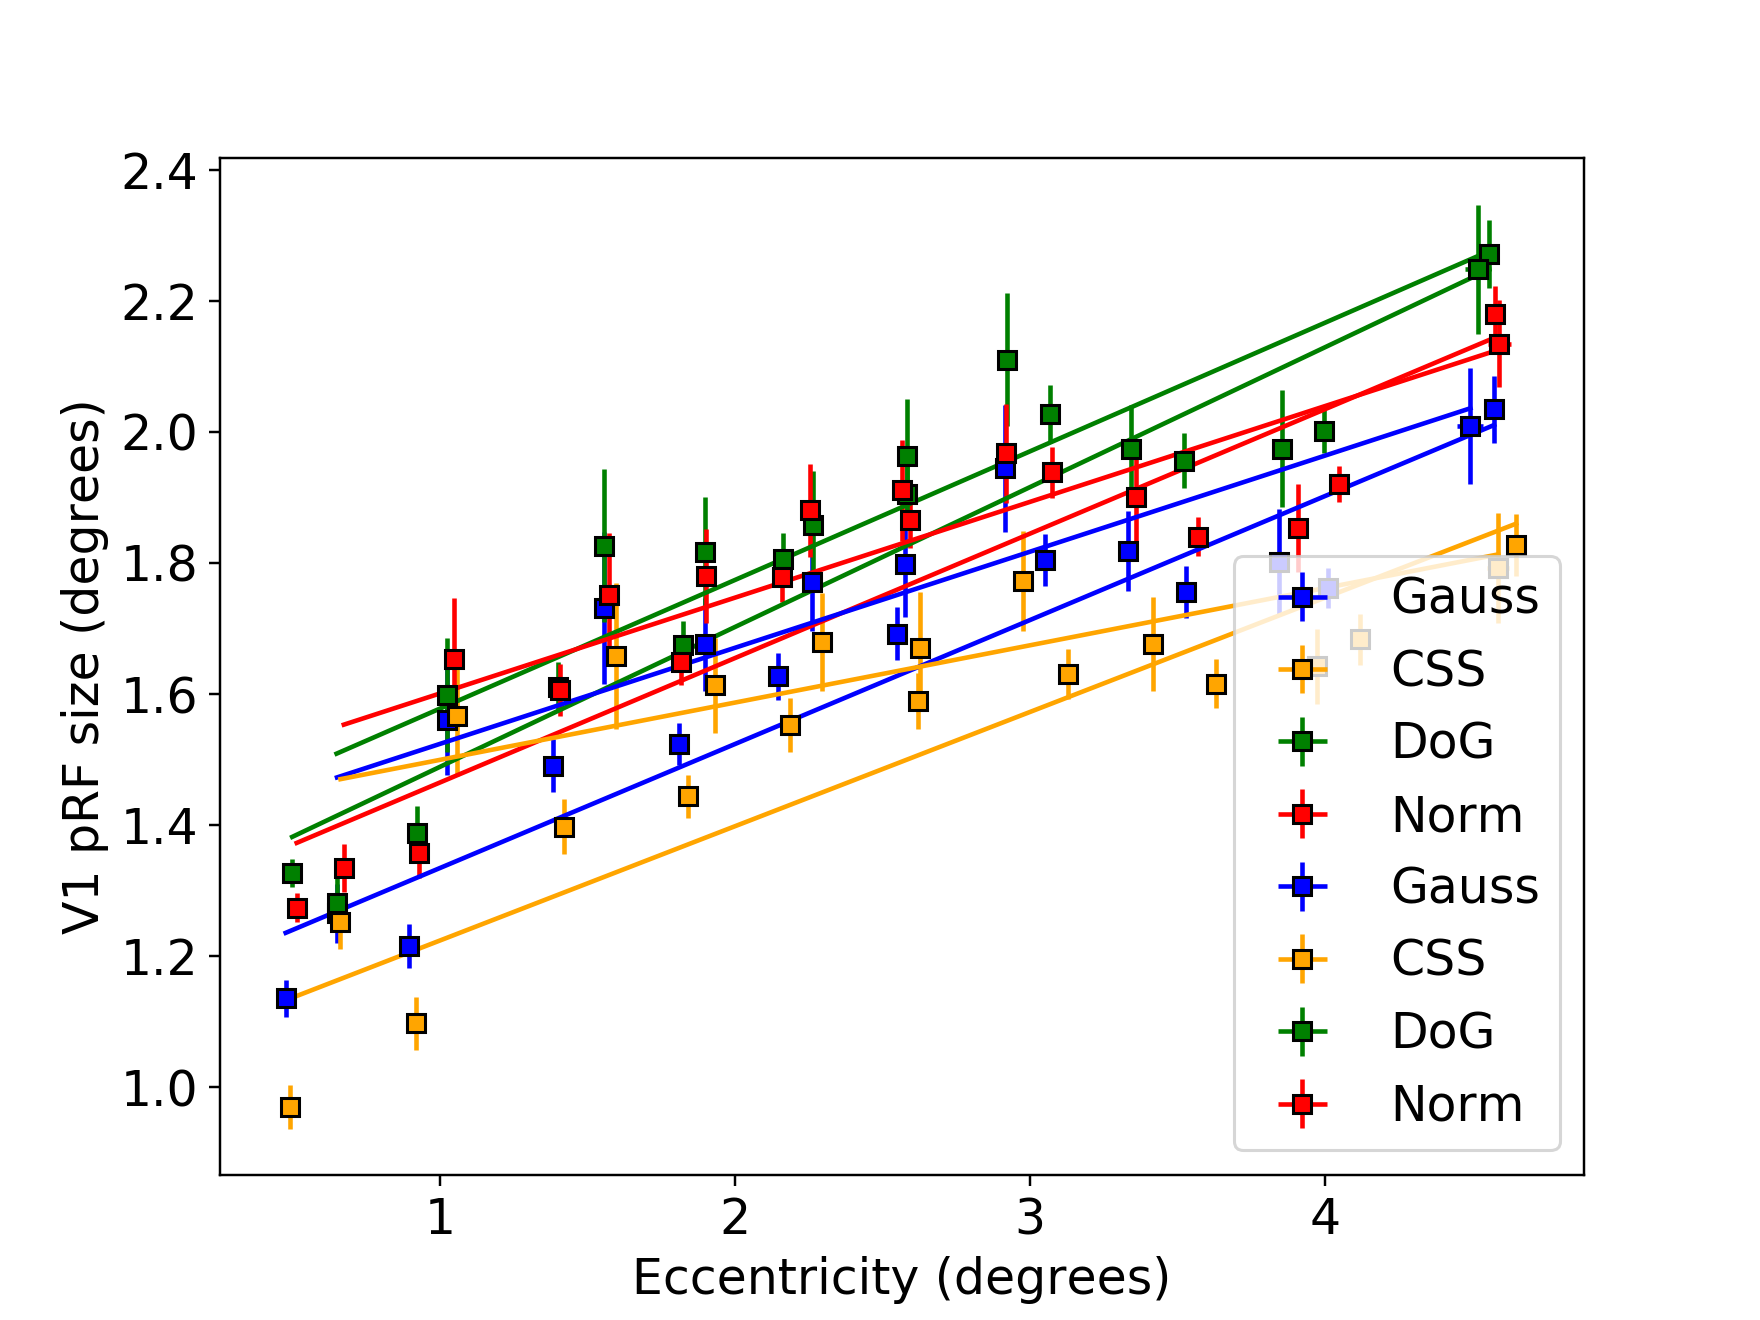

custom.V1 Gauss 0.3190297414475015
custom.V1 CSS 0.2633189376520819
custom.V1 DoG 0.3436913688097998
custom.V1 Norm 0.32317088833964414


<IPython.core.display.Javascript object>


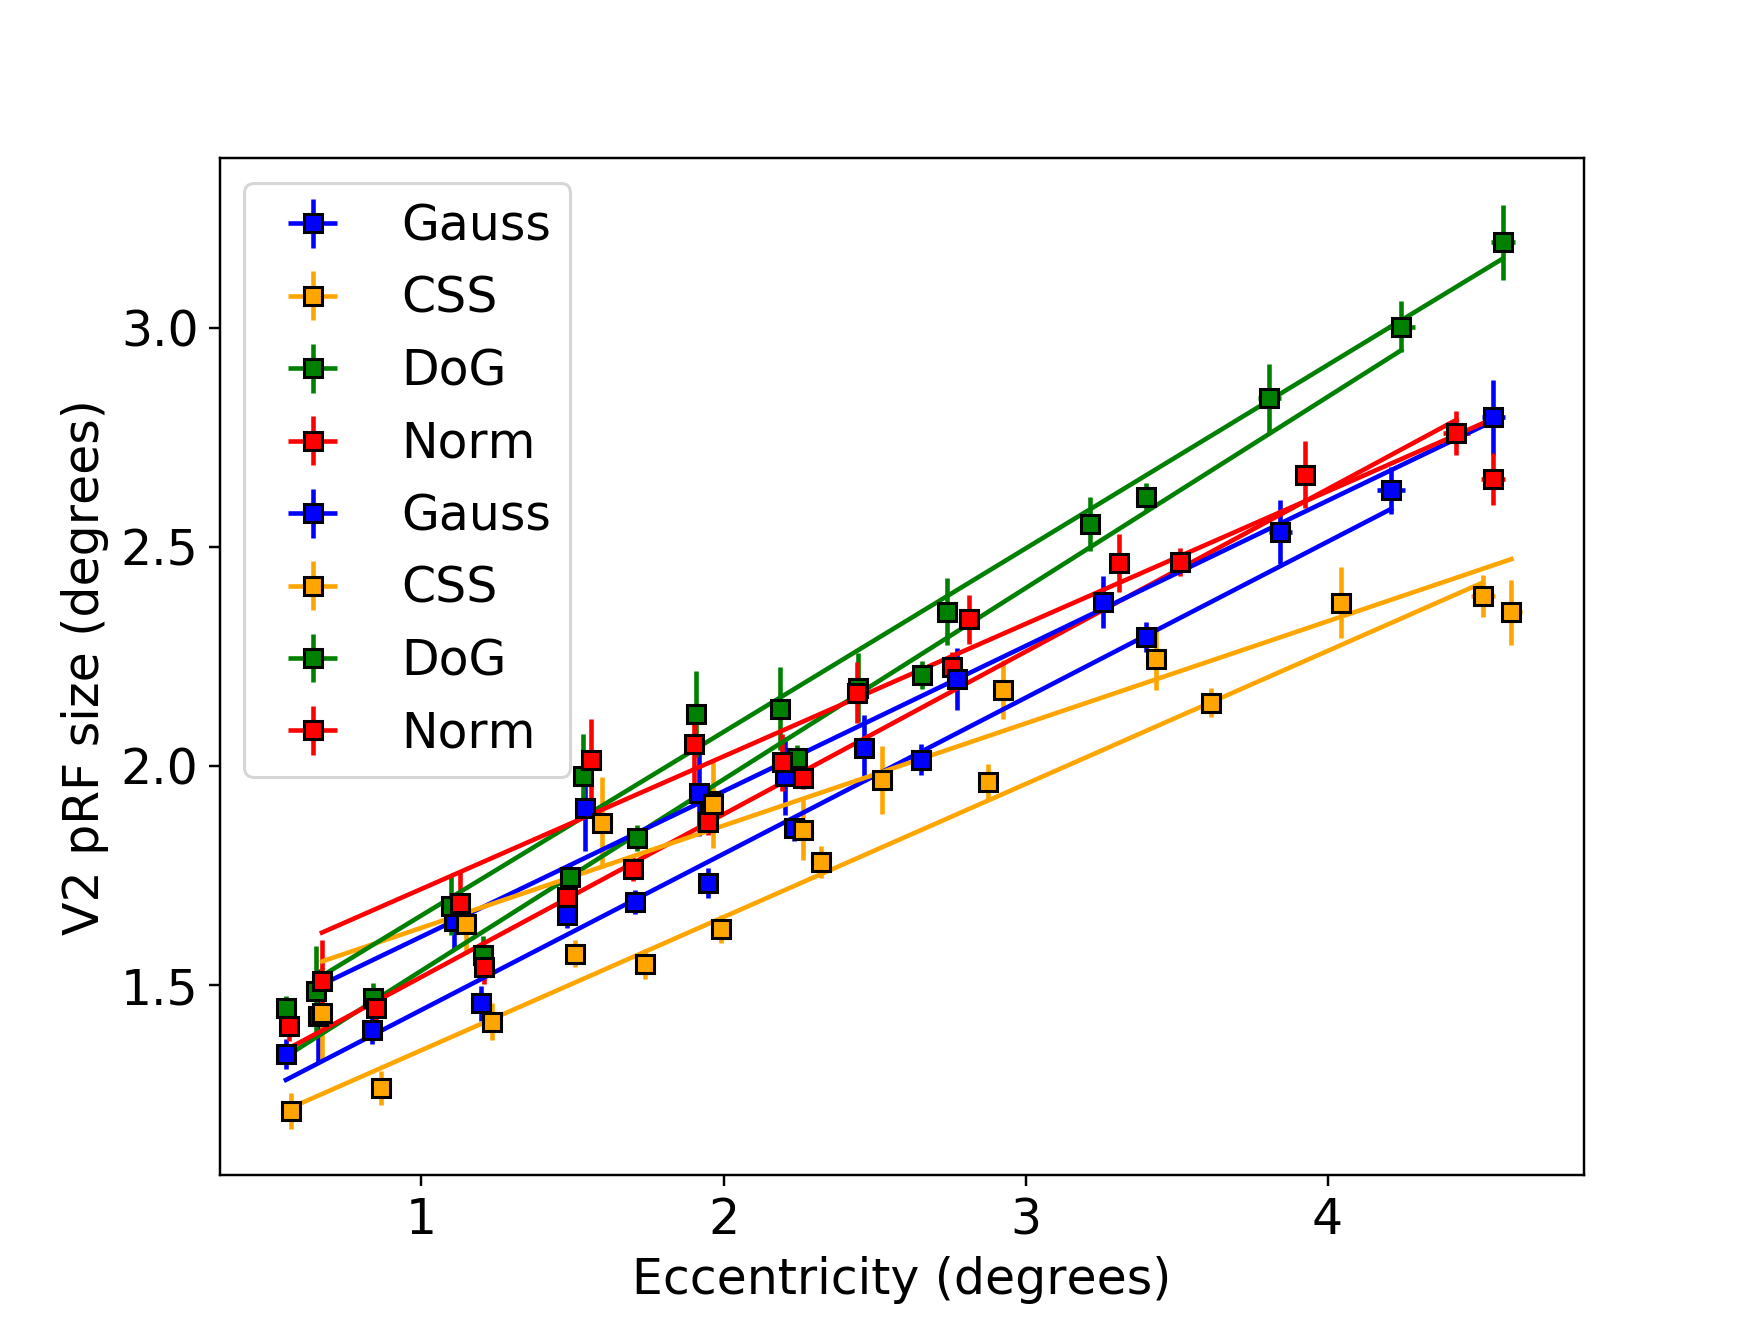

custom.V2 Gauss 0.6596699076402852
custom.V2 CSS 0.5738152592903156
custom.V2 DoG 0.7420283782112803
custom.V2 Norm 0.7164271883027828


<IPython.core.display.Javascript object>


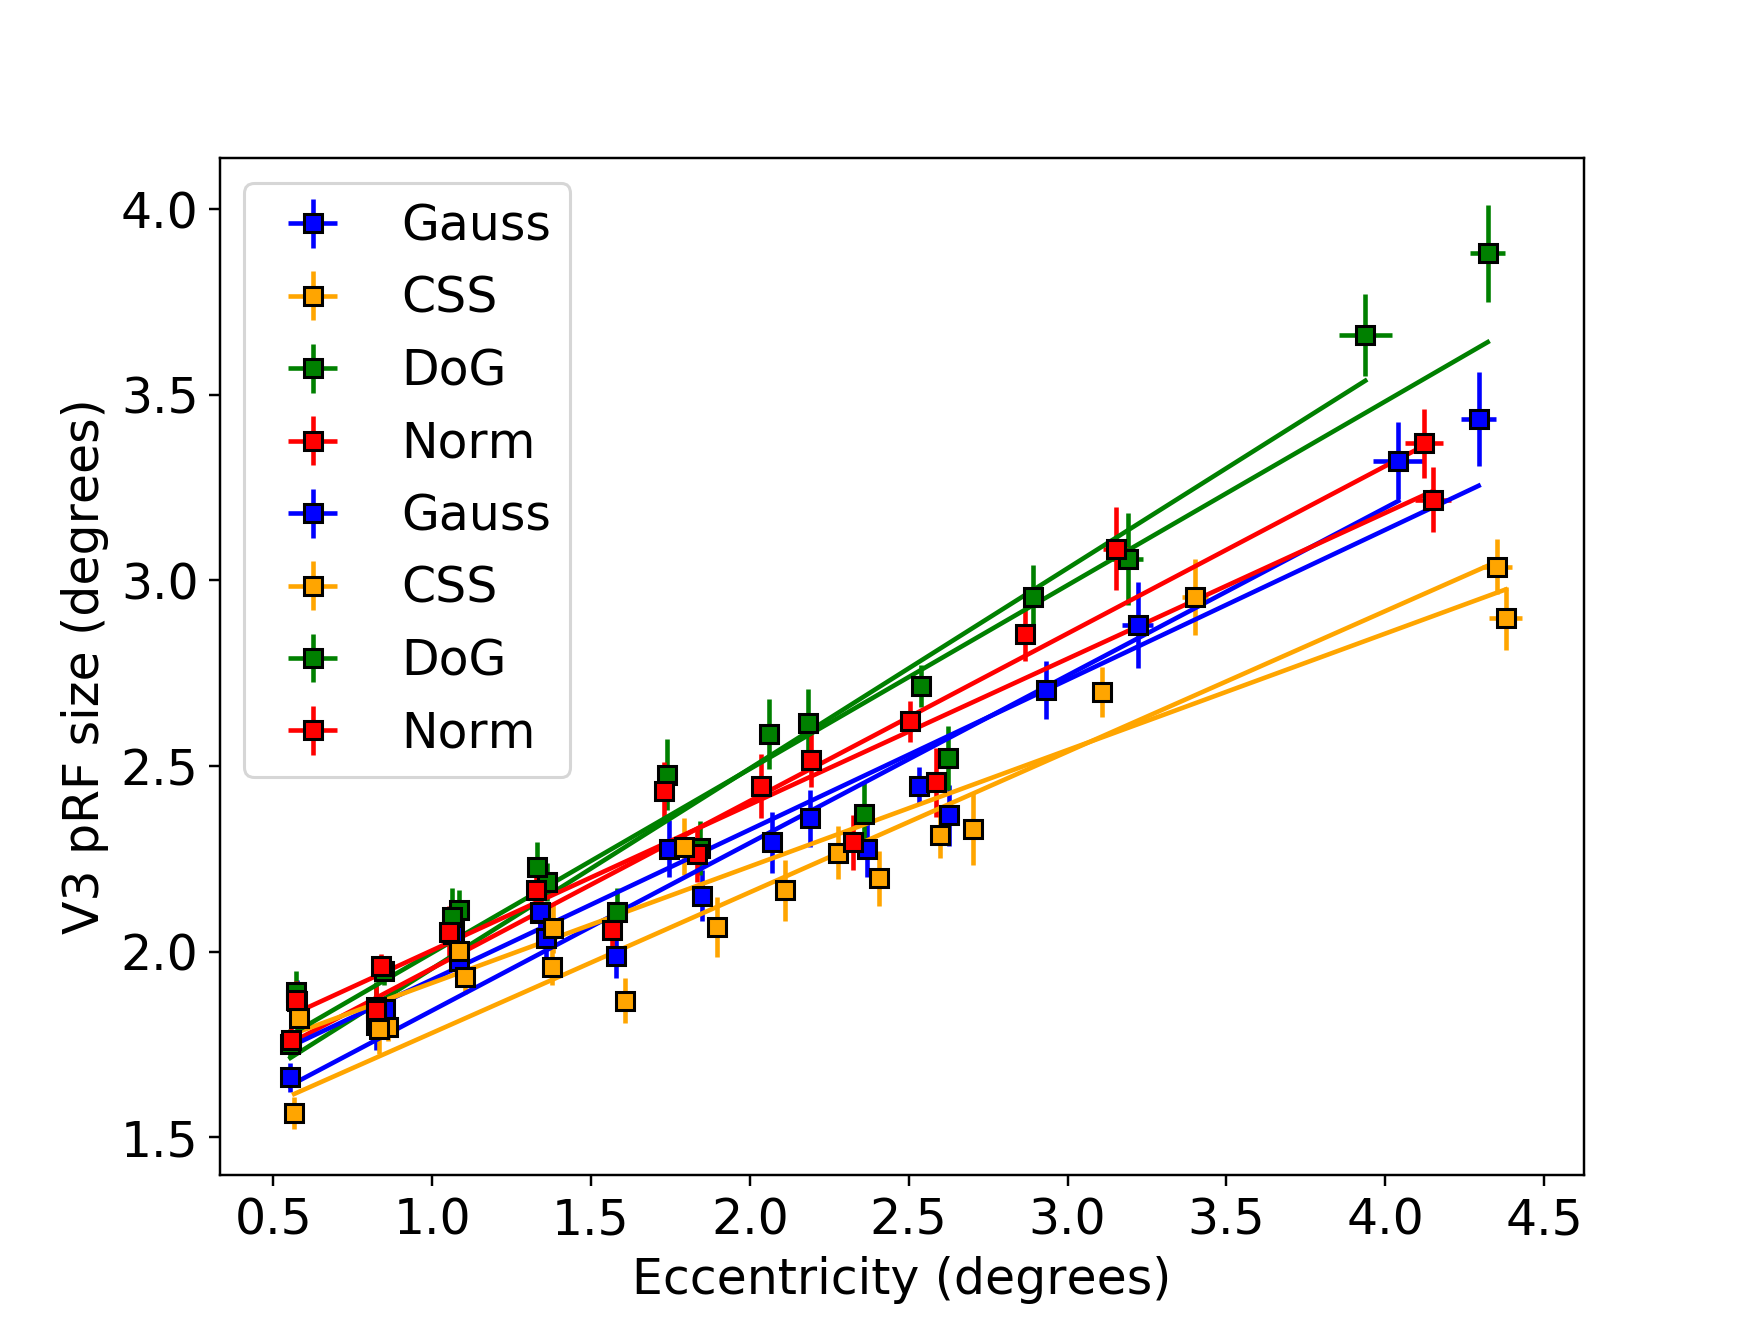

custom.V3 Gauss 0.48123779452277465
custom.V3 CSS 0.4299154592224389
custom.V3 DoG 0.5146634500348468
custom.V3 Norm 0.493247517881351


<IPython.core.display.Javascript object>


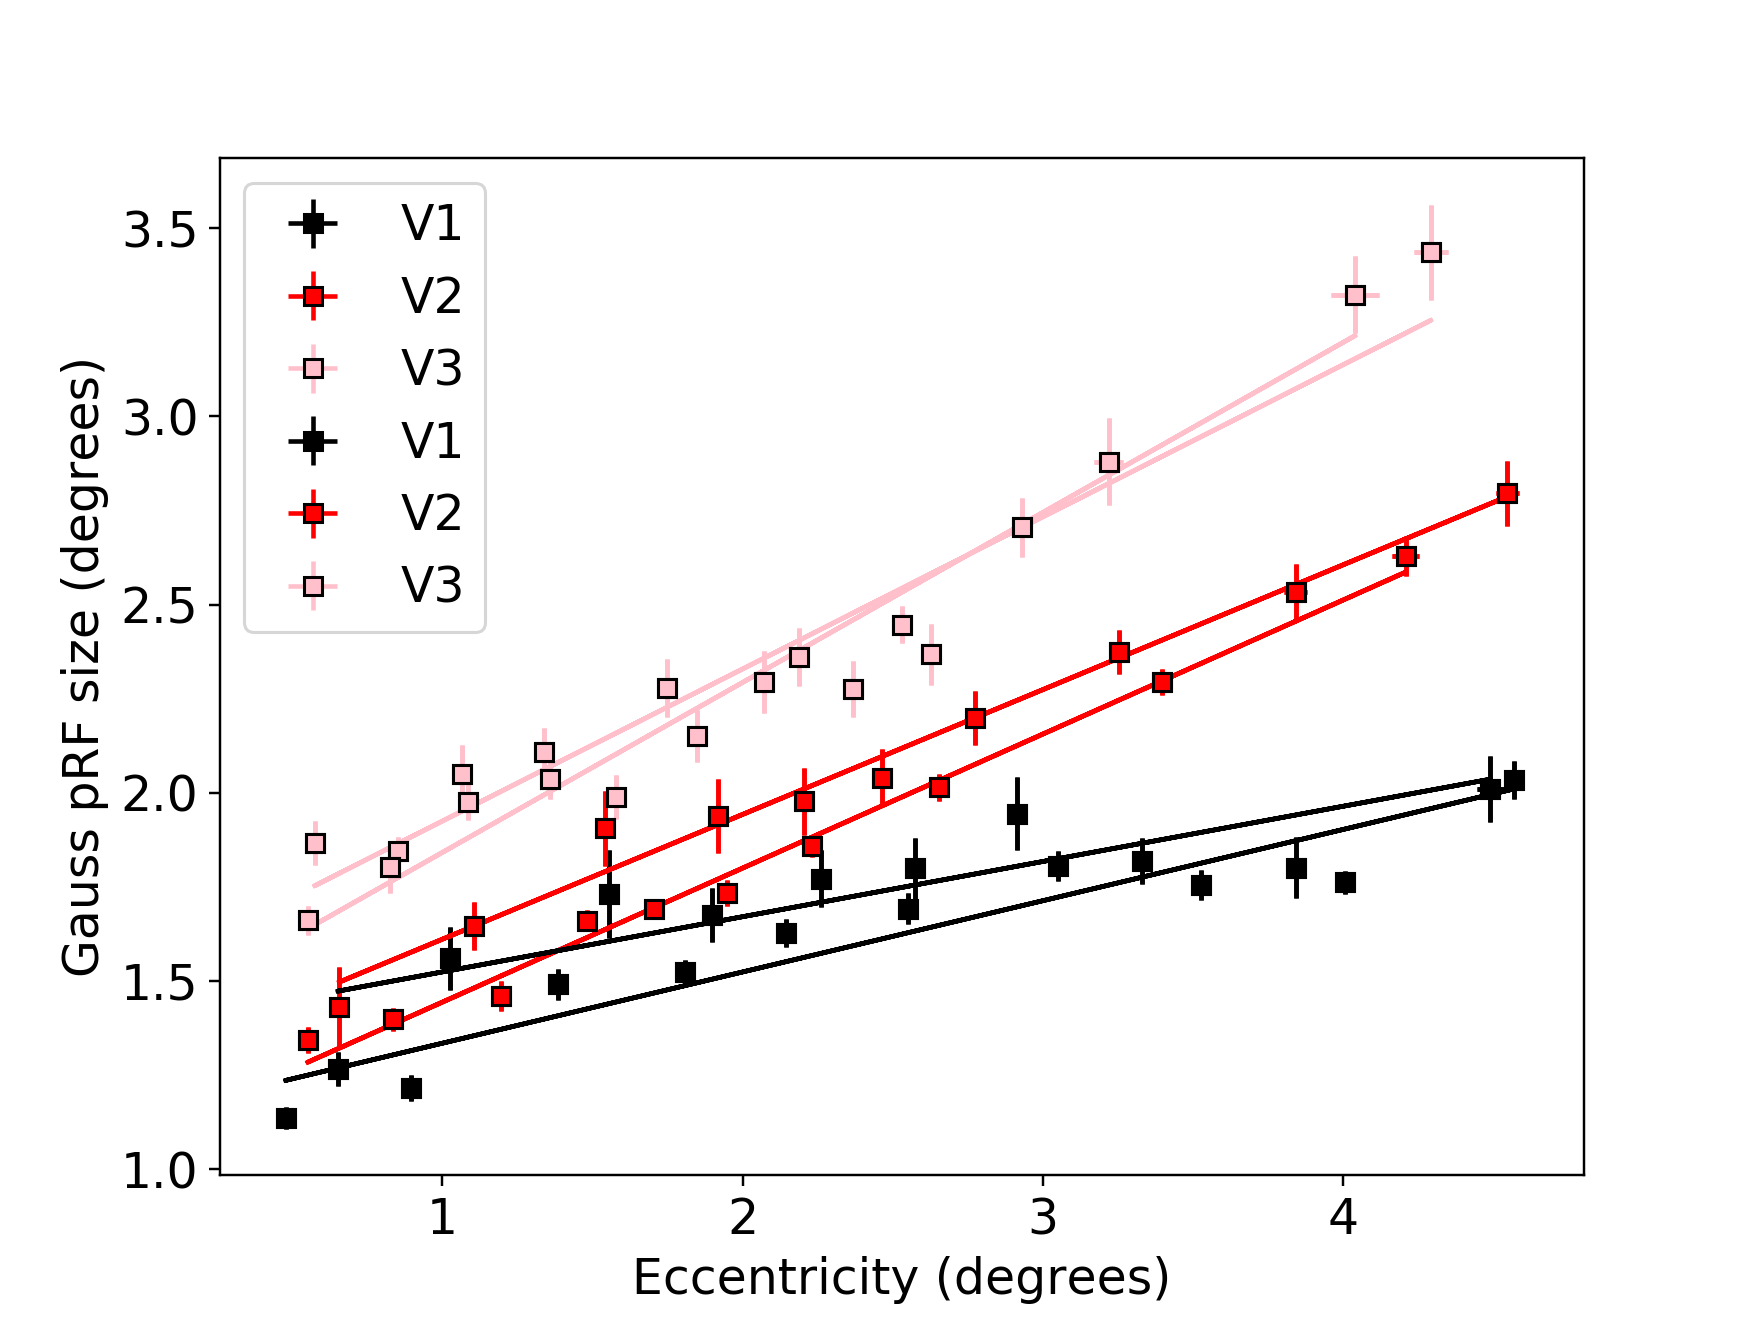

custom.V1 Gauss 0.3190297414475015
custom.V2 Gauss 0.6596699076402852
custom.V3 Gauss 0.48123779452277465


<IPython.core.display.Javascript object>


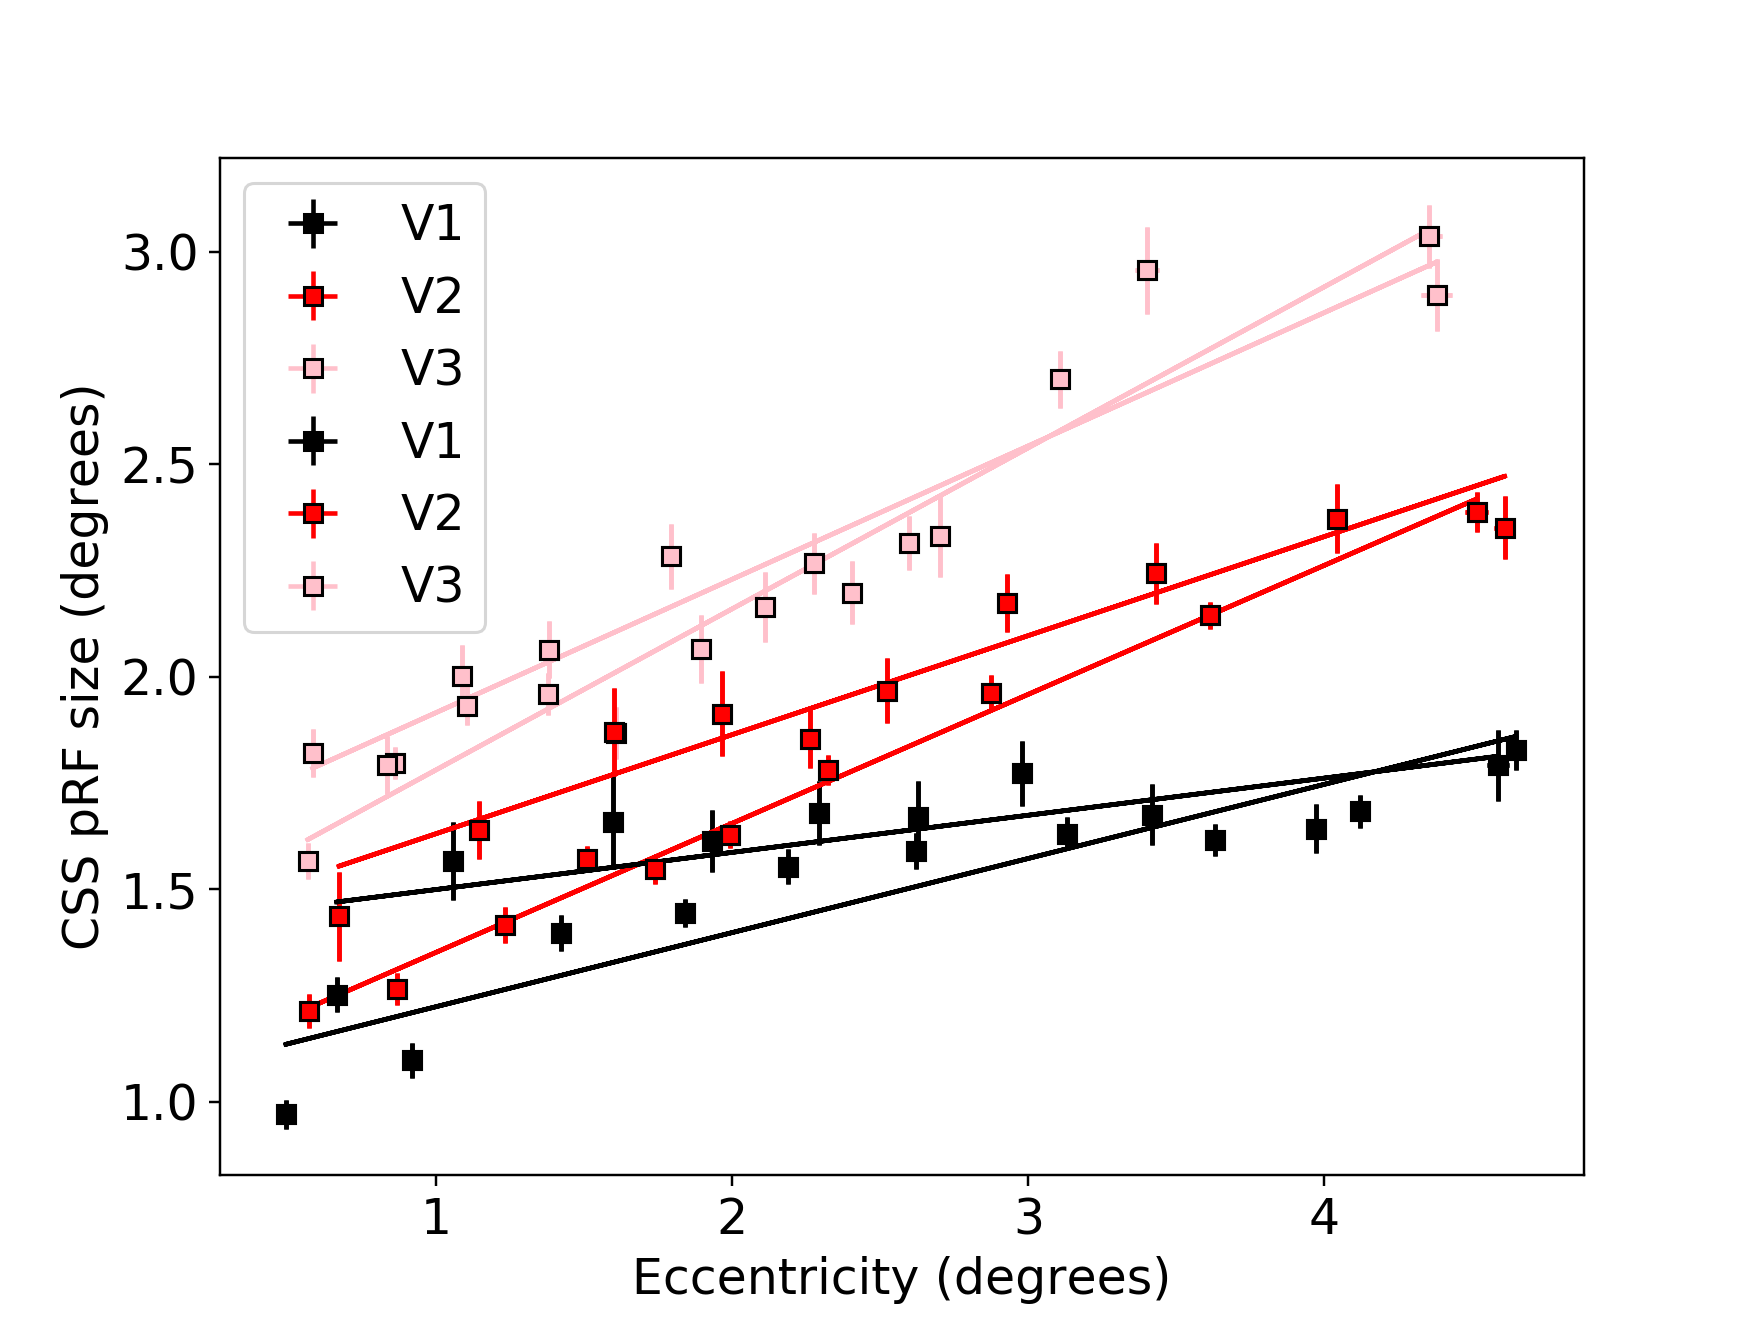

custom.V1 CSS 0.2633189376520819
custom.V2 CSS 0.5738152592903156
custom.V3 CSS 0.4299154592224389


<IPython.core.display.Javascript object>


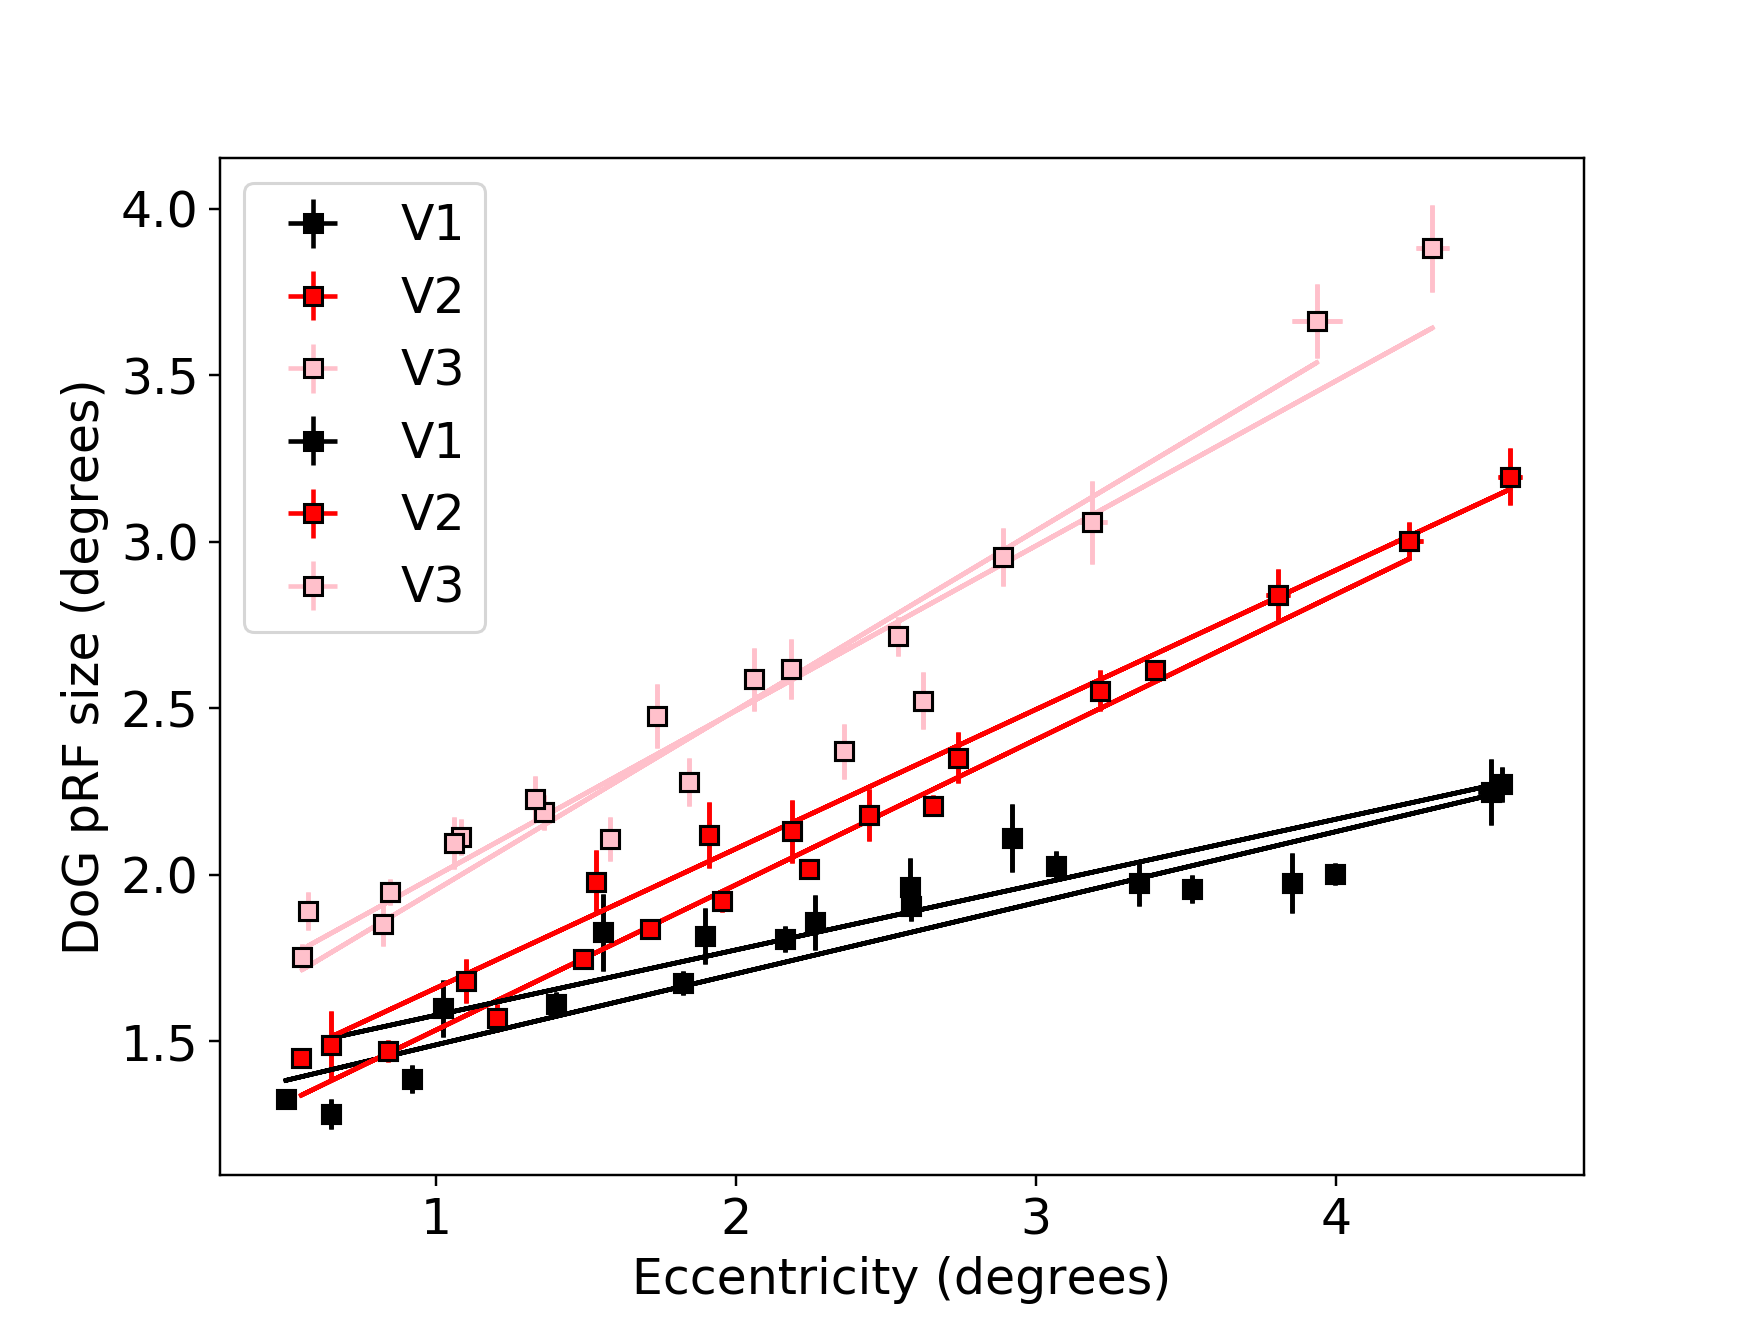

custom.V1 DoG 0.3436913688097998
custom.V2 DoG 0.7420283782112803
custom.V3 DoG 0.5146634500348468


<IPython.core.display.Javascript object>


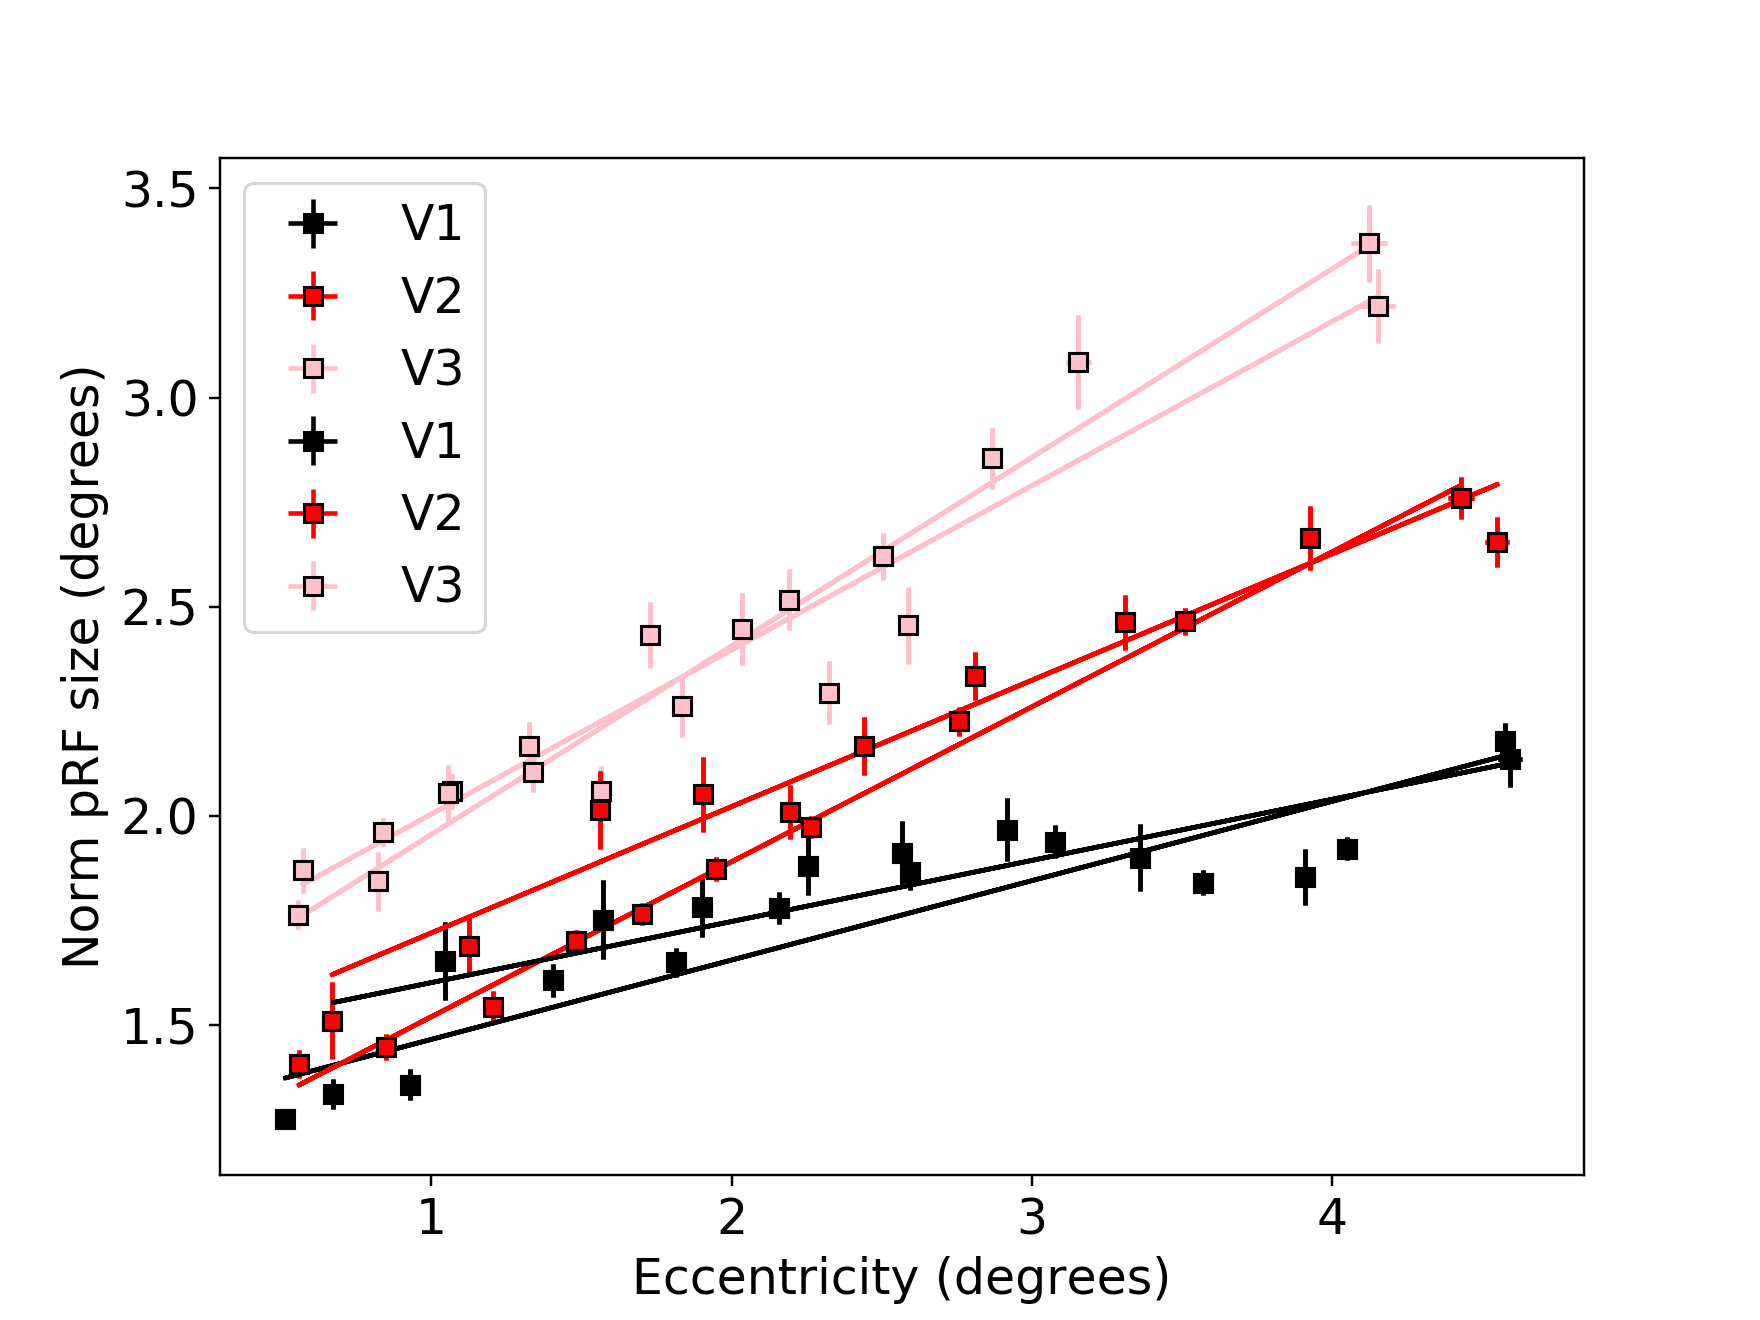

custom.V1 Norm 0.32317088833964414
custom.V2 Norm 0.7164271883027828
custom.V3 Norm 0.493247517881351
fsnative ABD_1S sub-006
custom.V1 Gauss 0.12109224610361191
custom.V1 CSS 0.05121524975111136
custom.V1 DoG 0.1788010206000995
custom.V1 Norm 0.1388712607227357
custom.V2 Gauss 0.376502901555005
custom.V2 CSS 0.2311463997531289
custom.V2 DoG 0.4915199046622222
custom.V2 Norm 0.37367482740189395
custom.V3 Gauss 0.3994991864105765
custom.V3 CSS 0.3177422254154564
custom.V3 DoG 0.46403894358911846
custom.V3 Norm 0.3889681921679992
custom.V1 Gauss 0.12109224610361191
custom.V2 Gauss 0.376502901555005
custom.V3 Gauss 0.3994991864105765
custom.V1 CSS 0.05121524975111136
custom.V2 CSS 0.2311463997531289
custom.V3 CSS 0.3177422254154564
custom.V1 DoG 0.1788010206000995
custom.V2 DoG 0.4915199046622222
custom.V3 DoG 0.46403894358911846
custom.V1 Norm 0.1388712607227357
custom.V2 Norm 0.37367482740189395
custom.V3 Norm 0.3889681921679992


In [47]:
save_figures = False
rsq_thresh = 0.4
rois = ['custom.V1', 'custom.V2', 'custom.V3']
#set to 'all' to plot all analyses
analysis_names = ['ABD_1S']#,
#'ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114_unfiltpred']

vis_res.set_alpha()

vis_res.ecc_size_roi_plots(rois, rsq_thresh, save_figures,
                           analysis_names)


In [ ]:
save_figures = False
rsq_thresh = 0.3
rois = ['custom.V1', 'custom.V2', 'custom.V3']

vis_res.ecc_surround_roi_plots(rois, rsq_thresh, save_figures)

fsnative ABCD_100 sub-006


<IPython.core.display.Javascript object>


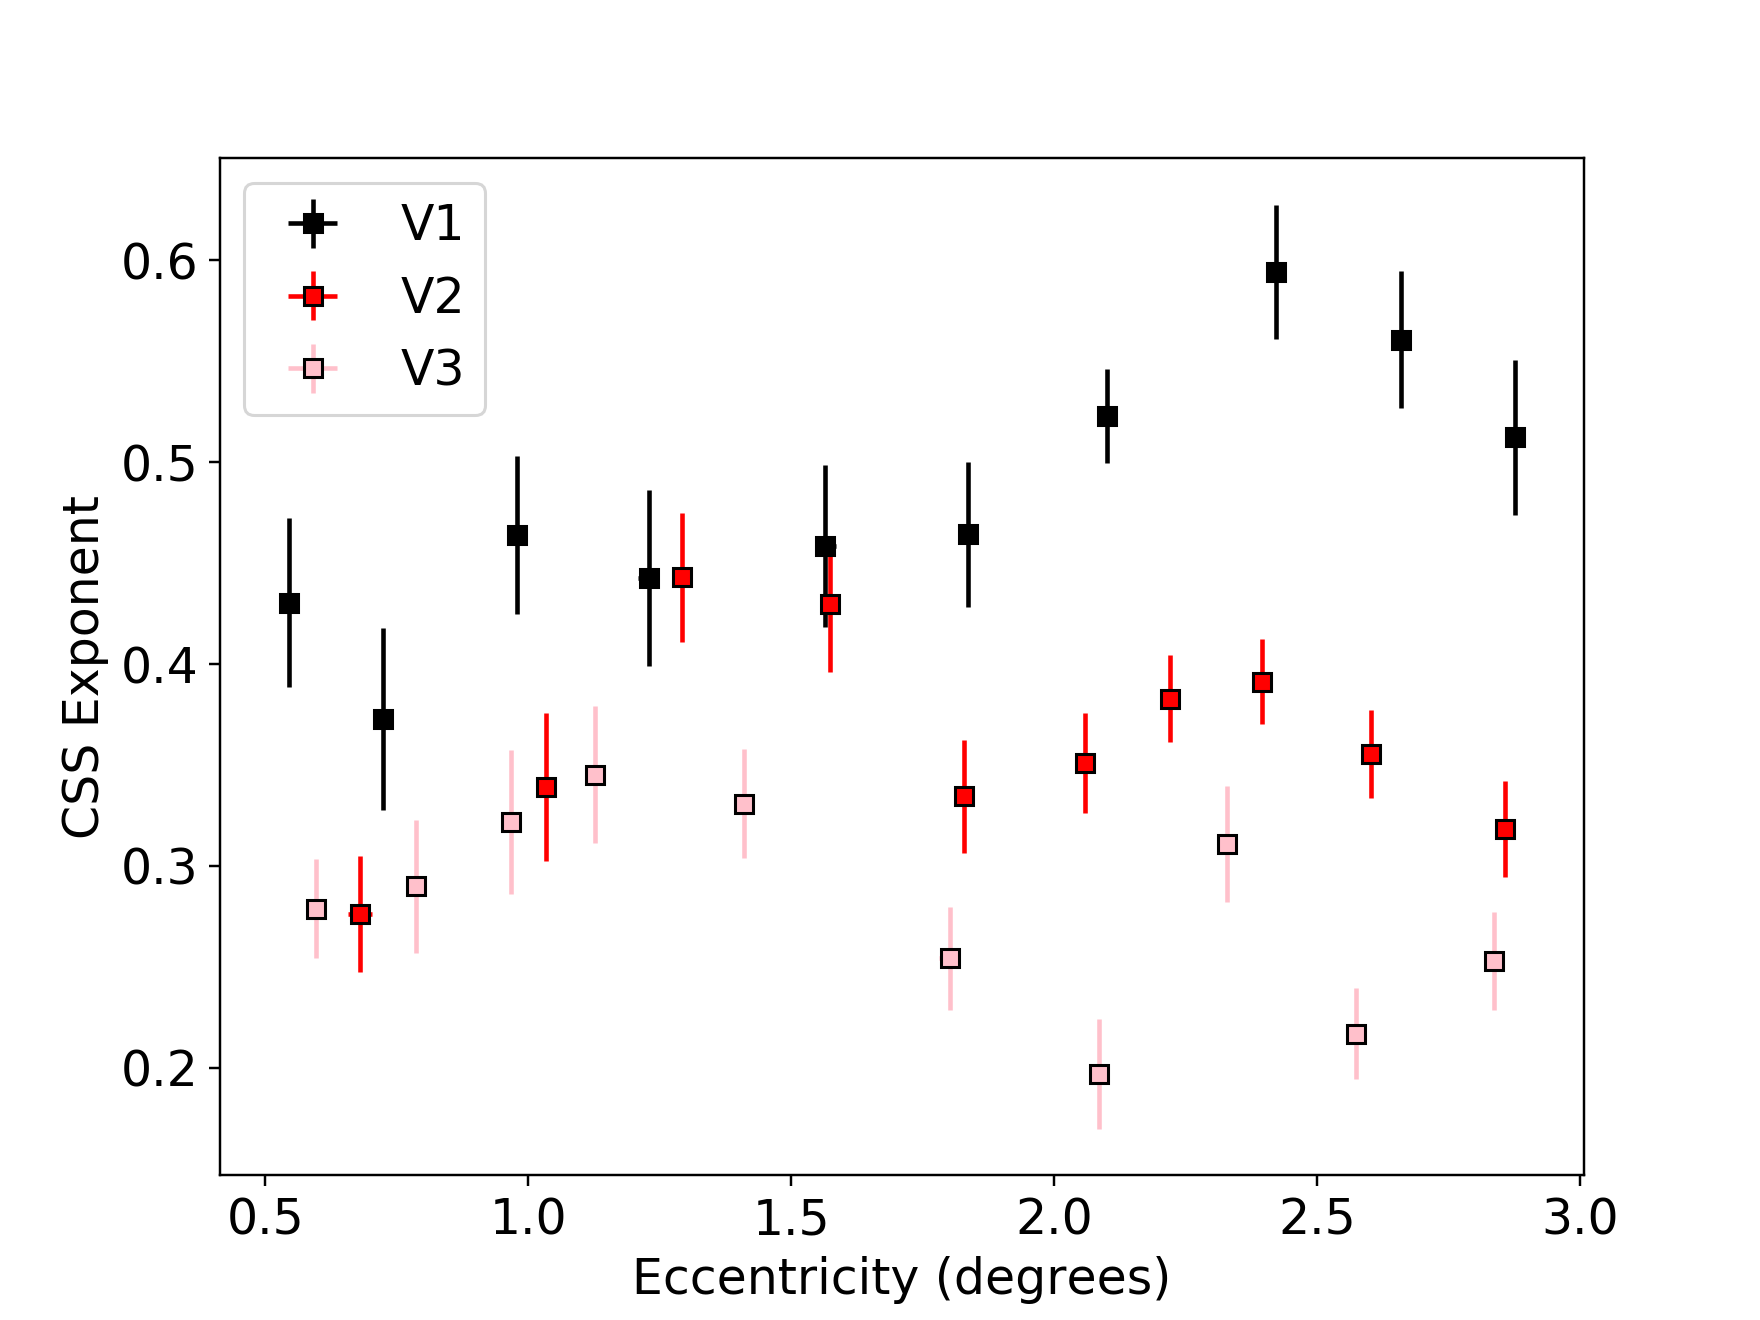

fsnative ABC_100 sub-006
fsnative ACD_100 sub-006


In [153]:
save_figures = False
rsq_thresh = 0.3
rois = ['custom.V1', 'custom.V2', 'custom.V3']

vis_res.ecc_css_exp_roi_plots(rois, rsq_thresh, save_figures)

fsnative ABCD_100 sub-006
fsnative ABC_100 sub-006
fsnative ACD_100 sub-006
fsnative ABCD_100_fixed_bold_baseline_1S sub-006
fsnative ABCD_100_fixed_bold_baseline_1S_poly1 sub-006
fsnative ABCD_100_fixed_bold_baseline_1S_poly1_interbar sub-006
fsnative ABCD_100_fixed_bold_baseline_1S_dcfilter_interbar sub-006
fsnative ABCD_100_1S_dcfilter_interbar sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_nohrf sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass38 sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass72 sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114 sub-006
fsnative ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf

<IPython.core.display.Javascript object>


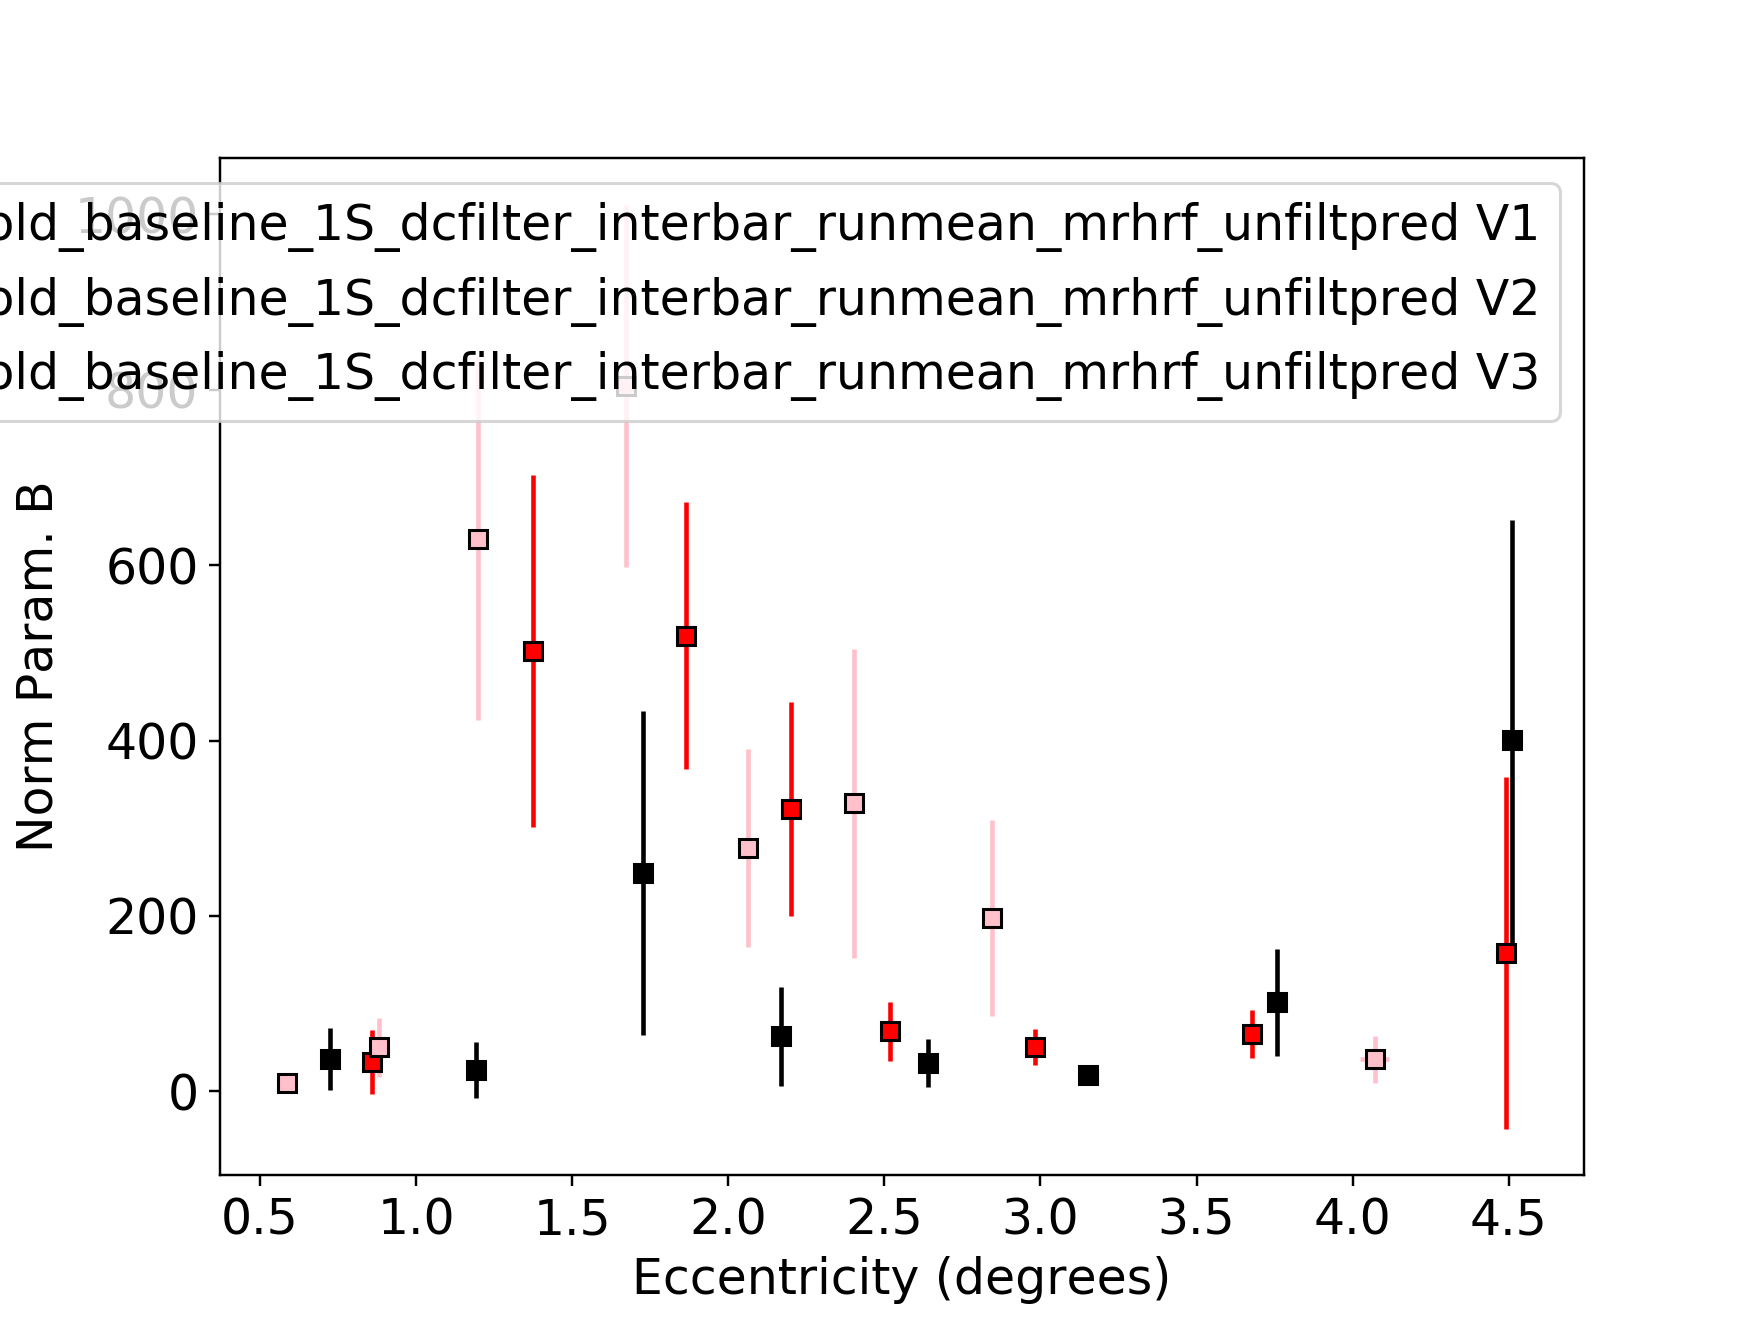

<IPython.core.display.Javascript object>


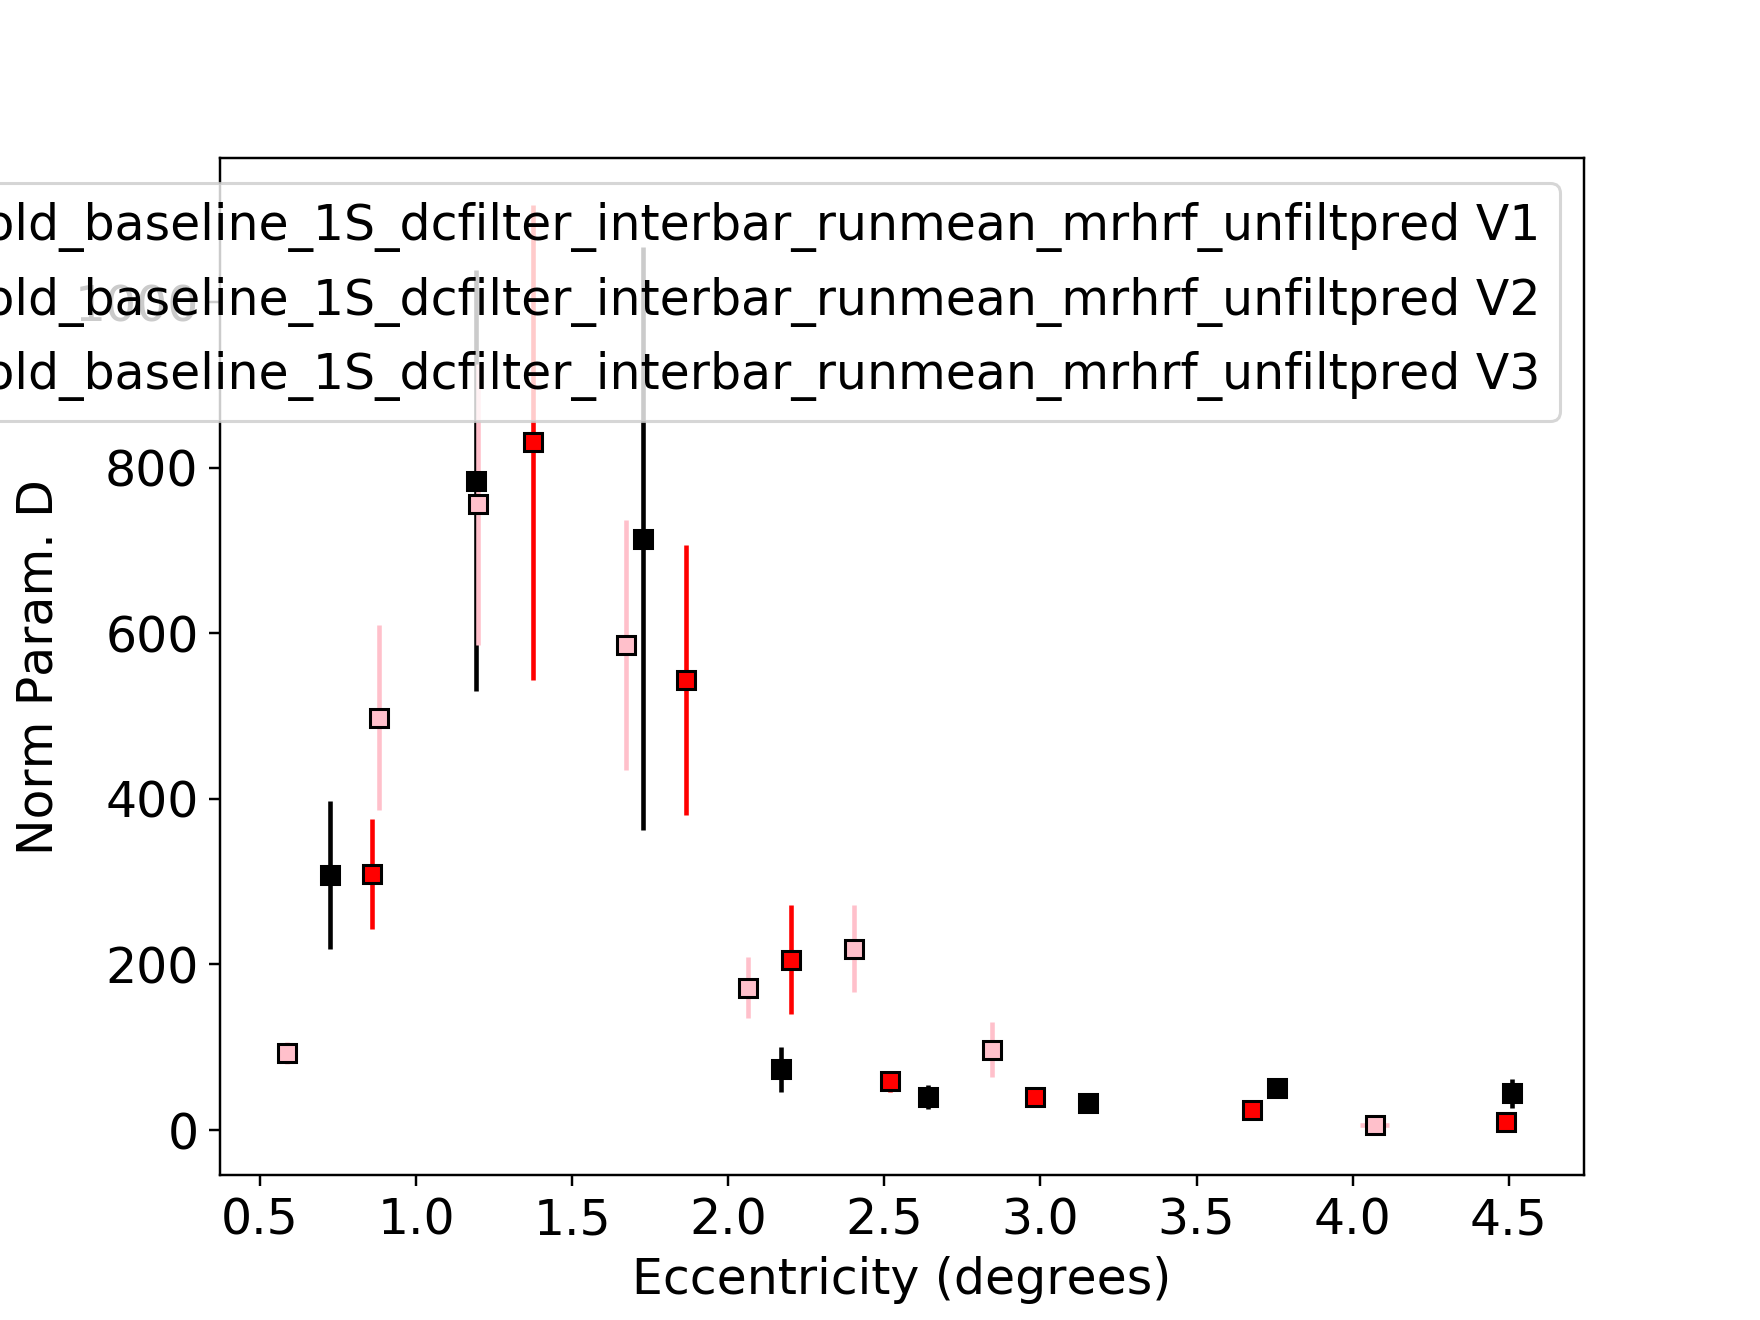

<IPython.core.display.Javascript object>


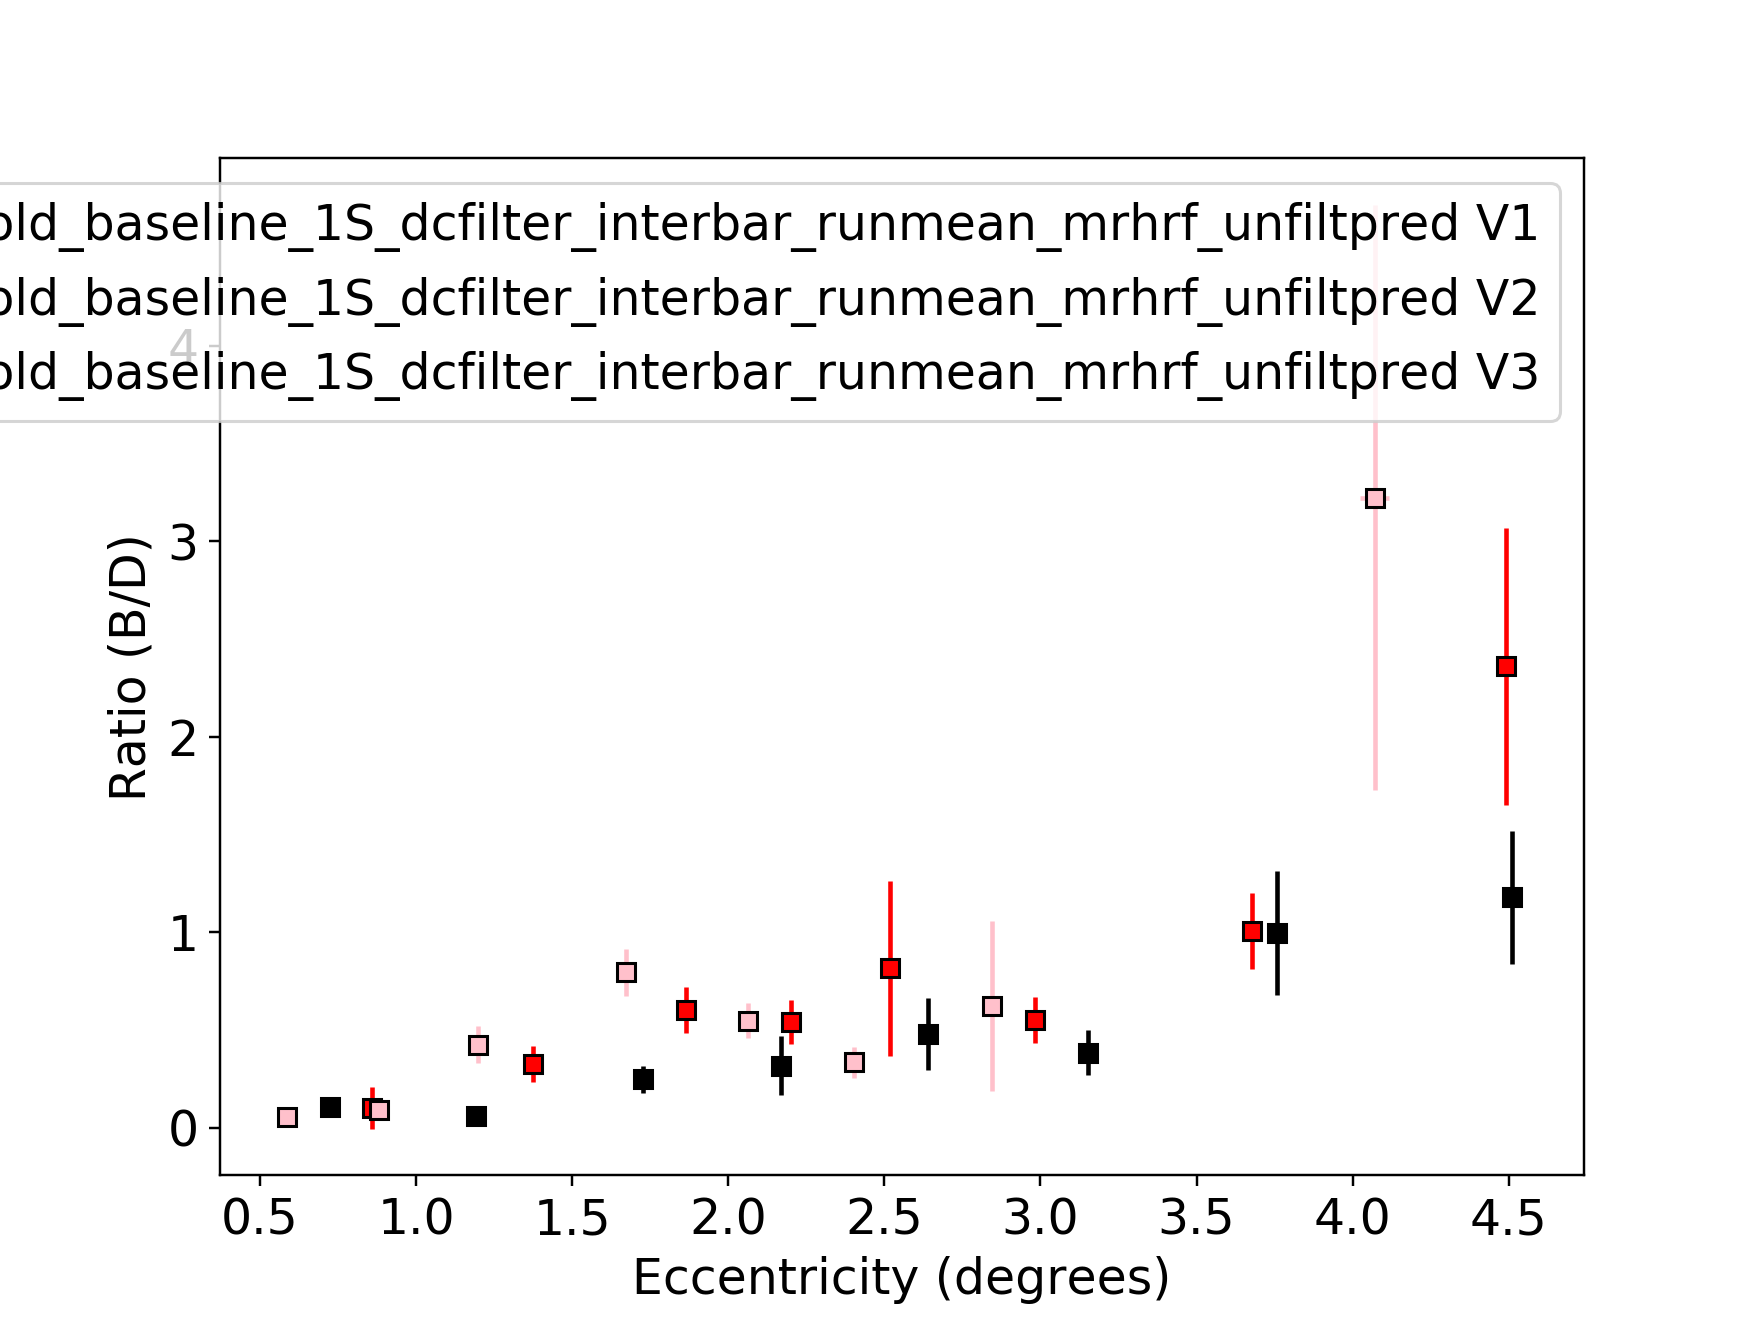

In [493]:
vis_res.pycortex_plots()
save_figures = False
rsq_thresh = 0.4
analysis_names=['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_unfiltpred']
rois = ['custom.V1', 'custom.V2', 'custom.V3']
vis_res.set_alpha()
vis_res.ecc_norm_baselines_roi_plots(rois, rsq_thresh, save_figures, analysis_names=analysis_names)

fsnative ABD_1S sub-007
fsnative ABD_1S sub-006
fsnative ROI_drawing sub-006
fsnative ROI_drawing sub-007
fsnative ABD_1S sub-007


<IPython.core.display.Javascript object>


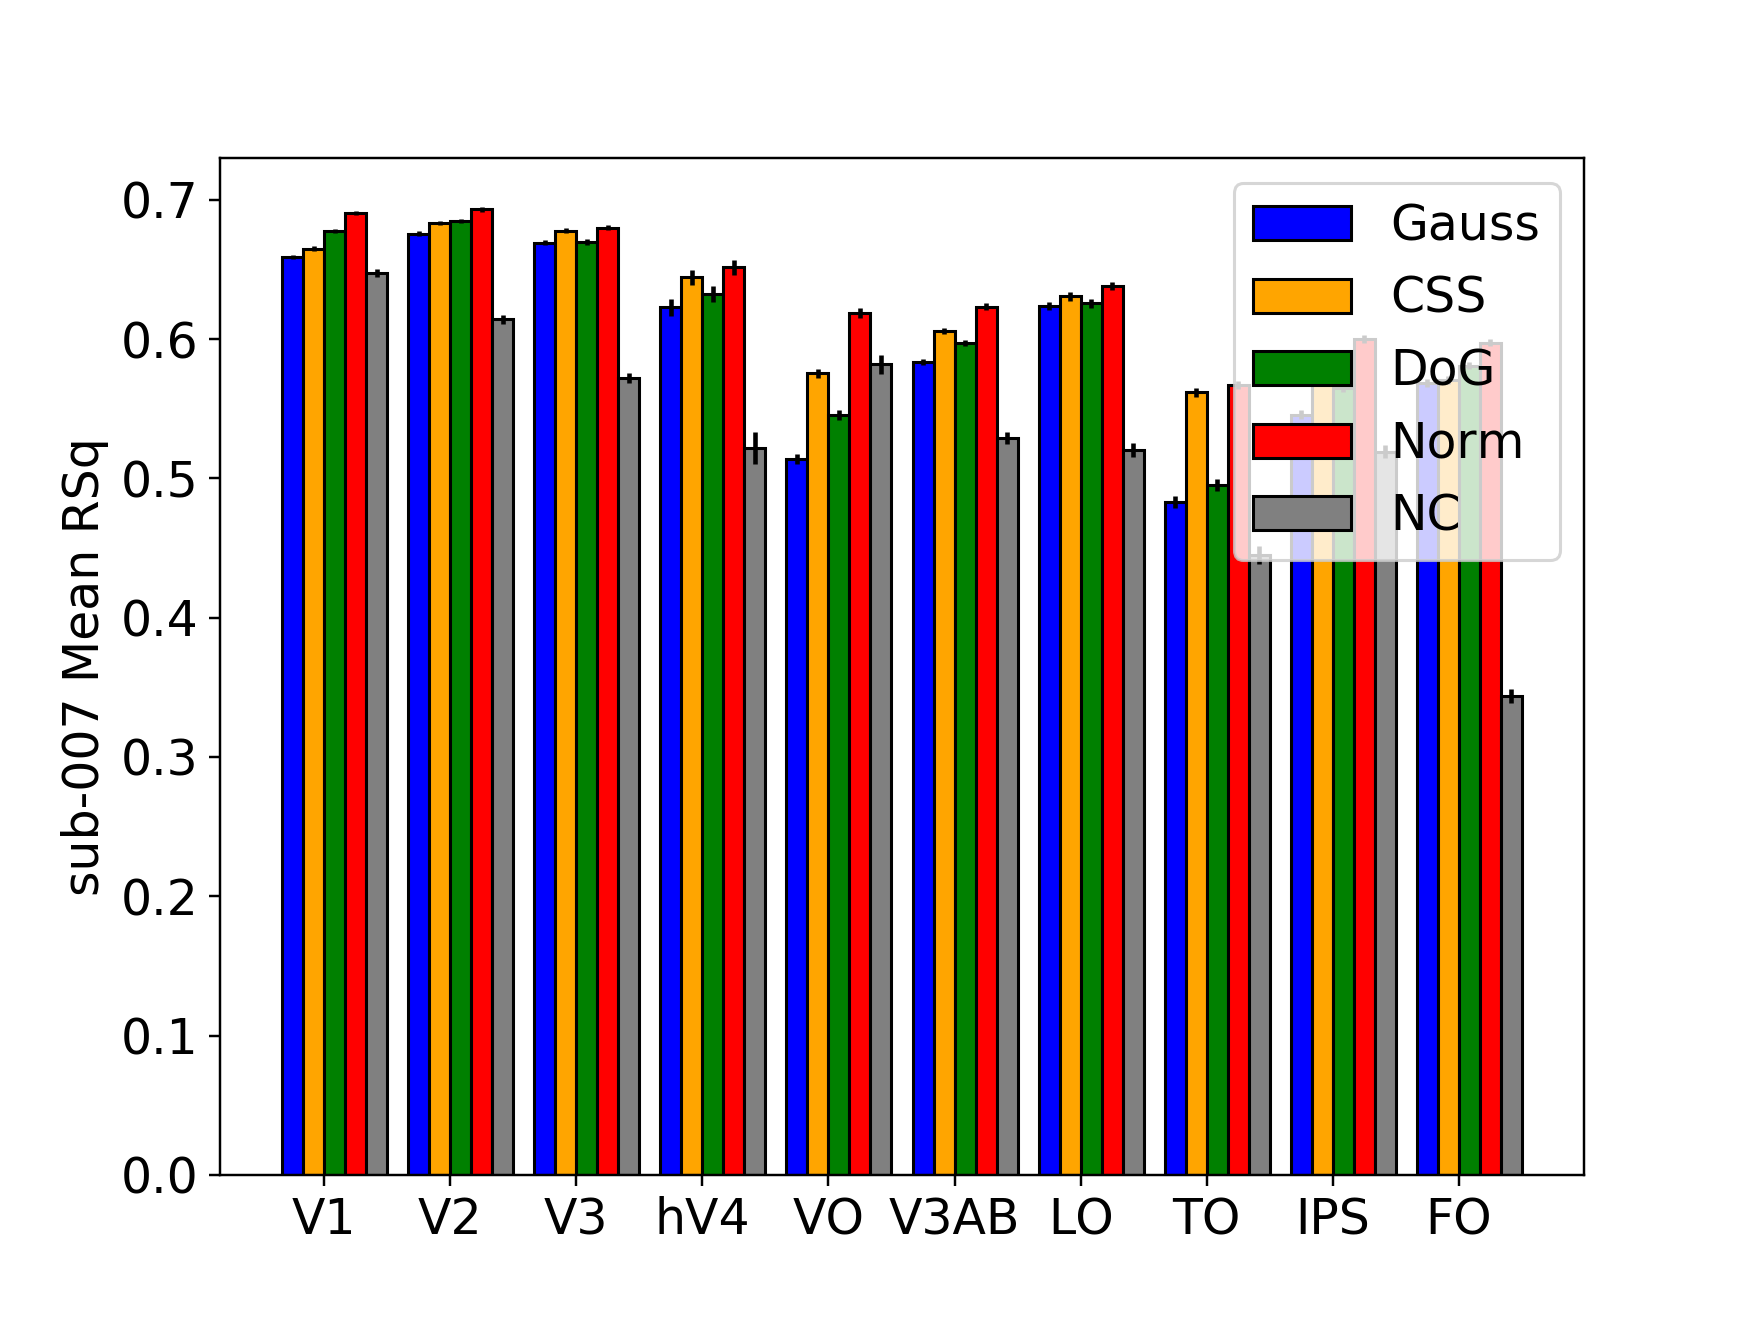

ABD_1S custom.V1
custom.V1 voxels above 0.5 threshold within stimulus eccentricity: 4284 out of 6251
Norm-CSS in custom.V1 surround voxels: Ks_2sampResult(statistic=0.15849182515849183, pvalue=2.9717880210946665e-33)
Norm-DoG in custom.V1 nonlinear voxels: Ks_2sampResult(statistic=0.06413502109704641, pvalue=8.850531706687674e-07)
Norm-CSS in custom.V1 surround voxels: Ttest_1sampResult(statistic=64.47515158728517, pvalue=0.0)
Norm-DoG in custom.V1 nonlinear voxels: Ttest_1sampResult(statistic=48.90909165460666, pvalue=0.0)
Norm-CSS in custom.V1 surround voxels: WilcoxonResult(statistic=87069.0, pvalue=0.0)
Norm-DoG in custom.V1 nonlinear voxels: WilcoxonResult(statistic=415701.0, pvalue=0.0)
Norm-CSS in custom.V1 surround voxels: 0.03731639680321602
Norm-DoG in custom.V1 nonlinear voxels: 0.014447807886848307
---------------
ABD_1S custom.V2
custom.V2 voxels above 0.5 threshold within stimulus eccentricity: 3319 out of 4896
Norm-CSS in custom.V2 surround voxels: Ks_2sampResult(statist

<IPython.core.display.Javascript object>


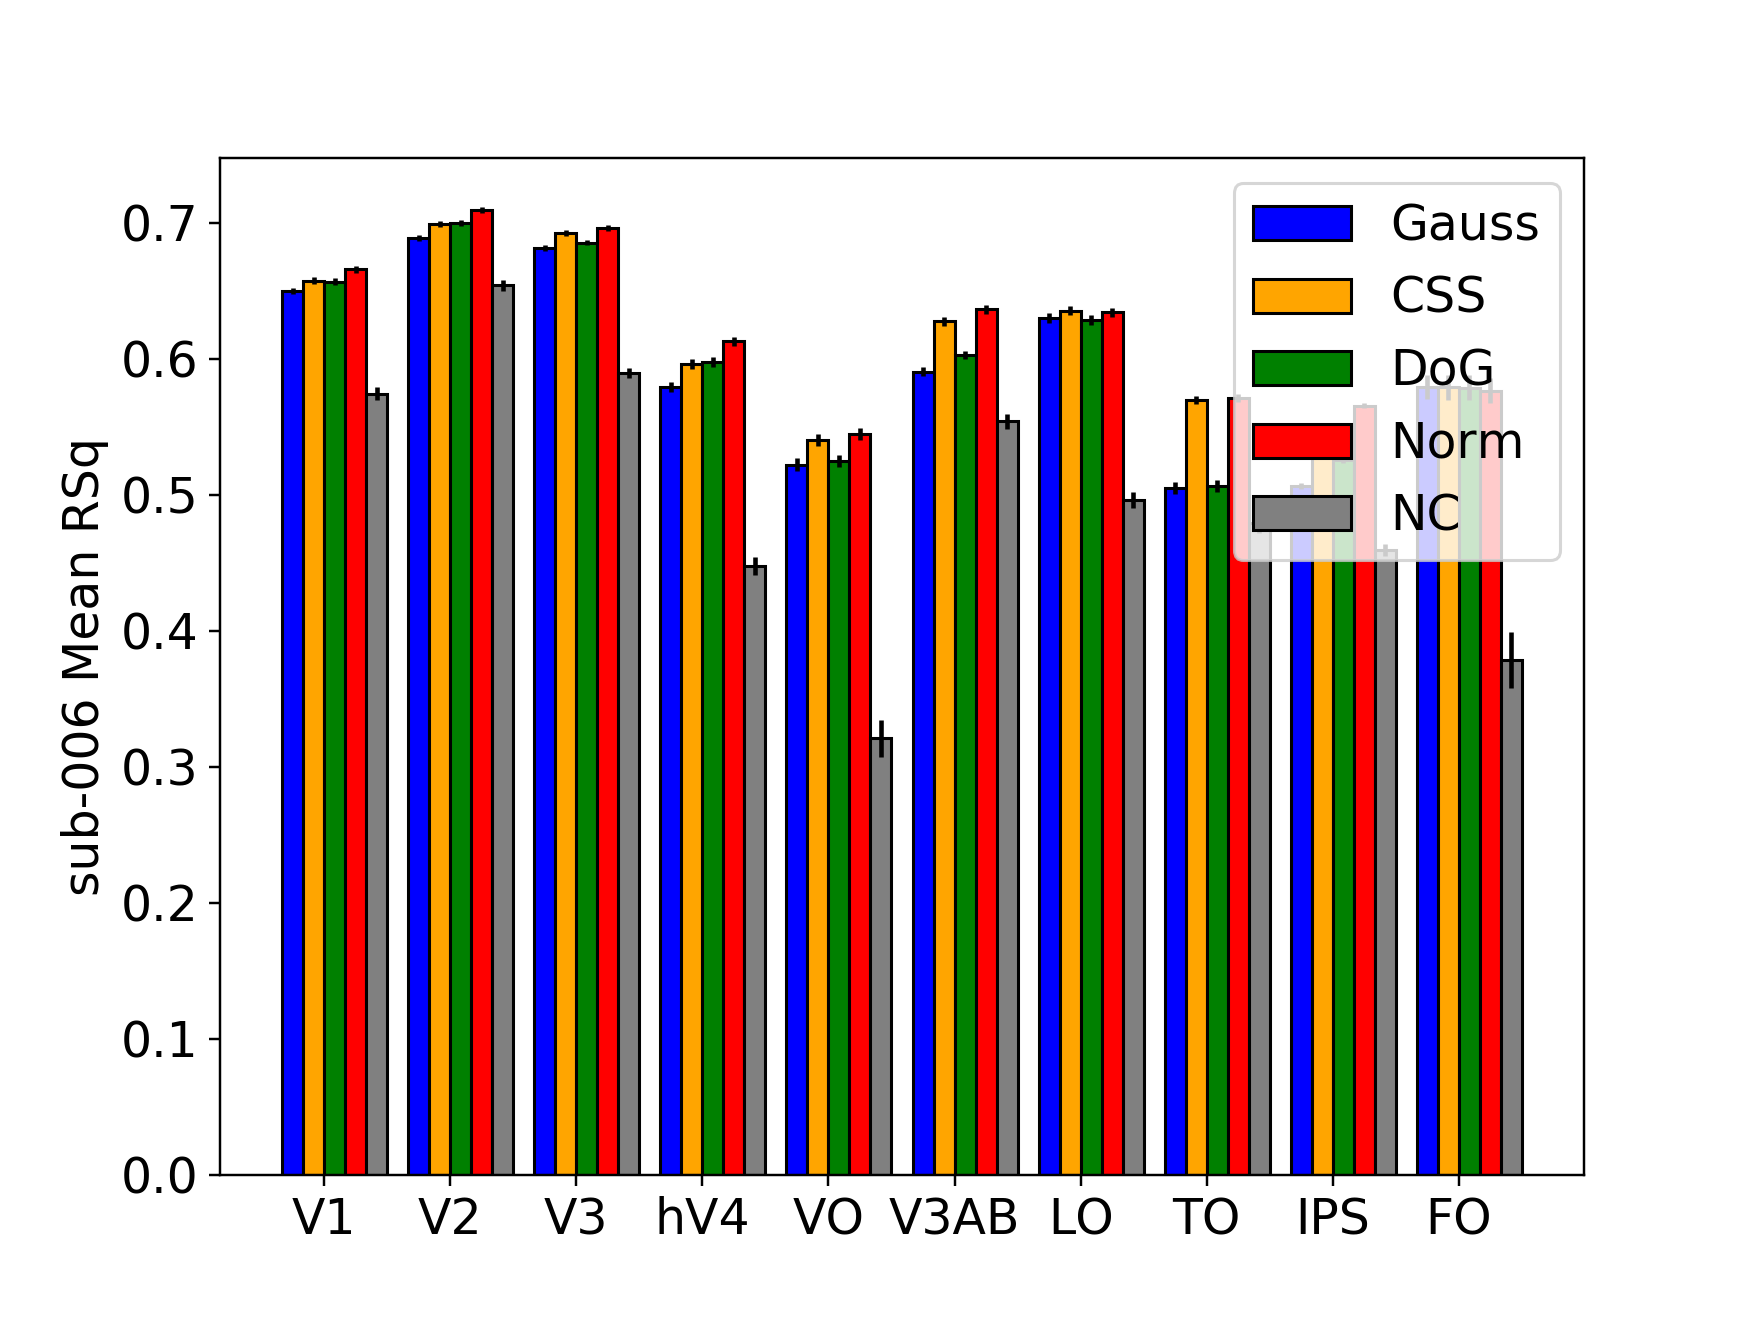

ABD_1S custom.V1
custom.V1 voxels above 0.5 threshold within stimulus eccentricity: 1549 out of 2544
Norm-CSS in custom.V1 surround voxels: Ks_2sampResult(statistic=0.09090909090909091, pvalue=0.0016558949645945746)
Norm-DoG in custom.V1 nonlinear voxels: Ks_2sampResult(statistic=0.058823529411764705, pvalue=0.02424767841325513)
Norm-CSS in custom.V1 surround voxels: Ttest_1sampResult(statistic=17.35768672450706, pvalue=4.602499242588754e-58)
Norm-DoG in custom.V1 nonlinear voxels: Ttest_1sampResult(statistic=28.9188215660902, pvalue=8.622754663731459e-142)
Norm-CSS in custom.V1 surround voxels: WilcoxonResult(statistic=48479.0, pvalue=5.099563961868231e-78)
Norm-DoG in custom.V1 nonlinear voxels: WilcoxonResult(statistic=73410.0, pvalue=9.722678017594445e-142)
Norm-CSS in custom.V1 surround voxels: 0.018699592174632
Norm-DoG in custom.V1 nonlinear voxels: 0.011177471932716596
---------------
ABD_1S custom.V2
custom.V2 voxels above 0.5 threshold within stimulus eccentricity: 1815 out o

ABD_1S custom.FO
custom.FO voxels above 0.5 threshold within stimulus eccentricity: 38 out of 1604
Norm-CSS in custom.FO surround voxels: Ks_2sampResult(statistic=0.16666666666666666, pvalue=0.9715397823325015)
Norm-DoG in custom.FO nonlinear voxels: Ks_2sampResult(statistic=0.05555555555555555, pvalue=1.0)
Norm-CSS in custom.FO surround voxels: Ttest_1sampResult(statistic=-2.754701012630676, pvalue=0.01353394445714365)
Norm-DoG in custom.FO nonlinear voxels: Ttest_1sampResult(statistic=-0.6022390030526766, pvalue=0.5549635136428268)
Norm-CSS in custom.FO surround voxels: WilcoxonResult(statistic=9.0, pvalue=0.0008634758631167839)
Norm-DoG in custom.FO nonlinear voxels: WilcoxonResult(statistic=83.0, pvalue=0.9133009306692093)
Norm-CSS in custom.FO surround voxels: -0.0020277914335161684
Norm-DoG in custom.FO nonlinear voxels: -0.0005181770889526008
---------------




In [20]:
#this is to always set the alpha correctly

vis_res.set_alpha()

save_figures = False
rsq_thresh = 0.5
analysis_names=['ABD_1S']
rois = ['custom.V1', 'custom.V2', 'custom.V3' ,'custom.hV4','custom.VO',
                      'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']

vis_res.rsq_roi_plots(rois, rsq_thresh, save_figures, analysis_names=analysis_names, plot_hist=False, noise_ceiling=noise_ceiling_dict)


<IPython.core.display.Javascript object>


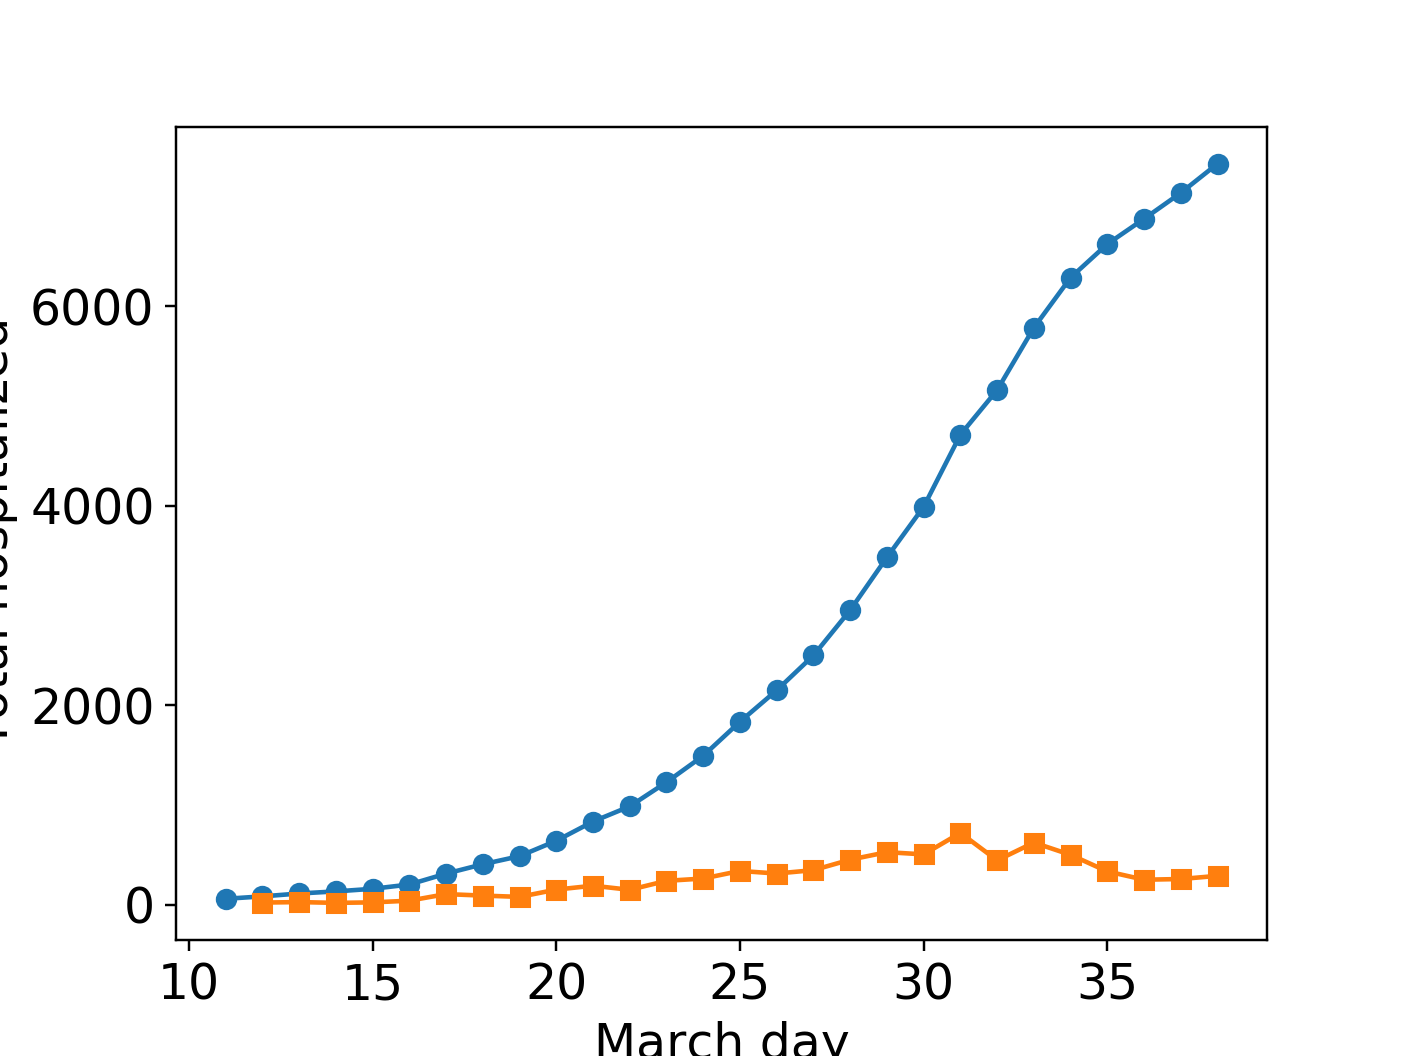

Text(0, 0.5, 'Total hospitalized')

In [19]:
pl.figure()
x_points = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,\
            31+1,31+2,31+3,31+4,31+5,31+6, 31+7]
y_points = [62,86,115,136,162,205,314,408,489,643,836,988,1230,1495,1836,2151,2500,2954,3483,3990,4712,\
            5159,5784,6286,6622,6875,7135, 7427]
y_points_diff = [y_points[i] - y_points[i-1] for i in range(1,len(y_points))]
pl.plot(x_points, y_points, marker='o')
pl.plot(x_points[1:], y_points_diff, marker='s')
pl.xlabel('March day')
pl.ylabel('Total hospitalized')
#pl.setxticks(x_points,x_points)

In [ ]:
for roi in ['custom.V1', 'custom.V2', 'custom.V3']:
    alpha_roi = roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh
    
    pl.figure()
    pl.title(roi+" Baselines scatter")
    pl.ylabel("Neural baseline (C)")
    pl.xlabel("Surround baseline (D)")
    pl.scatter(baselines[alpha_roi,1], baselines[alpha_roi,0], s=1)

fsnative ABD_1S sub-007
fsnative ABD_1S sub-006
fsnative ROI_drawing sub-006
fsnative ROI_drawing sub-007


<IPython.core.display.Javascript object>


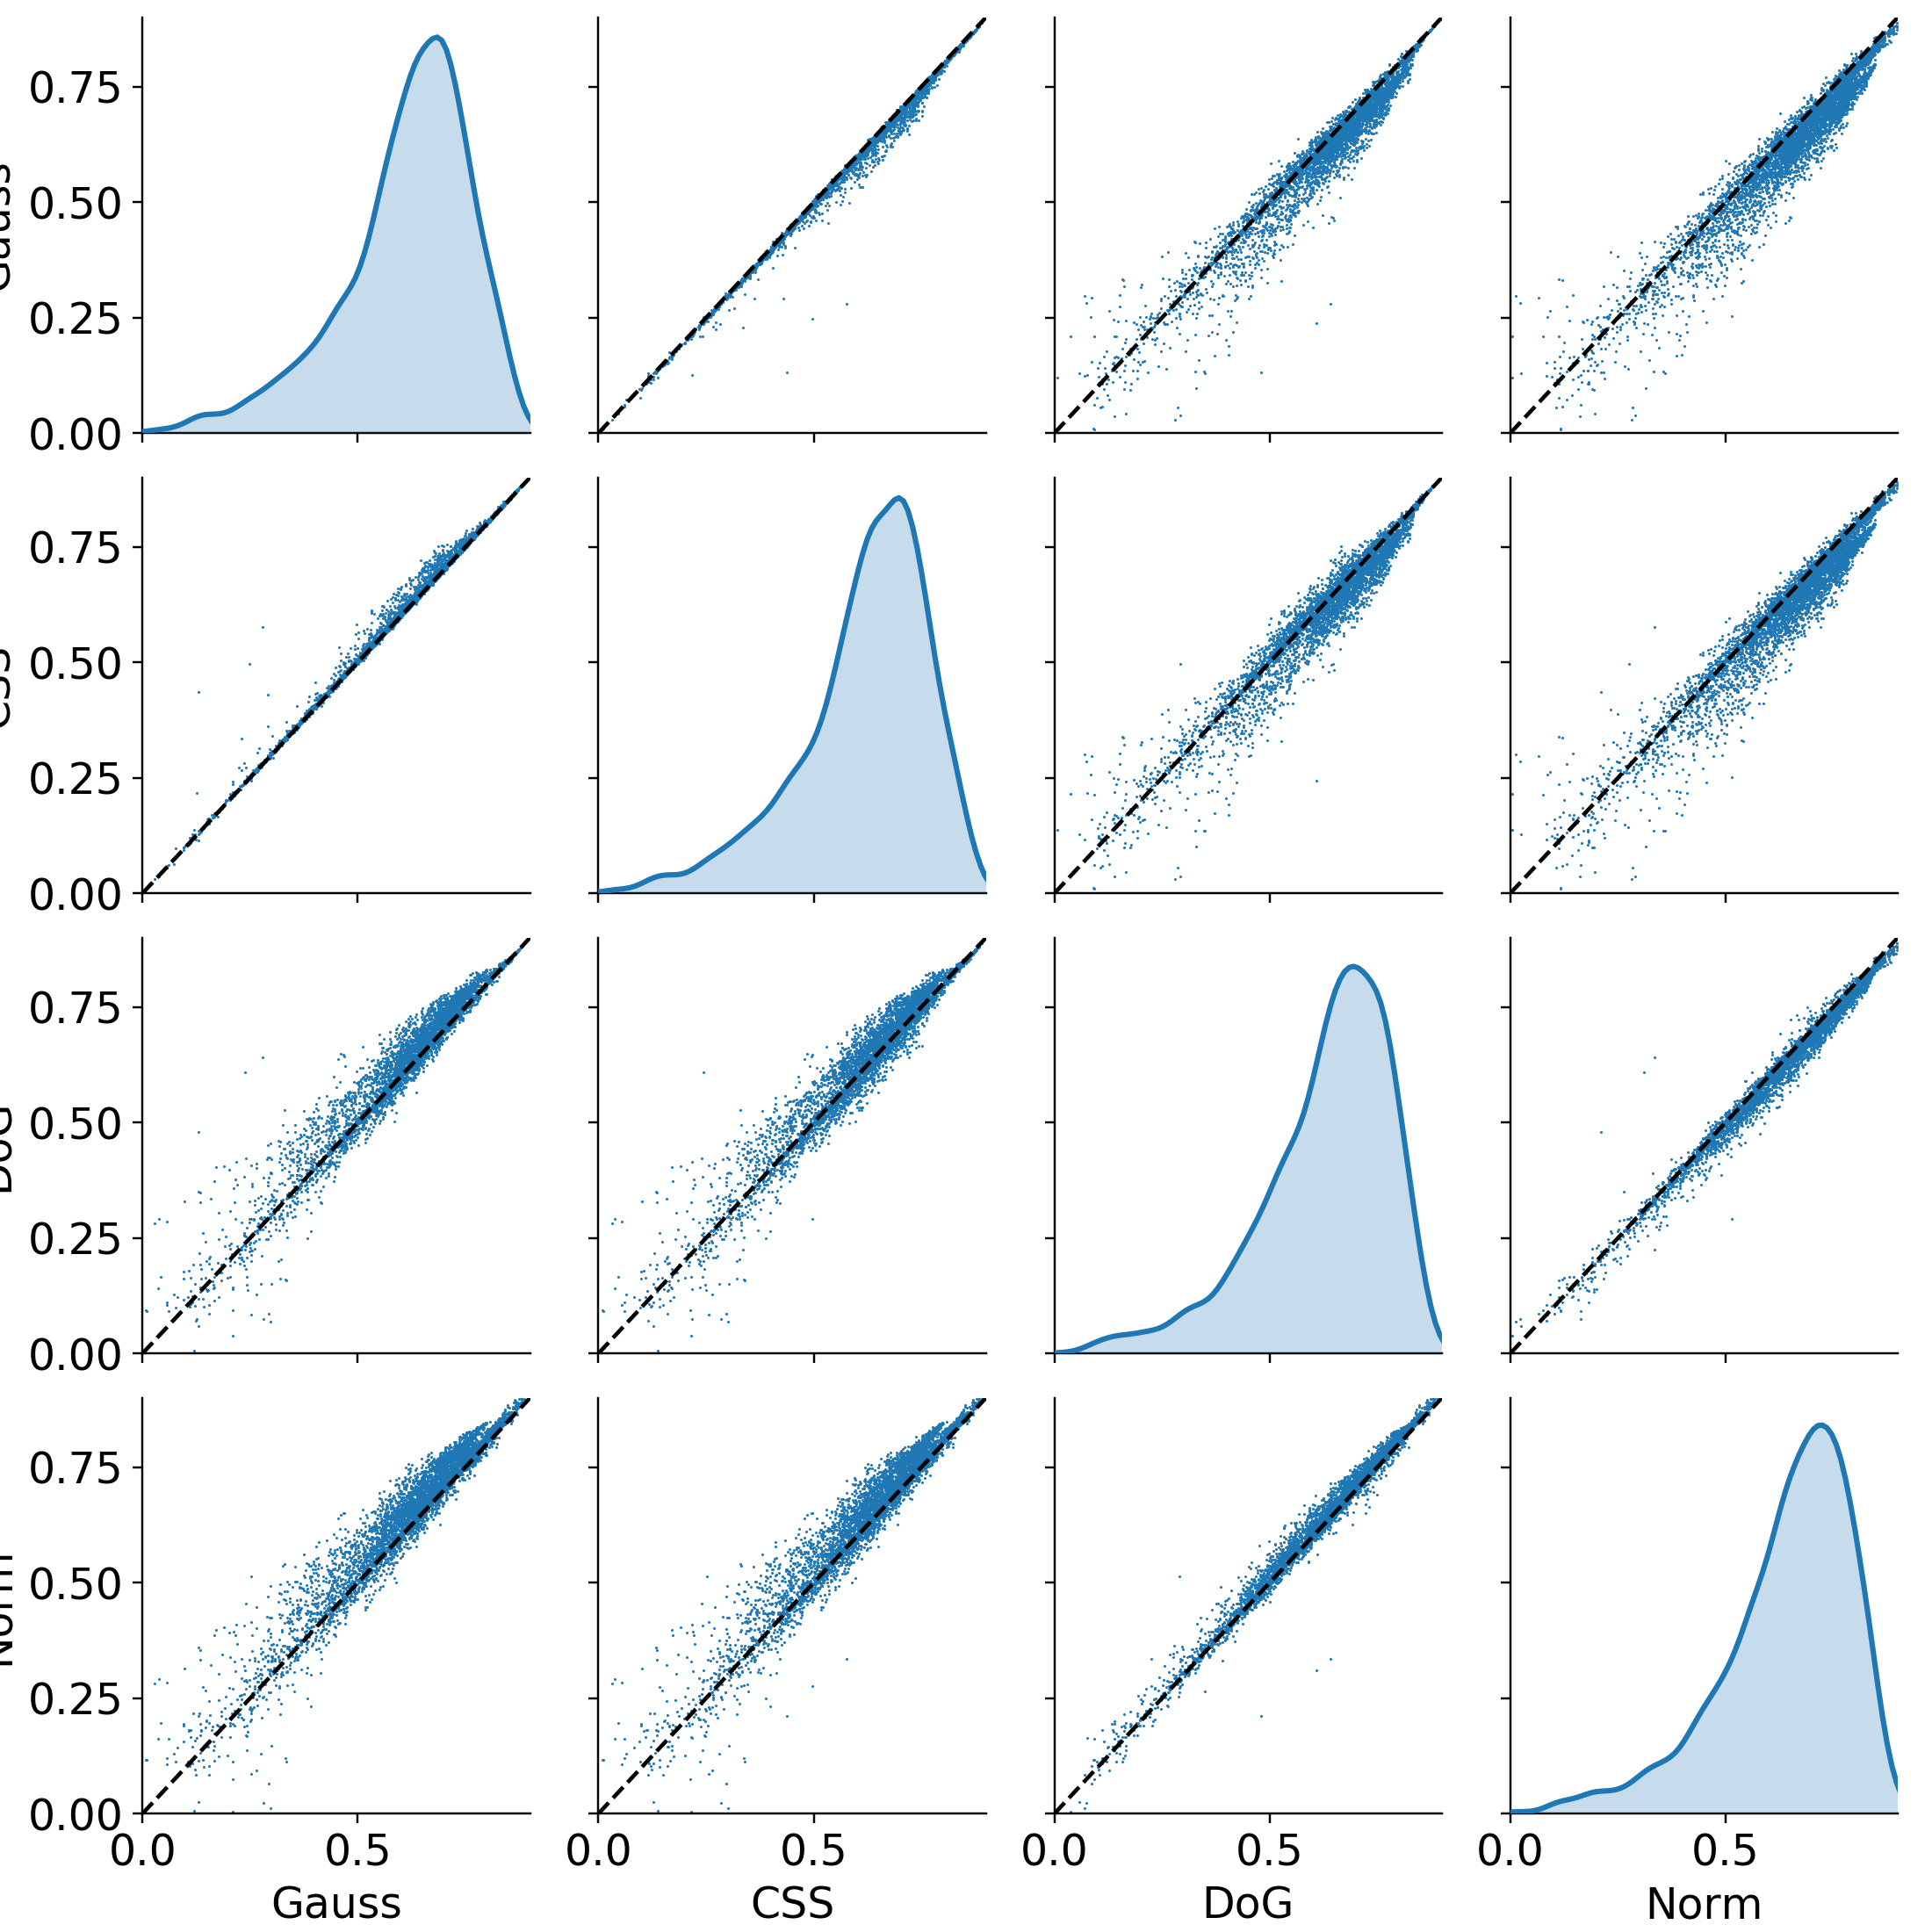

In [33]:
vis_res.set_alpha()
subj='sub-007'
subj_res = vis_res.main_dict['fsnative']['ABD_1S'][subj]

scatter_rois = ['custom.V1']#, 'custom.V2', 'custom.V3' ,'custom.hV4','custom.VO',
                      #'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']
#scatter_rois = ['custom.V1']

dataframes = []

for roi in scatter_rois:
    alpha_roi = (roi_mask(vis_res.idx_rois[subj][roi], subj_res['Processed Results']['Alpha']['all'])>0.1)
    surround_voxels = subj_res['Processed Results']['RSq']['DoG'][alpha_roi]>subj_res['Processed Results']['RSq']['Gauss'][alpha_roi]
    nonlinear_voxels = subj_res['Processed Results']['RSq']['CSS'][alpha_roi]>subj_res['Processed Results']['RSq']['Gauss'][alpha_roi]
                                
    data={model:subj_res['Processed Results']['RSq'][model][alpha_roi] for model in subj_res['Processed Results']['RSq']}
    #data={model:(subj_res['Processed Results']['RSq'][model][alpha_roi]/noise_ceiling_full[alpha_roi]) for model in subj_res['Processed Results']['RSq']}
    #data['NC'] = noise_ceiling_full[alpha_roi]
    data['ROI'] = [roi] * np.sum(alpha_roi)
    dataframes.append(pds.DataFrame(data))



test = pds.concat(dataframes)


g = sns.PairGrid(test, hue="ROI")
g = g.map_offdiag(sns.scatterplot,  s=1, alpha=1, markers='o', linewidth=0)#, linewidth=0.5, edgecolor='white')
#g = g.add_legend(loc=2)
for ax in g.axes.flat[np.arange(len(g.axes.flat))%5!=0]:
    ax.plot((0, 1), (0, 1), ls="--", color='black')
    ax.set_xlim(0,0.9)
    ax.set_ylim(0,0.9)
g = g.map_diag(sns.kdeplot, lw=2, shade=True)


In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [10]:
analysis_settings = '/Users/marcoaqil/analysis_settings_cartesius.yml'

with open(analysis_settings) as f:
    analysis_info = yaml.safe_load(f)

n_pix = analysis_info["n_pix"]
discard_volumes = analysis_info["discard_volumes"]

screen_size_cm = analysis_info["screen_size_cm"]
screen_distance_cm = analysis_info["screen_distance_cm"]
TR = analysis_info["TR"]

task_names = analysis_info["task_names"]

fitting_space = analysis_info["fitting_space"]
save_raw_timecourse = analysis_info["save_raw_timecourse"]

filter_predictions = analysis_info["filter_predictions"]
filter_type = analysis_info["filter_type"]

first_modes_to_remove = analysis_info["first_modes_to_remove"]
last_modes_to_remove_percent = analysis_info["last_modes_to_remove_percent"]
window_length = analysis_info["window_length"]
polyorder = analysis_info["polyorder"]
highpass = analysis_info["highpass"]
add_mean = analysis_info["add_mean"]

n_jobs = analysis_info["n_jobs"]
hrf = analysis_info["hrf"]
verbose = analysis_info["verbose"]
rsq_threshold = analysis_info["rsq_threshold"]
models_to_fit = analysis_info["models_to_fit"]
n_batches = analysis_info["n_batches"]
fit_hrf = analysis_info["fit_hrf"]
fix_bold_baseline = analysis_info["fix_bold_baseline"]
if fix_bold_baseline:
    norm_bold_baseline = analysis_info["norm_bold_baseline"]


crossvalidate = analysis_info["crossvalidate"]

if crossvalidate and "fit_task" in analysis_info and "fit_runs" in analysis_info:
    print("Can only specify one between fit_task and fit_runs for crossvalidation.")
    raise IOError
elif crossvalidate and "fit_task" in analysis_info:
    print("Performing crossvalidation over tasks.") 
    fit_task = analysis_info["fit_task"]
    fit_runs = None
elif crossvalidate and "fit_runs" in analysis_info:
    print("Performing crossvalidation over runs.")    
    fit_task = None
    fit_runs = analysis_info["fit_runs"]
else:
    print("Not performing crossvalidation.")
    fit_task = None
    fit_runs = None        
    
xtol = analysis_info["xtol"]
ftol = analysis_info["ftol"]

dm_edges_clipping = analysis_info["dm_edges_clipping"]
baseline_volumes_begin_end = analysis_info["baseline_volumes_begin_end"]
min_percent_var = analysis_info["min_percent_var"]

param_bounds = analysis_info["param_bounds"]
pos_prfs_only = analysis_info["pos_prfs_only"]
normalize_RFs = analysis_info["normalize_RFs"]


param_constraints = analysis_info["param_constraints"]
surround_sigma_larger_than_centre = analysis_info["surround_sigma_larger_than_centre"]
positive_centre_only = analysis_info["positive_centre_only"]

n_chunks = analysis_info["n_chunks"]
refit_mode = analysis_info["refit_mode"].lower()

if "norm" in models_to_fit and "norm_model_variant" in analysis_info:
    norm_model_variant = analysis_info["norm_model_variant"]
else:
    norm_model_variant = "abcd"

if "roi_idx_path" in analysis_info and os.path.exists(analysis_info["roi_idx_path"]):
    roi_idx = np.load(analysis_info["roi_idx_path"])
    print("Using ROI mask from: "+analysis_info["roi_idx_path"])
else:
    roi_idx = None

if "data_scaling" in analysis_info:
    data_scaling = analysis_info["data_scaling"]
else:
    data_scaling = None

if not param_bounds and norm_model_variant != "abcd":
    print("Norm model variant "+norm_model_variant+" was selected, \
          but param_bounds=False. param_bounds will be set to True.")
    param_bounds = True

    
screenshot_paths = ["/Users/marcoaqil/sub-001_ses-1_Logs/sub-001_ses-1_task-1S_run-1_Logs/Screenshots/"]
data_path = "/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires"

Performing crossvalidation over runs.


In [11]:
#create stim
prf_stim = create_full_stim(screenshot_paths,
                n_pix,
                discard_volumes,
                baseline_volumes_begin_end,                                         
                dm_edges_clipping,
                screen_size_cm,
                screen_distance_cm,
                TR,
                task_names)

test_prf_stim = prf_stim

Design matrix completed


In [61]:
from utils.utils import prepare_data
tc_full_iso_nonzerovar_dict = prepare_data('sub-001',
                                           prf_stim,
                                           test_prf_stim,

                                           discard_volumes,
                                           min_percent_var,
                                           fix_bold_baseline,

                                           filter_type,

                                           first_modes_to_remove,
                                           last_modes_to_remove_percent,

                                           window_length,
                                           polyorder,
                                           highpass,
                                           add_mean,

                                           data_path,
                                           fitting_space,
                                           data_scaling,
                                           roi_idx,
                                           save_raw_timecourse,

                                           crossvalidate,
                                           fit_runs,
                                           fit_task)

For task 2R, hemisphere L of subject sub-001, a total of 2 runs were found.
For task 2R, hemisphere L of subject sub-001, a total of 2 runs were found.
For task 2R, hemisphere R of subject sub-001, a total of 2 runs were found.
For task 2R, hemisphere R of subject sub-001, a total of 2 runs were found.


In [12]:
#initialize models 
gg = Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=filter_predictions,
                          filter_type=filter_type,
                          first_modes_to_remove=first_modes_to_remove,
                          last_modes_to_remove_percent=last_modes_to_remove_percent,
                          window_length=window_length,
                          polyorder=polyorder,
                          highpass=highpass,
                          add_mean=add_mean,
                          normalize_RFs=normalize_RFs)


In [63]:
timecourse_example = tc_full_iso_nonzerovar_dict['tc'][:1000]
if crossvalidate:
    timecourse_example_test = tc_full_iso_nonzerovar_dict['tc_test'][:1000]

gf = Iso2DGaussianFitter(
    data=timecourse_example, gridder=gg, n_jobs=8, fit_hrf=fit_hrf)


# gauss grid params
grid_nr = 20
max_ecc_size = prf_stim.screen_size_degrees/2.0
sizes, eccs, polars = max_ecc_size * np.linspace(0.25, 1, grid_nr)**2, \
    max_ecc_size * np.linspace(0.1, 1, grid_nr)**2, \
    np.linspace(0, 2*np.pi, grid_nr)


gf.grid_fit(ecc_grid=eccs,
                polar_grid=polars,
                size_grid=sizes,
                verbose=True,
                n_batches=2,
                pos_prfs_only=pos_prfs_only)

Each batch contains approx. 500 voxels.


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    7.1s finished


In [75]:
ss=prf_stim.screen_size_degrees
inf=np.inf
eps=0.1
gauss_bounds = [(-2*ss, 2*ss),  # x
                    (-2*ss, 2*ss),  # y
                    (eps, 2*ss),  # prf size
                    (0, +inf),  # prf amplitude
                    (0, +inf)]  # bold baseline


gf.iterative_fit(rsq_threshold=rsq_threshold, verbose=True,
                         bounds=gauss_bounds,
                         #constraints=constraints_gauss,
                             xtol=0.000001,
                             ftol=0.000001)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   16.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   37.7s
[Parallel(n_jobs=8)]: Done 462 out of 462 | elapsed:   42.2s finished


In [67]:
gf.crossvalidate_fit(timecourse_example_test,
                    test_stimulus=test_prf_stim,
                    single_hrf=True)

In [13]:
#initialize models
gg_css = CSS_Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=False,
                          filter_type=filter_type,
                          first_modes_to_remove=first_modes_to_remove,
                          last_modes_to_remove_percent=last_modes_to_remove_percent,                                 
                          window_length=window_length,
                          polyorder=polyorder,
                          highpass=highpass,
                          add_mean=add_mean,
                          normalize_RFs=normalize_RFs)

gg_norm = Norm_Iso2DGaussianGridder(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=False,
                                  filter_type=filter_type,
                                  first_modes_to_remove=first_modes_to_remove,
                                  last_modes_to_remove_percent=last_modes_to_remove_percent,                                   
                                    window_length=window_length,
                                  polyorder=polyorder,
                                  highpass=highpass,
                                  add_mean=add_mean,
                                    normalize_RFs=normalize_RFs)

gg_dog = DoG_Iso2DGaussianGridder(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=False,
                                  filter_type=filter_type,
                                  first_modes_to_remove=first_modes_to_remove,
                                  last_modes_to_remove_percent=last_modes_to_remove_percent,                                
                                  window_length=window_length,
                                  polyorder=polyorder,
                                  highpass=highpass,
                                  add_mean=add_mean,
                                  normalize_RFs=normalize_RFs)

In [14]:
noise_ceiling_dict = dict()

4780
Norm: [  0.79955629  -2.67816157   1.76126791   6.45005569 100.
   1.          21.57275011   0.00068128   0.00149637   0.62050702]
DoG: [  1.01321707  -3.33494685   2.99757575   2.15213092 100.
   2.11570455   3.02755393   0.59649761]
Gauss: [  0.89998354  -3.27858188   1.80849683   0.04014353 100.
   0.59347906]
CSS: [  0.90721377  -3.04928593   0.16437132   2.54557451 100.
   0.010422     0.6289988 ]
Noise ceiling: 0.5803319811820984


<IPython.core.display.Javascript object>


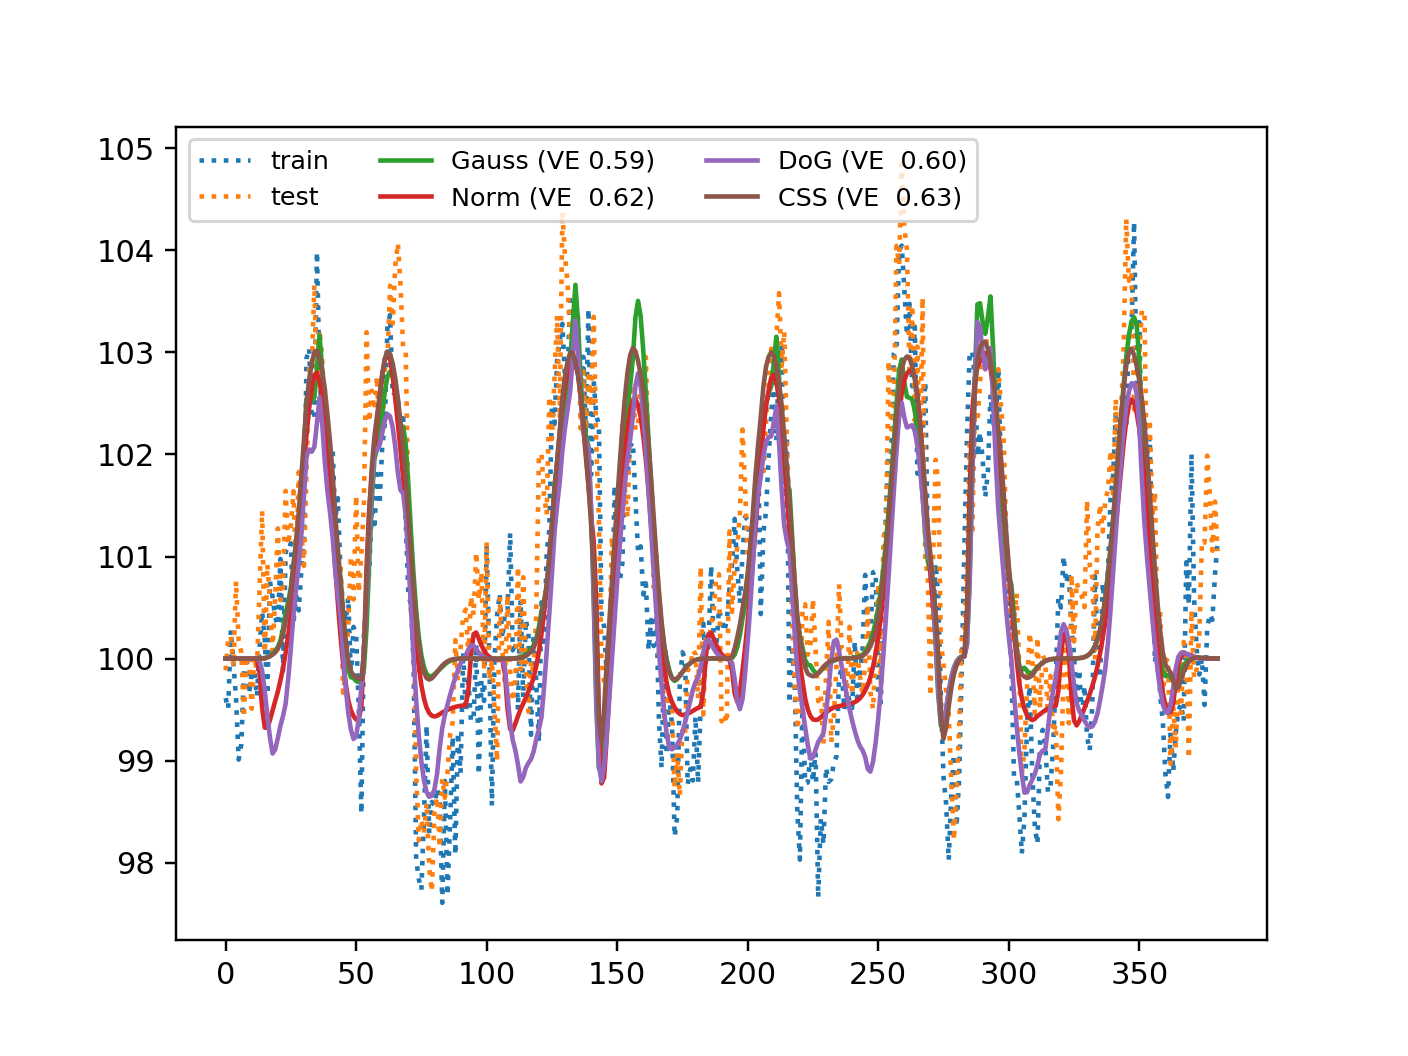

In [17]:
subj='sub-007'
timecourse = np.load(f'/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/{subj}_timecourse_space-fsnative.npy')
timecourse_test = np.load(f'/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/{subj}_timecourse-test_space-fsnative.npy')
subj_res=vis_res.main_dict['fsnative']['ABD_1S'][subj]


noise_ceiling_odd = 1-np.sum((timecourse_test-timecourse)**2, axis=-1)/(timecourse_test.shape[-1]*timecourse_test.var(-1))
noise_ceiling_even = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse.shape[-1]*timecourse.var(-1))
noise_ceiling = (noise_ceiling_odd+noise_ceiling_even) / 2
noise_ceiling_full = np.zeros(subj_res['Results']['mask'].shape)
noise_ceiling_full[subj_res['Results']['mask']] = noise_ceiling
noise_ceiling_dict[subj] = noise_ceiling_full

roi = 'custom.LO'
pl.close('all')
alpha_roi = (roi_mask(vis_res.idx_rois[subj][roi], subj_res['Processed Results']['Alpha']['all'])>0.55)#*(subj_res['Processed Results']['Surround Size (fwatmin)']['Norm']<6)

res_num = np.argsort(alpha_roi*(subj_res['Processed Results']['RSq']['CSS']-subj_res['Processed Results']['RSq']['Gauss']))

for i in range(1,2):

    v_num = np.sum(subj_res['Results']['mask'][:res_num[-i]])
    #v_num=8894
    #v_num=8328
    #v_num=np.argsort(gf_norm.noise_ceiling)[-1]
    print(v_num)

    np.set_printoptions(suppress=True)
    print(f"Norm: {subj_res['Results']['Norm'][v_num]}")
    print(f"DoG: {subj_res['Results']['DoG'][v_num]}")
    print(f"Gauss: {subj_res['Results']['Gauss'][v_num]}")
    print(f"CSS: {subj_res['Results']['CSS'][v_num]}")
    print(f"Noise ceiling: {noise_ceiling[v_num]}")
    pl.figure()

    pl.plot(timecourse[v_num], label='train', linestyle = ':')
    pl.plot(timecourse_test[v_num], label='test', linestyle = ':')
    pl.plot(gg.return_prediction(*list(subj_res['Results']['Gauss'][v_num,:-1].T))[0], label=f"Gauss (VE {subj_res['Results']['Gauss'][v_num][-1]:.2f})") #divide by /noise_ceiling[v_num] to get NC frac
    pl.plot(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0], label=f"Norm (VE  {subj_res['Results']['Norm'][v_num][-1]:.2f})")
    pl.plot(gg_dog.return_prediction(*list(subj_res['Results']['DoG'][v_num,:-1].T))[0], label=f"DoG (VE  {subj_res['Results']['DoG'][v_num][-1]:.2f})")
    pl.plot(gg_css.return_prediction(*list(subj_res['Results']['CSS'][v_num,:-1].T))[0], label=f"CSS (VE  {subj_res['Results']['CSS'][v_num][-1]:.2f})")

    late_iso_dict = prf_stim.late_iso_dict
    pl.legend(ncol=3, fontsize='small')




In [ ]:
#######various testing cells

<IPython.core.display.Javascript object>


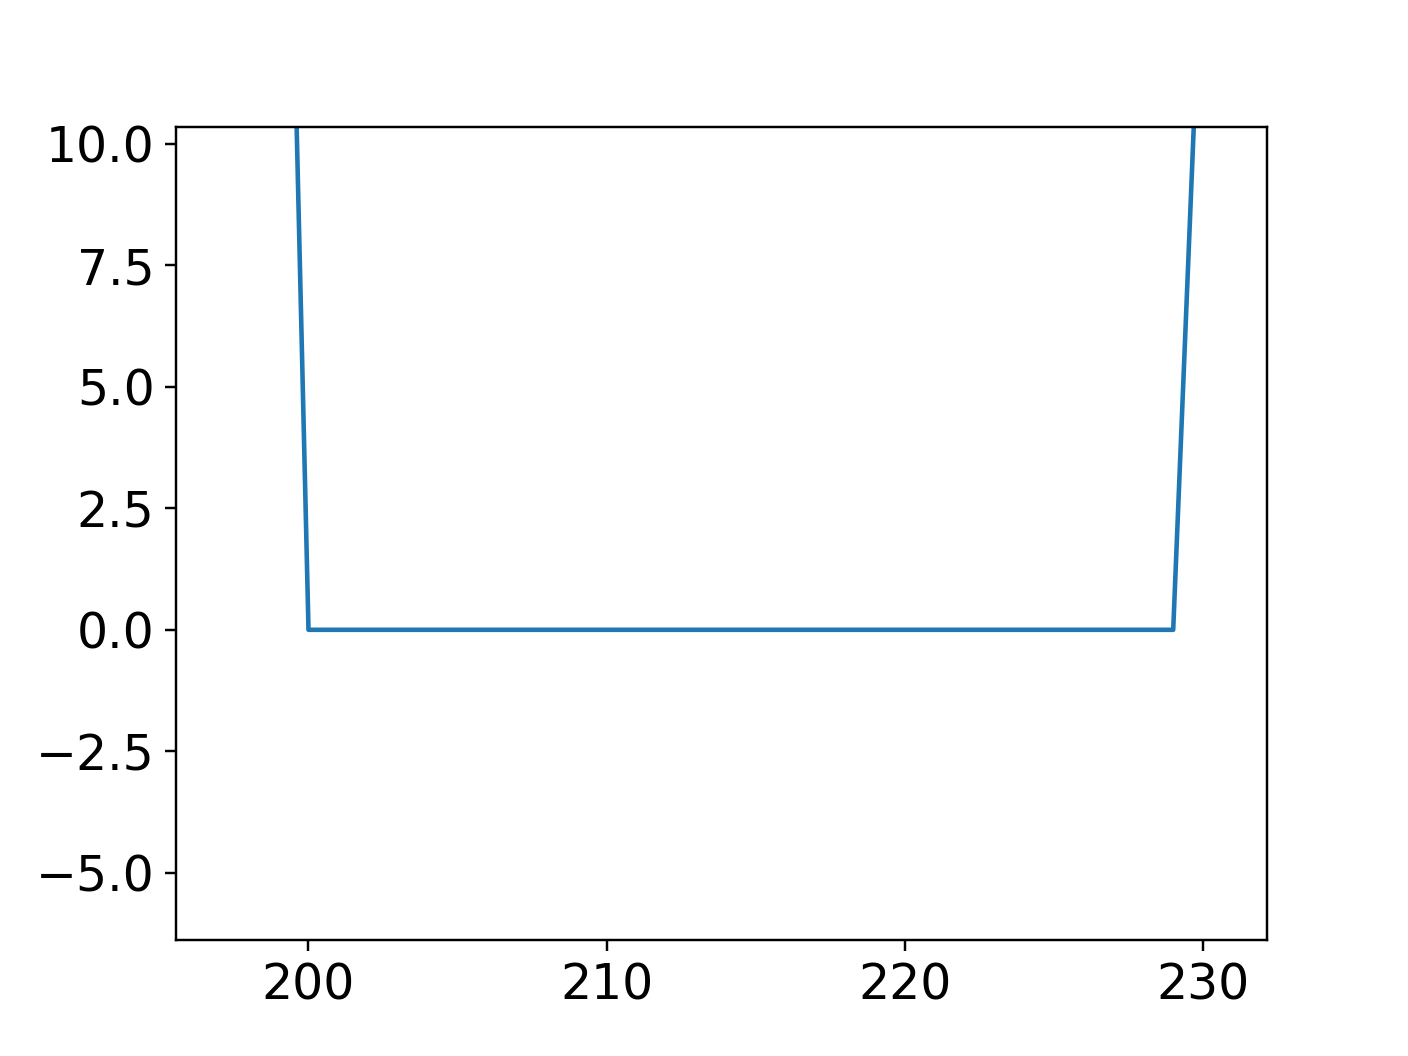

In [369]:
bar_passes = prf_stim.design_matrix.sum((0,1))
fig=pl.figure()
pl.imshow(prf_stim.design_matrix[:,:,13])
fig=pl.figure()
pl.plot(bar_passes)

(2, 27)


<IPython.core.display.Javascript object>


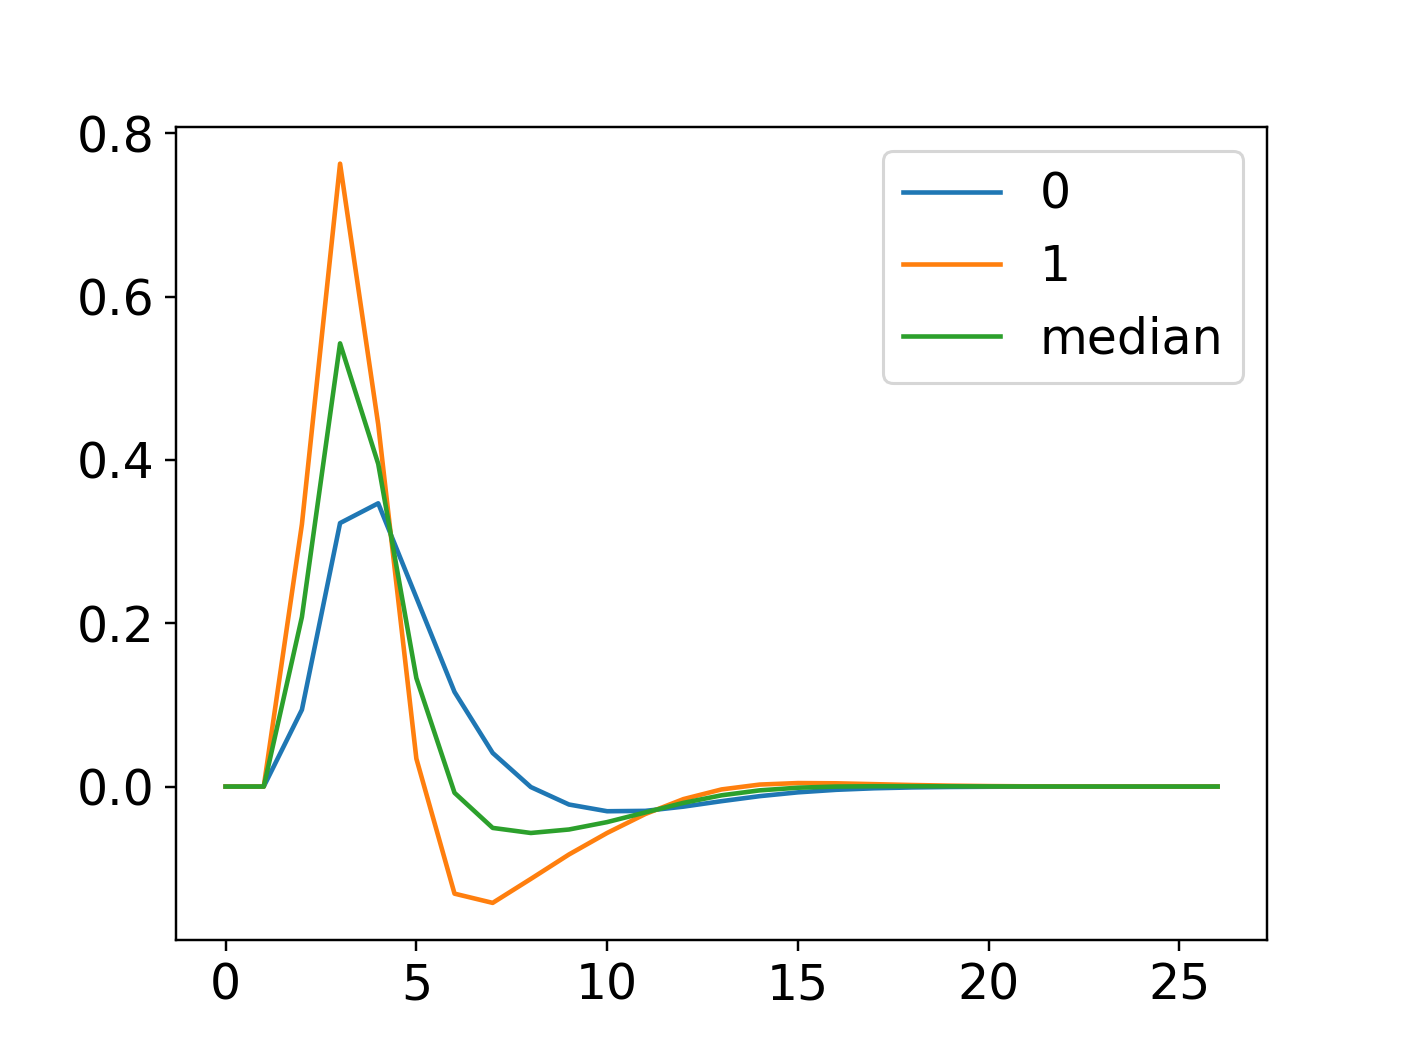

11.477048509899728
5.3548203719686995


In [569]:
current_hrf = gg_norm.create_hrf([[1.0,1.0],[1.0,4.6],[0,0]])
print(current_hrf.shape)
neural_tc = np.ones((1,100))
#neural_tc[1]=1
#neural_tc[2]=2
pl.figure()

for i in range(current_hrf.shape[0]):
    pl.plot(current_hrf[i].T, label=f"{i}")
    print(current_hrf[i].max()/np.abs(current_hrf[i].min()))
pl.plot(np.median(current_hrf, axis=0).T, label='median')
pl.legend()

<IPython.core.display.Javascript object>


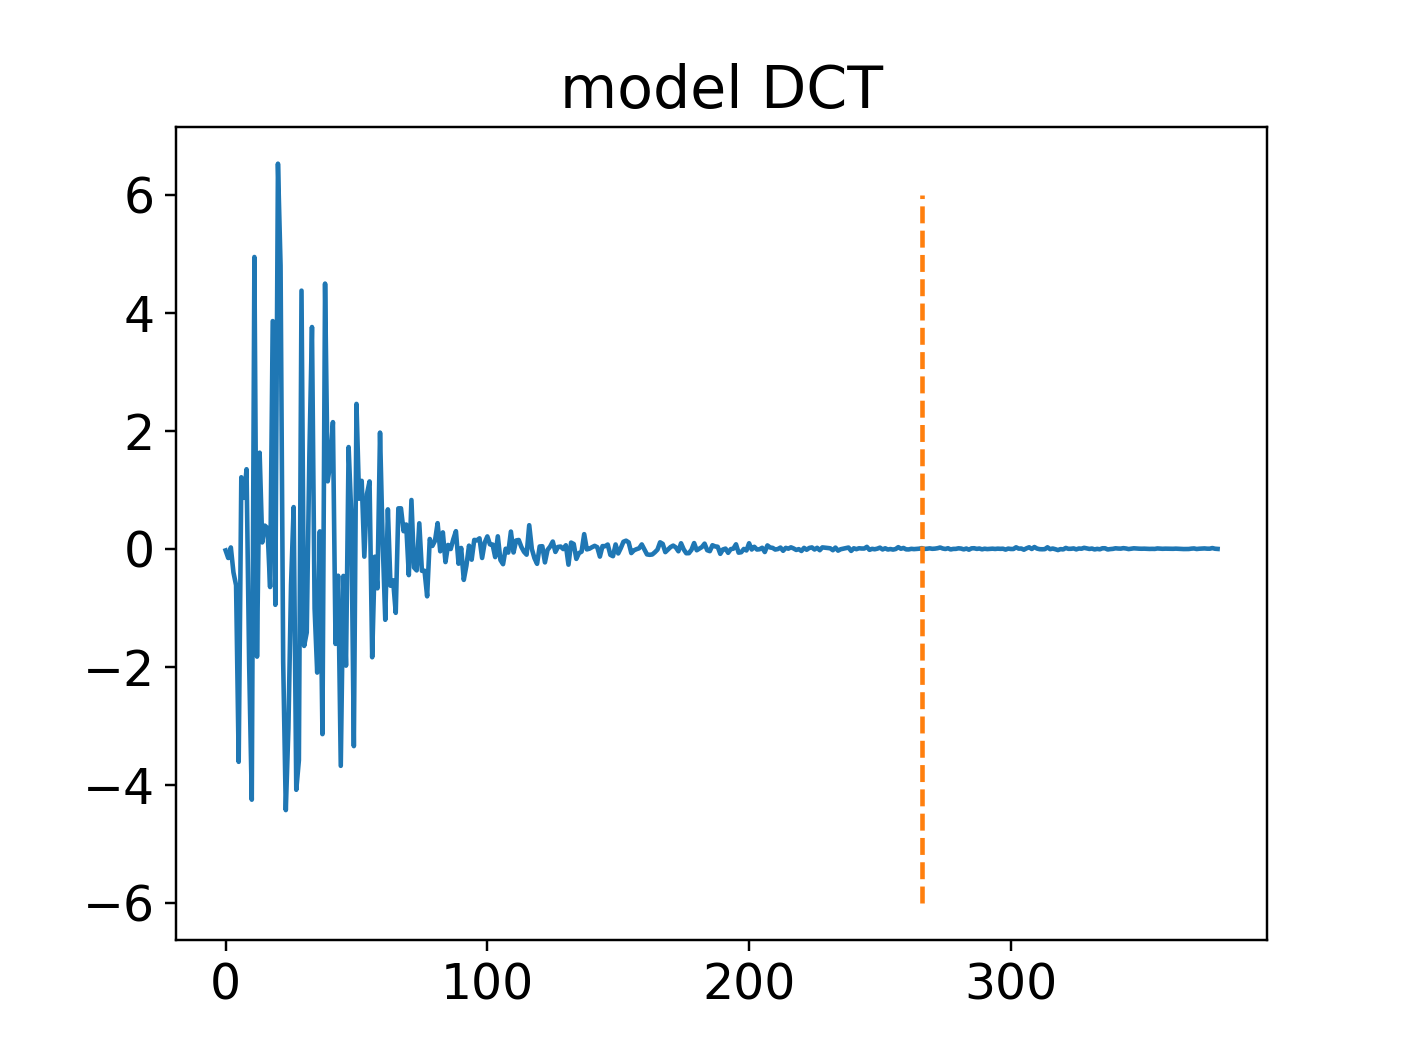

<IPython.core.display.Javascript object>


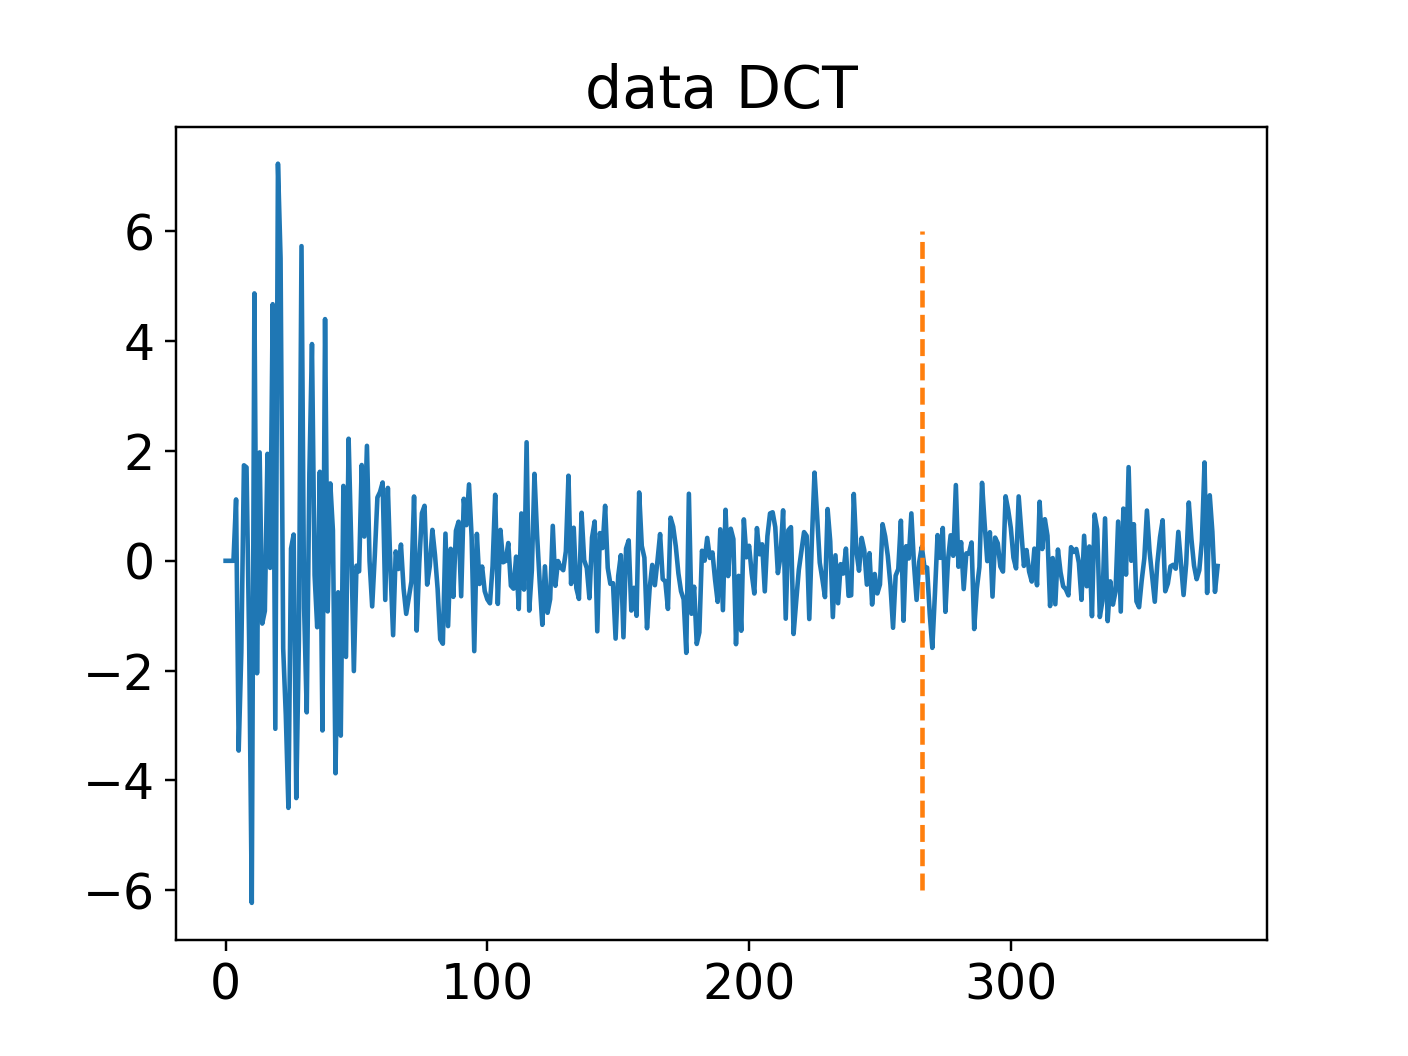

In [468]:
pl.figure()
pl.title('model DCT')
pl.plot(sp.fftpack.dct(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0], norm='ortho', axis=-1)[1:])
pl.plot((380-114)*np.ones(13), np.arange(-6,7), linestyle='--')

pl.figure()
pl.title('data DCT')
pl.plot(sp.fftpack.dct(timecourse[v_num], norm='ortho', axis=-1)[1:])
pl.plot((380-114)*np.ones(13), np.arange(-6,7), linestyle='--')

In [1130]:
current_nc = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse_test.var(-1)*timecourse_test.shape[-1])

print(np.median(current_nc[current_nc>0.0]))

tc_filt = sgfilter_predictions(timecourse,
                                                     window_length=139,
                                                     polyorder=1,
                                                     highpass=True,
                                                     add_mean=True)


tc_filt *= (100/tc_filt.mean(-1)[...,np.newaxis])

#tc_filt *= (100/np.median(tc_filt[...,prf_stim.late_iso_dict['1S']])[np.newaxis,...])
#tc_filt = sp.stats.zscore(tc_filt, axis=-1)
tc_filt += (100-np.median(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

tc_test_filt = sgfilter_predictions(timecourse_test,
                                                     window_length=139,
                                                     polyorder=1,
                                                     highpass=True,
                                                     add_mean=True)

tc_test_filt *= (100/tc_test_filt.mean(-1)[...,np.newaxis])

#tc_test_filt = sp.stats.zscore(tc_test_filt,axis=-1)
tc_test_filt += (100-np.median(tc_test_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

nc_filt = 1-np.sum((tc_filt-tc_test_filt)**2, axis=-1)/(tc_test_filt.var(-1)*tc_test_filt.shape[-1])

print(np.median(nc_filt[current_nc>0.0]))


0.31834036
0.42667404


In [1231]:
current_nc = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse_test.var(-1)*timecourse_test.shape[-1])

print(np.median(current_nc[current_nc>0.0]))
print(np.sum(current_nc>0.0))

for modes in [5]:
    print(modes)
    for modes_last in [250]:#np.arange(300,380,5):
        print(modes_last)
        trans = sp.fftpack.dct(timecourse, norm='ortho', axis=-1)
        trans[:, :modes] = 0
        trans[:, -modes_last:] = 0

        tc_filt = sp.fftpack.idct(trans, norm='ortho', axis=-1)

        tc_filt += timecourse.mean(-1)[...,np.newaxis]

        tc_filt *= (100/tc_filt.mean(-1))[...,np.newaxis]

        #tc_filt = sp.stats.zscore(tc_filt, axis=-1)
        #tc_filt += (100-np.median(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

        trans_test = sp.fftpack.dct(timecourse_test, norm='ortho', axis=-1)
        trans_test[:, :modes] = 0
        trans_test[:, -modes_last:] = 0

        tc_test_filt = sp.fftpack.idct(trans_test, norm='ortho', axis=-1)

        tc_test_filt += timecourse_test.mean(-1)[...,np.newaxis]
        tc_test_filt *= (100/tc_test_filt.mean(-1))[...,np.newaxis]

        #tc_test_filt = sp.stats.zscore(tc_test_filt,axis=-1)
        #tc_test_filt += (100-np.median(tc_test_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

        nc_filt = 1-np.sum((tc_filt-tc_test_filt)**2, axis=-1)/(tc_test_filt.var(-1)*tc_test_filt.shape[-1])

        print(np.median(nc_filt[current_nc>0.0]))
        print(np.sum(nc_filt>0.0))


0.31834036
7488
5
250
0.6927979
16392


In [1149]:
prf_stim.late_iso_dict['1S'] = np.array([0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 375, 376, 377, 378, 379, 380])

In [1154]:
np.mean(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1)

array([100.000015, 100.      ,  99.999985, ...,  99.999985, 100.000015,
        99.99998 ], dtype=float32)

In [721]:
gf_norm.iterative_search_params = subj_res['Results']['Norm']
gf_norm.rsq_mask = subj_res['Results']['Norm'][:,-1]>0.0
gf_norm.crossvalidate_fit(timecourse_test)

In [729]:
np.median(timecourse[v_num, late_iso_dict['1S']])

100.0

<IPython.core.display.Javascript object>


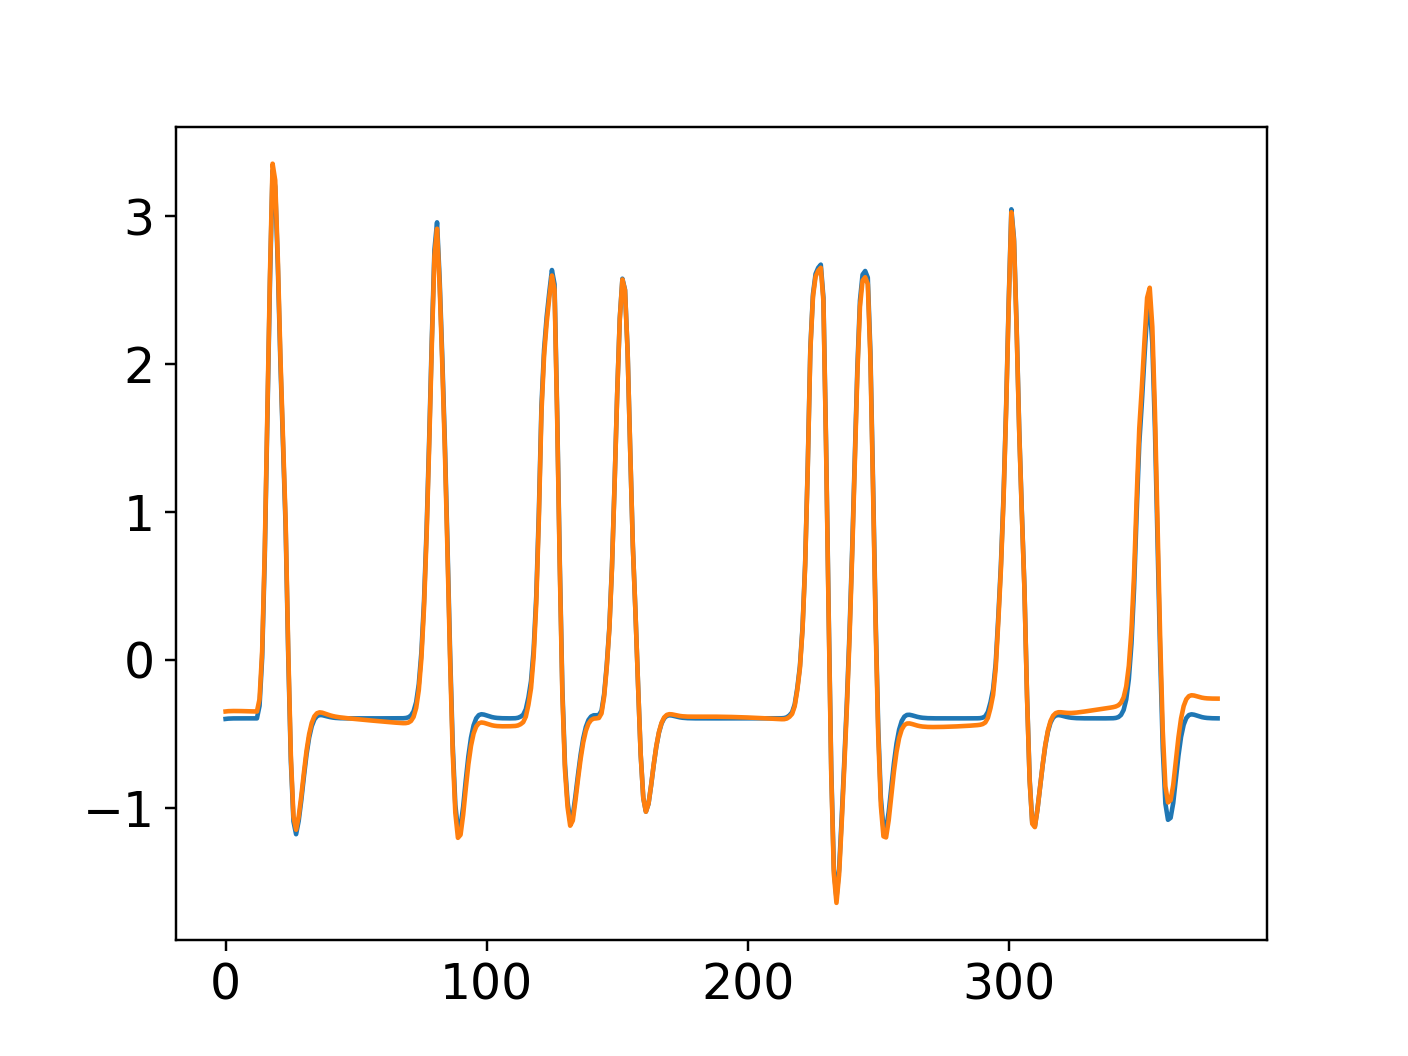

In [1020]:
trans = sp.fftpack.dct(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0], norm='ortho')
pl.figure()
pl.plot(sp.stats.zscore(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0]))
trans[:5]=0
pl.plot(sp.stats.zscore(sp.fftpack.idct(trans, norm='ortho')))

In [694]:
gg_norm.polyorder=1
gg_norm.window_length='adaptive'
gg_norm.add_mean=True
gg_norm.filter_predictions=True
gg_norm.highpass=True

In [573]:
norm_tc_fft=gg_norm.return_prediction(*list(np.array([[0,0,1,0.8,100,0.1,3,1,2],
                                                      [0,0,1,0.8,100,0.1,3,1,2]]).T))+0.5*np.random.rand(norm_tc_fft.shape[0], norm_tc_fft.shape[1])

norm_tc_ndi=gg_norm.return_prediction(*list(gf_norm.iterative_search_params[:,:-1].T))
print(gf_norm.iterative_search_params)

KeyboardInterrupt: 

In [496]:
gf_norm = Norm_Iso2DGaussianFitter(data=timecourse,
                                       gridder=gg_norm,
                                       n_jobs=1)

In [546]:
gf_norm.iterative_search_params=np.array([[0,0,1,0.8,100,0.1,3.0,1,2,2,0,1],
                                                      [0,0,1,0.8,100,0.1,3.0,1,2,2,0,1]])

gf_norm.iterative_search_params=np.ones((tc_full_iso_nonzerovar_dict['tc'].shape[0],10))
gf_norm.rsq_mask=np.ones(tc_full_iso_nonzerovar_dict['tc'].shape[0]).astype('bool')
gf_norm.crossvalidate_fit(tc_full_iso_nonzerovar_dict['tc_test'])#norm_tc_fft+0.5*np.random.rand(norm_tc_fft.shape[0], norm_tc_fft.shape[1]))

Error occurred during predictions savgol filtering.                  Using unfiltered prediction instead


In [838]:
gf_norm.crossvalidate_fit(timecourse_test)

0.043622790158751576

In [535]:
gf_norm.iterative_search_params

array([[  0.        ,   0.        ,   1.        ,   0.8       ,
        100.        ,   0.1       ,   3.        ,   1.        ,
          2.        ,   2.        ,   0.        ,   0.55912334],
       [  0.        ,   0.        ,   1.        ,   0.8       ,
        100.        ,   0.1       ,   3.        ,   1.        ,
          2.        ,   2.        ,   0.        ,   0.497631  ]])

0.9979048968921437


<IPython.core.display.Javascript object>


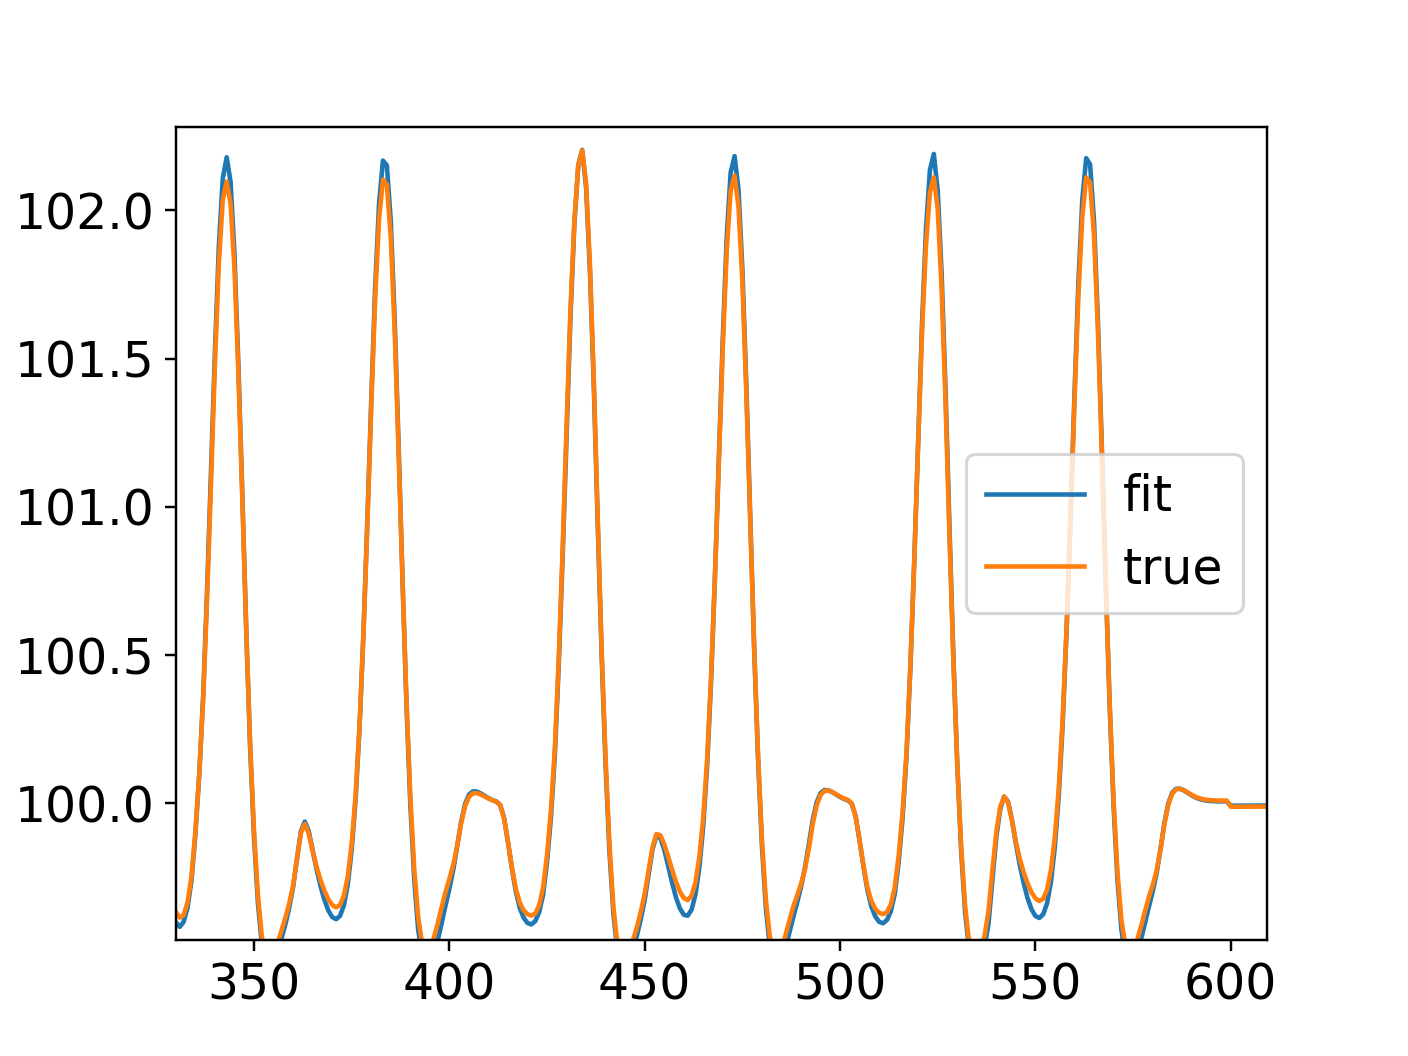

In [411]:
print(1-((norm_tc_ndi[0]-norm_tc_fft[0])**2).sum()/(len(norm_tc_fft[0])*norm_tc_fft[0].var()))
pl.figure()

pl.plot(norm_tc_ndi[0],label='fit')
pl.plot(norm_tc_fft[0],label='true')

pl.legend()

In [431]:
late_iso_dict = prf_stim.late_iso_dict

task_lengths = prf_stim.task_lengths
print(np.any(np.median(tc_full_iso_nonzerovar_dict['tc_test'][:,late_iso_dict['1S']], axis=-1) != 100 ))

False


In [436]:
np.corrcoef(tc_full_iso_nonzerovar_dict['tc_test'][0:2],tc_full_iso_nonzerovar_dict['tc'][0:2])

array([[ 1.        ,  0.27455435,  0.00772459,  0.01178409],
       [ 0.27455435,  1.        , -0.00728552, -0.00978152],
       [ 0.00772459, -0.00728552,  1.        ,  0.24647118],
       [ 0.01178409, -0.00978152,  0.24647118,  1.        ]])

In [365]:
#print(np.max(norm_tc_fft[0]))
print(norm_tc_fft[0][late_iso_dict['1R']].mean())
print(norm_tc_fft[0][task_lengths[0]+late_iso_dict['1S']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:2])+late_iso_dict['2R']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:3])+late_iso_dict['4F']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:4])+late_iso_dict['4R']].mean())

99.28377
99.30392
99.81529
99.64278
99.63825


<IPython.core.display.Javascript object>


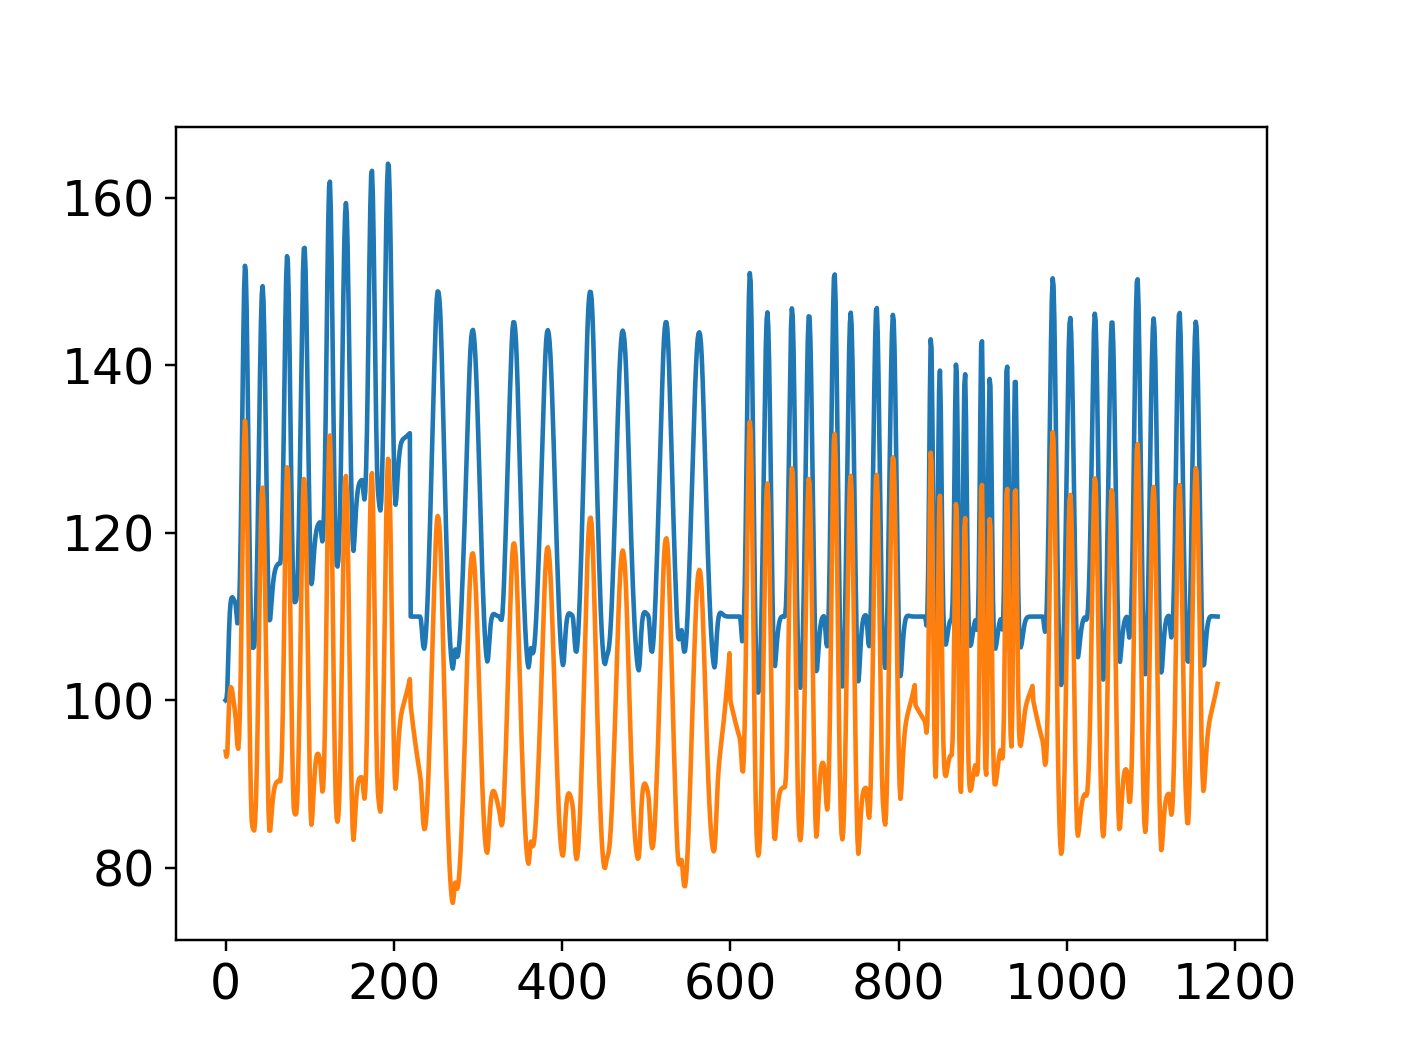

In [840]:
norm_tc_ndi[0][:220] += 0.1*np.arange(220)
pl.figure()
pl.plot(norm_tc_ndi[0])
norm_tc_fft = 100+sgfilter_predictions(norm_tc_ndi, window_length=139, polyorder=3,
                         highpass=True, add_mean=True, task_lengths=task_lengths,
                         task_names=task_names, late_iso_dict=late_iso_dict)
pl.plot(norm_tc_fft[0])

In [124]:
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')


In [13]:

tc_vox = timecourse[12,:]

In [ ]:
%matplotlib notebook
rsq_thresh=0.7

roi = 'visual_system'
#alpha_roi = roi_mask(idx_rois[roi],alpha)>rsq_thresh

alpha_roi = alpha>rsq_thresh#roi_mask(idx_rois[roi],alpha)>rsq_thresh

#create timecourses
vox_num=np.argmin((rsq[:,3]-rsq[:,1])*alpha_roi)#50370



vox_num = np.sum(nonzerovar_mask[:vox_num])
tc_vox=timecourse[vox_num] - 100




#norm_grid_tc=gg_norm.return_prediction(*list(norm_grid[vox_num,:-1]))
norm_tc=gg_norm.return_prediction(*list(norm_res[vox_num,:-1]))  - 100
gauss_tc=gg.return_prediction(*list(gauss[vox_num,:-1])) - 100
css_tc=gg_css.return_prediction(*list(css_res[vox_num,:-1])) - 100
dog_tc=gg_dog.return_prediction(*list(dog_res[vox_num,:-1])) - 100
norm_updated=gg_norm.return_prediction(*list(gf_norm.iterative_search_params[0,:-1])) - 100
css_updated=gg_css.return_prediction(*list(gf_css.iterative_search_params[0,:-1])) - 100

times=np.arange(len(tc_vox))*1.5

fig=pl.figure(figsize=(4, 9))
pl.plot(times[:task_lengths[0]], tc_vox[:task_lengths[0]], label='Data (Cond. a)', marker='s', markersize=4, color='black', linestyle='-') 
pl.plot(times[task_lengths[0]:np.sum(task_lengths[:2])], tc_vox[task_lengths[0]:np.sum(task_lengths[:2])], label='Cond. b', marker='o', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:2]):np.sum(task_lengths[:3])], tc_vox[np.sum(task_lengths[:2]):np.sum(task_lengths[:3])], label='Cond. c', marker='^', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:3]):np.sum(task_lengths[:4])], tc_vox[np.sum(task_lengths[:3]):np.sum(task_lengths[:4])], label='Cond. d', marker='v', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:4]):np.sum(task_lengths[:5])], tc_vox[np.sum(task_lengths[:4]):np.sum(task_lengths[:5])], label='Cond. e', marker='D', markersize=4, color='black', linestyle='-') 

pl.plot(times, gauss_tc, color='blue',linewidth=2)#,label='Gauss')
pl.plot(times, css_tc, color='orange',linewidth=2)#,label='CSS')
pl.plot(times, dog_tc, color='green',linewidth=2)#,label='DoG')
pl.plot(times, norm_tc, color='red',linewidth=2)#, label='Norm')


pl.plot(norm_updated,label='new norm')
pl.plot(css_updated,label='new css')
pl.legend(loc=1)


pl.xlabel('Time (s)')
#pl.ylabel('BOLD signal change (%)')

#pl.xlim(42,82)
#pl.xlim(350,390)
#pl.xlim(905,945)
#pl.xlim(1226.5,1266.5)
#pl.xlim(1663,1703)
#pl.ylim(-3,6)

np.set_printoptions(suppress=True)

print("gauss rsq: "+str(1-np.sum((tc_vox-gauss_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("css rsq: "+str(1-np.sum((tc_vox-css_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("dog rsq: "+str(1-np.sum((tc_vox-dog_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("norm rsq: "+str(1-np.sum((tc_vox-norm_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("new norm rsq: "+str(1-np.sum((tc_vox-norm_updated)**2)/(timecourse.shape[-1]*np.var(tc_vox))))

print("new css rsq: "+str(1-np.sum((tc_vox-css_updated)**2)/(timecourse.shape[-1]*np.var(tc_vox))))


print("gauss params")
print(gauss[vox_num])
print("css params")
print(css_res[vox_num])
print("dog params")
print(dog_res[vox_num])
print("norm params")
print(norm_res[vox_num])

#print("new norm params")
#print(gf_norm.iterative_search_params[0])

#norm_res[vox_num] = gf_norm.iterative_search_params[0]

#pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_1S_tc.png', dpi=200, bbox_inches='tight')

In [653]:
print(tc_vox[late_iso_dict['1R']].mean())
print(tc_vox[task_lengths[0]+late_iso_dict['1S']].mean())
print(tc_vox[np.sum(task_lengths[:2])+late_iso_dict['2R']].mean())
print(tc_vox[np.sum(task_lengths[:3])+late_iso_dict['4F']].mean())
print(tc_vox[np.sum(task_lengths[:4])+late_iso_dict['4R']].mean())

80890.47
80890.46
80890.45
80890.45
80890.45


In [486]:
from scipy.optimize import LinearConstraint, NonlinearConstraint

inf = 1e6
eps = 1e-1
ss = prf_stim.screen_size_degrees


gf_norm = Norm_Iso2DGaussianFitter(data=norm_tc_fft,
                                       gridder=gg_norm,
                                       n_jobs=1)
# gf_css = CSS_Iso2DGaussianFitter(data=tc_vox.reshape(-1,tc_vox.shape[-1]),
#                                        gridder=gg_css,
#                                        n_jobs=1)


constraints_dog = []
constraints_norm = []

In [134]:
#enforcing surround size larger than prf size
A_ssc_dog = np.array([[0,0,-1,0,0,0,1]])
A_ssc_norm = np.array([[0,0,-1,0,0,0,1,0,0]])

constraints_dog.append(LinearConstraint(A_ssc_dog,
                                                lb=0,
                                                ub=+inf))

constraints_norm.append(LinearConstraint(A_ssc_norm,
                                                lb=0,
                                                ub=+inf))

if pos_prfs_only:
        #enforcing positive central amplitude
    def positive_centre_prf_dog(x):
        if normalize_RFs:
            return x[3]/(2*np.pi*x[2]**2)-x[5]/(2*np.pi*x[6]**2)
        else:
            return x[3] - x[5]

    def positive_centre_prf_norm(x):
        if normalize_RFs:
            return (x[3]/(2*np.pi*x[2]**2)+x[7])/(x[5]/(2*np.pi*x[6]**2)+x[8]) - x[7]/x[8]
        else:
            return (x[3]+x[7])/(x[5]+x[8]) - x[7]/x[8]

    constraints_dog.append(NonlinearConstraint(positive_centre_prf_dog,
                                                lb=0,
                                                ub=+inf))
    constraints_norm.append(NonlinearConstraint(positive_centre_prf_norm,
                                            lb=0,
                                            ub=+inf))

In [327]:
start = np.ones((1,10))#np.copy(norm_res[vox_num].reshape(-1,10))
#start = np.insert(start, -1, 1.0, axis=-1)
#start = np.insert(start, -1, 0.0, axis=-1)
#start[0,4] = 60000
#start[0,8] = 1
#start[0,7] = 0
#print(gf_norm.rsq_mask.shape)
gf_norm.iterative_fit(rsq_threshold=0.0, verbose=True,
                              starting_params=start,#norm_grid[vox_num].reshape(-1,norm_grid[vox_num].shape[-1]),
                                      bounds=[(-2*ss, 2*ss),  # x
                                               (-2*ss, 2*ss),  # y
                                               (1e-2, 2*ss),  # prf size
                                               (0, inf),  # prf amplitude
                                               (100, 100),  # bold baseline
                                               (1, 1),  # surround amplitude
                                               (1e-2, 4*ss),  # surround size
                                               (0, inf),  # neural baseline
                                               (1, 1)],#, # surround baseline
                                             #(0,10),
                                             #(0,10)],  
                                       fit_hrf=False,
                                         constraints=[],
                     xtol=1e-10,
                     ftol=1e-10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Performing bounded, constrained minimization (trust-constr).


/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained

/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 434, function evaluations: 4950, CG iterations: 1807, optimality: 1.15e-05, constraint violation: 0.00e+00, execution time: 5.5e+01 s.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.8s finished


In [329]:
np.set_printoptions(suppress=True)
print(gf_norm.iterative_search_params)

[[ -0.00113465   0.00682906   0.89537049   5.03997013 100.
    1.           1.78311059   0.41833873   1.           0.99801984]]


In [406]:
np.set_printoptions(suppress=True)
#gf_norm.iterative_search_params[0,-2]=1
#gf_norm.iterative_search_params[0,-4]=6
#gf_norm.iterative_search_params[0,-5]=3

#gf_norm.iterative_search_params[0,3]=6000
#gf_norm.iterative_search_params[0,4]=80000
print(gf_norm.iterative_search_params[0])
print(norm_res[vox_num])
#print(gf_norm.iterative_search_params[0] - norm_res[vox_num])
print(norm_grid[vox_num])

[  1.61262881  -3.27140535   1.3109588   30.25251258  97.36434091
   3.37460018   1.43215614 101.72094163  92.30392389   0.70895484]
[  1.6126288   -3.27140605   1.31095913  30.25247063  97.36434061
   3.37459472   1.43215644 101.72093309  92.30388769   0.70895484]
[  1.57078693  -3.23347827   1.5173385   15.84158134  98.51573944
   1.           3.           0.         100.           0.69985837]


In [399]:
start = np.copy(css_res[vox_num].reshape(-1,7))
start = np.insert(start, -1, 1.0, axis=-1)
start = np.insert(start, -1, 0.0, axis=-1)

gf_css.iterative_fit(rsq_threshold=0, verbose=True,
                              starting_params=gf_css.iterative_search_params,
                             bounds=[(-2*ss, 2*ss),  # x
                                     (-2*ss, 2*ss),  # y
                                     (eps, 2*ss),  # prf size
                                     (-inf, +inf),  # prf amplitude
                                     (0, +inf),  # bold baseline
                                     (0.001, 3),
                                             (0,10),
                                             (0,10)],  # CSS exponent
                                       gradient_method='no',
                                       fit_hrf=True)

Using no-gradient minimization


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


`xtol` termination condition is satisfied.
Number of iterations: 208, function evaluations: 1854, CG iterations: 1089, optimality: 3.60e-04, constraint violation: 0.00e+00, execution time: 2e+01 s.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s finished


In [400]:
np.set_printoptions(suppress=True)
print(gf_css.iterative_search_params[0])

[ 1.55949306 -3.33135418  0.73937069  2.54859146 98.45336773  0.19237379
  2.95818123  0.00000049  0.78626246]


In [37]:
anp = norm_res[:10,:-1]#gf_norm.iterative_search_params[0]
agp = gauss[:10,:-1]
acp = css_res[:10,:-1]#gf_css.iterative_search_params[0]
adp = dog_res[:10,:-1]


x=np.linspace(-20,20,1000)
gauss_profile = agp[...,3] * np.exp(-0.5*x[...,np.newaxis]**2 / agp[...,2]**2)

half_max = np.max(gauss_profile, axis=0)/2

css_profile = (acp[3] * (np.exp(-0.5*x**2 / acp[2]**2))**acp[5])
dog_profile = adp[3] * np.exp(-0.5*x**2 / adp[2]**2) - adp[5] * np.exp(-0.5*x**2 / adp[6]**2)
norm_profile = (anp[3] * np.exp(-0.5*x**2 / anp[2]**2) + anp[7]) / (anp[5] * np.exp(-0.5*x**2 / anp[6]**2) + anp[8])
pl.figure()
pl.plot(x,norm_profile,label='norm')
pl.plot(x,css_profile,label='css')
pl.plot(x,dog_profile,label='dog')
pl.plot(x,gauss_profile,label='gauss')
pl.legend()

ValueError: operands could not be broadcast together with shapes (1000,) (6,) 

In [42]:
print(half_max.shape)
x[np.argmin(np.abs(half_max-gauss_profile), axis=0)]

(10,)


array([-0.42042042, -0.5005005 , -0.54054054, -0.54054054, -0.54054054,
       -0.38038038, -0.54054054, -0.62062062, -0.38038038, -0.66066066])

In [43]:
agp

array([[2.39757873e+00, 2.60430189e-01, 3.50643828e-01, 1.13346322e+02,
        6.86608990e+04],
       [2.54802888e+00, 3.85879235e-01, 4.30552282e-01, 9.51115676e+01,
        6.96927229e+04],
       [2.58749607e+00, 4.17583105e-01, 4.51059228e-01, 9.68074753e+01,
        7.06364901e+04],
       [2.73111188e+00, 4.66150961e-01, 4.50371759e-01, 1.15703847e+02,
        6.45847187e+04],
       [2.61016573e+00, 6.21102360e-01, 4.65716762e-01, 8.71259269e+01,
        5.91878856e+04],
       [2.37924514e+00, 2.76602634e-01, 3.17047987e-01, 1.27025499e+02,
        6.82756637e+04],
       [2.47908634e+00, 3.93369349e-01, 4.68963855e-01, 6.84625191e+01,
        6.70114840e+04],
       [2.41922278e+00, 4.57514285e-01, 5.26847349e-01, 4.73289070e+01,
        6.53476156e+04],
       [2.41741948e+00, 4.29122585e-01, 3.24784667e-01, 1.23262778e+02,
        6.46082178e+04],
       [2.59173473e+00, 6.57237544e-01, 5.50875479e-01, 6.17278592e+01,
        6.71865053e+04]])

(10,)


<IPython.core.display.Javascript object>


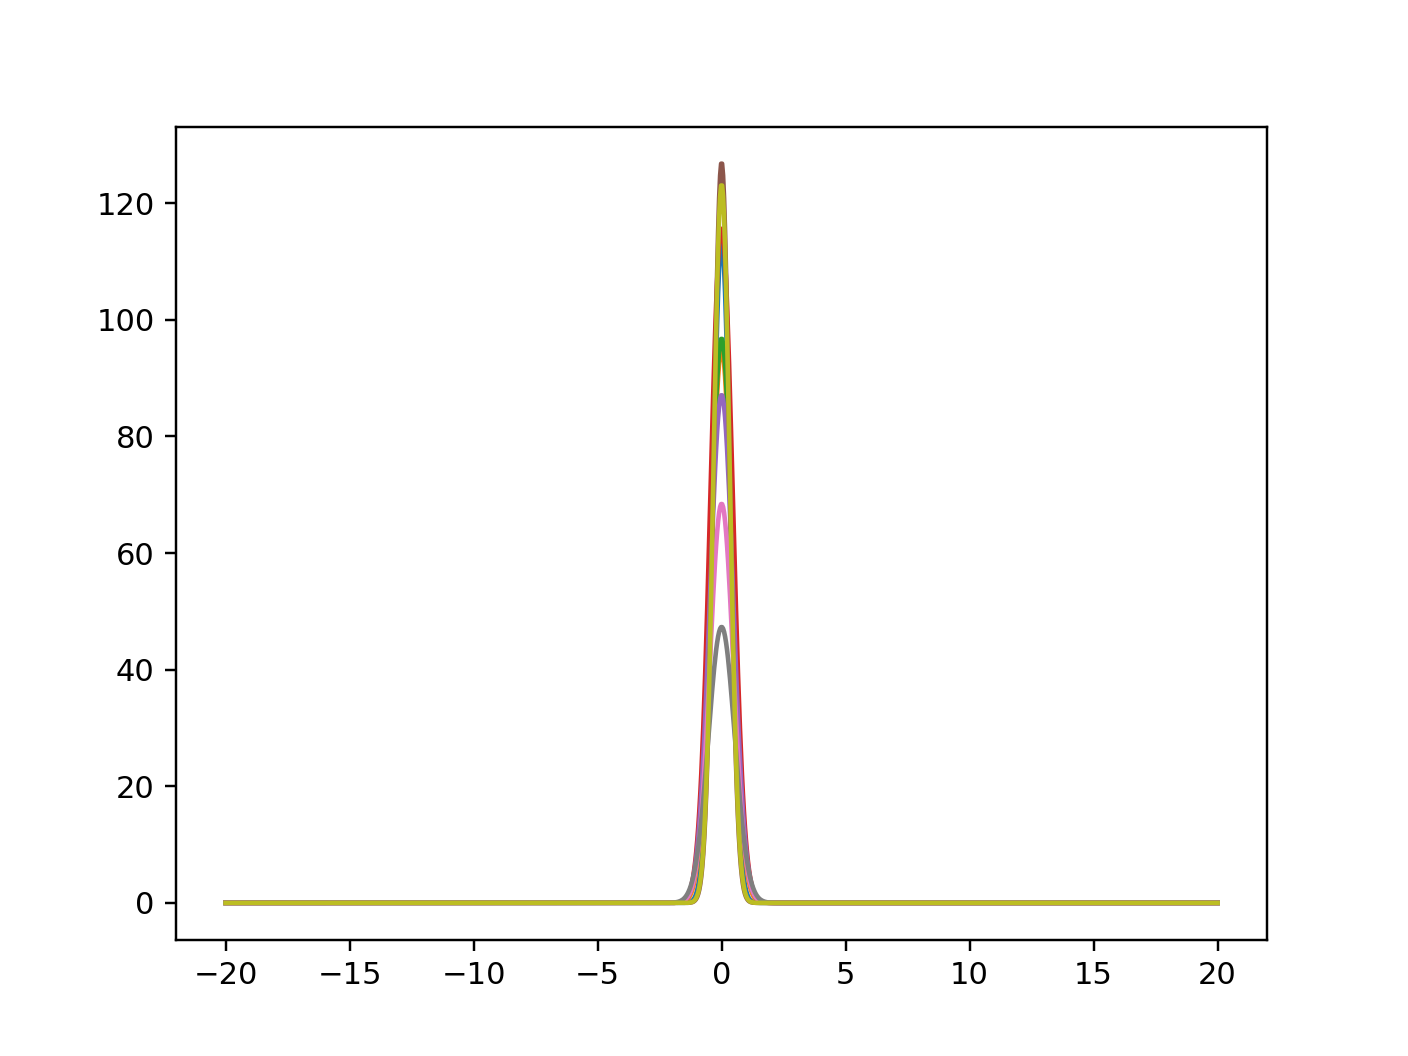

In [38]:
pl.figure()
for i in range(9):
    pl.plot(x,gauss_profile[:,i],label='gauss')

In [ ]:
#code to make/save colormaps

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Retinotopy_HSV_2x_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.ylim((62,193))
pl.xlim((0,3))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks(np.linspace(62,193,5))
pl.gca().set_yticklabels(('$-\pi/2$','$-3\pi/4$','$\pi$','$3\pi/4$','$\pi/2$'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/polr_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Jet_2D_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.xlim((0,5))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks([255,3*255/3.75,2*255/3.75,1*255/3.75,0])
pl.gca().set_yticklabels(('$0.25\degree$', '$1\degree$', '$2\degree$','$3\degree$','$4\degree$'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/ecc_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Jet_2D_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.xlim((0,5))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks(np.linspace(255,0,5))
pl.gca().set_yticklabels(np.linspace(0,200,5).astype('int'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/Bparam_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


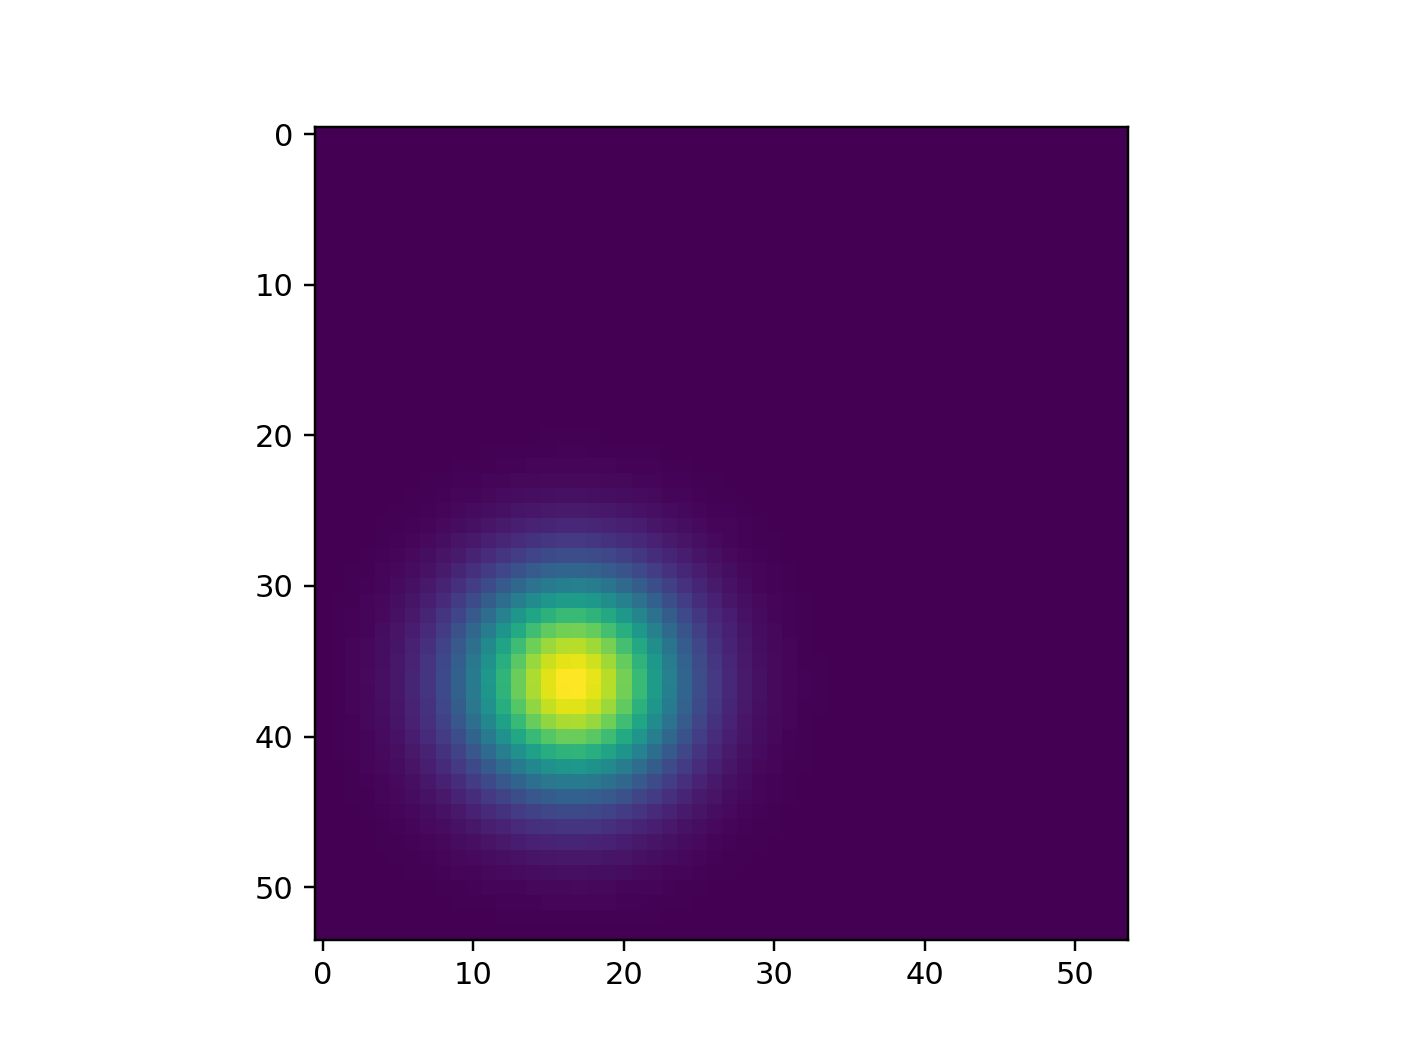

In [74]:
from prfpy.rf import gauss2D_iso_cart
from prfpy.timecourse import stimulus_through_prf
dm = gg.stimulus.design_matrix

rf = np.rot90(gauss2D_iso_cart(x=gg.stimulus.x_coordinates[..., np.newaxis],
                              y=gg.stimulus.y_coordinates[..., np.newaxis],
                              mu=(-2, -2),
                              sigma=1,
                              normalize_RFs=False).T, axes=(1,2))
neural_tc = stimulus_through_prf(rf, dm)
pl.figure()
pl.imshow(rf[0])

In [205]:
###############outdated cells

71.42857142857143

In [96]:
#correcting for low intensity TCs (lowest xx percentile per ROI) (unused)
tc_mean_full = np.zeros(nonzerovar_mask.shape)
tc_mean = timecourse.mean(-1)
tc_mean_full[nonzerovar_mask]=tc_mean

for roi in idx_rois:
    k_values = int(len(idx_rois[roi])/20)
    lowest_intensity = np.argpartition(tc_mean_full[idx_rois[roi]][tc_mean_full[idx_rois[roi]]>0], k_values)
    alpha[idx_rois[roi][tc_mean_full[idx_rois[roi]]>0][lowest_intensity[:k_values]]] = 0
    
    tc_mean_full[idx_rois[roi][tc_mean_full[idx_rois[roi]]>0][lowest_intensity[:k_values]]] = 0

#plotting histograms of mean signal intensity per ROI, after removing lowest intensity
for roi in idx_rois:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_mean_full[idx_rois[roi]],bins=100)
    pl.show()
    #pl.close()

In [2]:
#load data fsaverage sub 001

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
#norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")
norm_powell=np.load("/Users/marcoaqil/PRFMapping/Cartesius results sub-001/sub-001_iterparams-norm_space-fsaverage_powell.npy")
norm_num_fix = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_num_bounds_fixed.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")

norm_res = norm_num_fix

#load data fsnative sub 001
gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

#load data fsnative sub 006 (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-gauss_space-fsnative.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow-var-mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

#load data fsnative20191107120858 sub 006 SMALLER BOUNDS iterated fit (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-gauss_space-fsnative20191107120858.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-css_space-fsnative20191107120858.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-dog_space-fsnative20191107120858.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-norm_space-fsnative20191107120858.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_nonlow-var-mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')

#load data fsnative sub 006 iterated with trust-constr minimizer (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative20191106094038.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative20191106094038.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative20191106094038.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative20191106094038.npy")

#nonzerovar_mask_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow-var-mask_space-fsnative.npy")

#timecourse_it = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

#load data fsnative sub 006 first surr constraints tc first (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-gauss_space-fsnative.npy")
css_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-css_space-fsnative.npy")
dog_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-norm_space-fsnative.npy")

#load data fsnative sub 006 first surr constraints tc first iterated (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-gauss_space-fsnative20191108021600.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-css_space-fsnative20191108021600.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-dog_space-fsnative20191108021600.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-norm_space-fsnative20191108021600.npy")

#load data fsnative sub 007 (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-gauss_space-fsnative.npy")
css_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-css_space-fsnative.npy")
dog_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-gauss_space-fsnative.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_nonlow-var-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_timecourse_space-fsnative.npy')

In [ ]:
#plot suppr idx on cortex (not very meaningful)
#suppression index (for norm also take into account baseline?)
suppr_idx = np.zeros((nonzerovar_mask.shape[0],2))
suppr_idx[nonzerovar_mask,0] = (dog_res[:,5] * dog_res[:,6]**2)/(dog_res[:,3] * dog_res[:,2]**2)
suppr_idx[nonzerovar_mask,1] = (norm_res[:,5] * norm_res[:,6]**2 + norm_res[:,7])/(norm_res[:,3] * norm_res[:,2]**2 + norm_res[:,8])

suppr_idx_dog = cortex.Vertex2D(np.log(suppr_idx[:,0]), alpha, subject=subj,
                                vmin=-25, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
suppr_idx_norm = cortex.Vertex2D(np.log(suppr_idx[:,1]), alpha, subject=subj,
                                 vmin=-12, vmax=2, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_suppr_idx = {'suppr_idx DoG':suppr_idx_dog.raw, 'suppr_idx Norm':suppr_idx_norm.raw}

cortex.webgl.show(ds_suppr_idx,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

In [302]:
#load data sub 006 mean 100 tc fit (with normalized RFs)
normalize_RFs = True
subj='sub-006'
space = 'fsnative'

gauss_grid, norm_grid, gauss, css_res, dog_res, norm_res = combine_results(
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/normalizedRFs', subj, space,
        ['2019-11-20-14-33-34', '2019-11-21-21-08-07',
         '2019-11-21-10-32-09', '2019-11-21-09-23-30'])

#timecourse and mask (from before)
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc/sub-006_mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc/sub-006_timecourse_space-fsnative.npy')

In [7]:
%%capture

#RSQ
rsq = np.zeros((nonzerovar_mask.shape[0],4))
rsq[nonzerovar_mask,0] = gauss[:,-1]
rsq[nonzerovar_mask,1] = css_res[:, -1]
rsq[nonzerovar_mask,2] = dog_res[:, -1]
rsq[nonzerovar_mask,3] = norm_res[:, -1]

#prf ecc
ecc = np.zeros((nonzerovar_mask.shape[0],4))
ecc[nonzerovar_mask,0] = np.sqrt(gauss[:,0]**2+gauss[:,1]**2)
ecc[nonzerovar_mask,1] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc[nonzerovar_mask,2] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc[nonzerovar_mask,3] = np.sqrt(norm_res[:,0]**2+norm_res[:,1]**2)

#prf polar angle
polar = np.zeros((nonzerovar_mask.shape[0],4))
polar[nonzerovar_mask,0] = np.arctan2(-gauss[:,0], gauss[:,1])
polar[nonzerovar_mask,1] = np.arctan2(-css_res[:,0], css_res[:,1])
polar[nonzerovar_mask,2] = np.arctan2(-dog_res[:,0], dog_res[:,1])
polar[nonzerovar_mask,3] = np.arctan2(-norm_res[:,0], norm_res[:,1])

#prf size
size = np.zeros((nonzerovar_mask.shape[0],4))
size[nonzerovar_mask,0] = gauss[:,2]
size[nonzerovar_mask,1] = css_res[:,2]
size[nonzerovar_mask,2] = dog_res[:,2]
size[nonzerovar_mask,3] = norm_res[:,2]

#prf amplitude
amp = np.zeros((nonzerovar_mask.shape[0],4))
amp[nonzerovar_mask,0] = gauss[:,3]
amp[nonzerovar_mask,1] = css_res[:,3]
amp[nonzerovar_mask,2] = dog_res[:,3]
amp[nonzerovar_mask,3] = norm_res[:,3]

#BOLD baseline
bold_base = np.zeros((nonzerovar_mask.shape[0],4))
bold_base[nonzerovar_mask,0] = gauss[:,4]
bold_base[nonzerovar_mask,1] = css_res[:,4]
bold_base[nonzerovar_mask,2] = dog_res[:,4]
bold_base[nonzerovar_mask,3] = norm_res[:,4]

#css exponent
css_exp = np.zeros(nonzerovar_mask.shape[0])
css_exp[nonzerovar_mask] = css_res[:,5]

#surround amplitude
surr_amp = np.zeros((nonzerovar_mask.shape[0],2))
surr_amp[nonzerovar_mask,0] = dog_res[:,5]
surr_amp[nonzerovar_mask,1] = norm_res[:,5]

#surround size
surr_size = np.zeros((nonzerovar_mask.shape[0],2))
surr_size[nonzerovar_mask,0] = dog_res[:,6]
surr_size[nonzerovar_mask,1] = norm_res[:,6]

#normalization model baselines (neural and surround, ratio, (a+b/(c+d), ad-bc))
baselines = np.zeros((nonzerovar_mask.shape[0],5))
baselines[nonzerovar_mask,0] = norm_res[:,7]
baselines[nonzerovar_mask,1] = norm_res[:,8]
baselines[nonzerovar_mask,2] = norm_res[:,7]/norm_res[:,8]
baselines[nonzerovar_mask,3] = (norm_res[:,3]+norm_res[:,7])/(norm_res[:,5]+norm_res[:,8])
baselines[nonzerovar_mask,4] = (norm_res[:,3]*norm_res[:,8])-(norm_res[:,5]*norm_res[:,7])

#fwhmax fwatmin
fw_hmax = np.zeros((nonzerovar_mask.shape[0],4))
fw_atmin = np.zeros((nonzerovar_mask.shape[0],2))
norm_profiles = np.zeros((1000, nonzerovar_mask.shape[0]))
fw_hmax[nonzerovar_mask,0] = fwhmax_fwatmin('Gauss', gauss, normalize_RFs)
fw_hmax[nonzerovar_mask,1] = fwhmax_fwatmin('CSS', css_res, normalize_RFs)
fw_hmax[nonzerovar_mask,2], fw_atmin[nonzerovar_mask,0] = fwhmax_fwatmin('DoG', dog_res, normalize_RFs)
(fw_hmax[nonzerovar_mask,3], fw_atmin[nonzerovar_mask,1]), norm_profiles[:,nonzerovar_mask] = fwhmax_fwatmin('Norm', norm_res, normalize_RFs,
                                                                                      return_profiles=True)

In [ ]:
#raw time series stats

tc_mean_dict={}
tc_var_dict={}
tc_tsnr_dict={}

for space in spaces:
    for subj in subjects:
        load timecourse_raw and mask_raw
        
    if subj == 'sub-006':
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_nonlow-var-mask_space-fsnative.npy")
    elif subj == 'sub-007':
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits/sub-007_mask_space-fsnative.npy")
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits/sub-007_timecourse_space-fsnative.npy')
    elif subj == 'sub-001':
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

    #calc raw time series mean and plotting histograms of mean signal intensity per ROI
    tc_mean_full = np.zeros(mask_raw.shape)
    tc_mean_full[mask_raw] = timecourse_raw.mean(-1)
    tc_mean_dict[subj] = tc_mean_full
    
    tc_var_full = np.zeros(mask_raw.shape)
    tc_var_full[mask_raw] = timecourse_raw.var(-1)
    tc_var_dict[subj] = tc_var_full
    
    tc_tsnr_full = tc_mean_full/np.sqrt(tc_var_full)  
    tc_tsnr_dict[subj] = tc_tsnr_full
    
    

In [ ]:
norm_params_full = np.zeros((nonzerovar_mask.shape[0],10))
norm_params_full[nonzerovar_mask,:] = np.copy(norm_res)

In [143]:
#output freesurefer-format eccentricity angle maps to draw custom ROIs in freeview
lh_c = read_morph_data(opj(fs_dir, subj+'/surf/lh.curv'))

ecc_freeview = np.median(ecc, axis=-1)

alpha_freeview = rsq.max(-1) * (amp.min(-1)>0) * (tc_mean_full>tc_min) * (ecc.max(-1)<ecc_max) * (ecc.min(-1)>ecc_min)

ecc_freeview[alpha_freeview<0.2] = -10

write_morph_data(opj(fs_dir, subj+'/surf/lh.ecc_masked')
                                       ,ecc_freeview[:lh_c.shape[0]])
write_morph_data(opj(fs_dir, subj+'/surf/rh.ecc_masked')
                                       ,ecc_freeview[lh_c.shape[0]:])

#output freesurefer-format polar angle maps to draw custom ROIs in freeview
lh_c = read_morph_data(opj(fs_dir, subj+'/surf/lh.curv'))

baseline_freeview = baselines[:,0]

alpha_freeview = rsq.max(-1) * (amp.min(-1)>0) * (tc_mean_full>tc_min) * (ecc.max(-1)<ecc_max) * (ecc.min(-1)>ecc_min)

baseline_freeview[alpha_freeview<0.2] = -10

write_morph_data(opj(fs_dir, subj+'/surf/lh.baseline_masked')
                                       ,baseline_freeview[:lh_c.shape[0]])
write_morph_data(opj(fs_dir, subj+'/surf/rh.baseline_masked')
                                       ,baseline_freeview[lh_c.shape[0]:])

In [ ]:
#load data RAW BOLD fit ABC norm model variant (5000tr-con maxiter no constraints)
space = 'fsnative'

main_dict[space]['ABC_raw']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_abc', 
        ['2019-12-02-14-38-20', '2019-12-03-11-03-08',
         '2019-12-03-16-00-08', '2019-12-03-11-45-30'])

main_dict[space]['ABC_raw']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_abc', 
        ['2019-12-02-21-18-45', '2019-12-03-10-46-06',
         '2019-12-03-12-00-44', '2019-12-03-13-23-45'])

#load data MEAN-100-TC fit ABC norm model variant (5000tr-con maxiter. no constraints)
space = 'fsnative'
 
main_dict[space]['ABC_100'][subj]['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm', 
        ['2019-11-30-15-34-05', '2019-12-01-11-15-33',
         '2019-12-01-13-01-26', '2019-12-01-15-26-47'])

main_dict[space]['ABC_100']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm',
        ['2019-11-30-15-33-42', '2019-12-01-11-49-31',
         '2019-12-01-13-32-49', '2019-12-01-15-29-24'])

main_dict[space]['ABC_100']['sub-001']['Results'] = combine_results('sub-001', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm',
        ['2019-12-04-10-45-12', '2019-12-04-14-03-47',
         '2019-12-04-15-55-17', '2019-12-04-21-03-19'])

#load data mean 100 tc fit (ABCD norm)
space = 'fsnative'

main_dict[space]['Standard_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc',
        ['2019-11-15-11-36-38', '2019-11-16-08-04-40',
         '2019-11-16-11-05-09', '2019-11-15-15-53-43'])

main_dict[space]['Standard_100']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc',
        ['2019-11-27-11-19-09', '2019-11-28-14-22-27',
         '2019-11-29-12-25-38', '2019-11-29-18-00-53'])

#load data raw data fits (ABCD norm)
space = 'fsnative'
 
main_dict[space]['Standard_raw']['sub-006']['Results'] = combine_results('sub-006', space, 
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits',
        ['20191109165849', '20191110131514',
         '20191109100256', '20191109141507'])
 
main_dict[space]['Standard_raw']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits', 
        ['', '20191112083058',
         '20191112180440', '20191113094719'])

main_dict[space]['Standard_raw']['sub-001']['Results'] = combine_results('sub-001', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits', 
        ['2019-11-28-20-50-33', '2019-11-29-14-32-37',
         '2019-11-29-16-10-34', '2019-11-30-11-22-29'])

In [ ]:
#import newly analyzed subject from freesurfer to pycortex database
#this doesnt work anymore. use script in documents folder

cortex.freesurfer.import_subj('sub-006', freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', 
                              whitematter_surf='smoothwm')

#importing flatmap created with freeview or tksurfer to pycortex database
#cortex.freesurfer.import_flat(subject='sub-006', patch='full', hemis=['lh', 'rh'], 
#                freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', clean=True)

In [311]:
#plotting histograms of tSNR per ROI
#for roi in ["V1","V2","V3"]:
#    pl.figure()
#    pl.title(roi)
#    pl.hist(tsnr_full[idx_rois[roi]],bins=100)
#    pl.show()
#    pl.close()

# different views available, more views can be added  and the
# existing list can be removed
#views = dict(lateral=dict(radius=250, altitude=90.5, azimuth=181, pivot=180),
#             medial=dict(radius=10, altitude=90.5, azimuth=0, pivot=180),
#             front=dict(radius=250, altitude=90.5, azimuth=0, pivot=0),
#             back=dict(radius=250, altitude=90.5, azimuth=181, pivot=0),
#             top=dict(radius=250, altitude=0, azimuth=180, pivot=0),
#             bottom=dict(radius=250, altitude=180, azimuth=0, pivot=0)
#            )

In [74]:
#making t1w nifti images (use nilearn image) (flask to make javascript?)
import nibabel as nib
maskk = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_mask_space-T1w.npy')
resxx = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_iterparams-norm_space-T1w2019-12-12-15-24-19.npy')
aha = np.zeros(maskk.shape)
aha[maskk] = resxx[:,-1]

ref_img = nib.load('/Users/marcoaqil/Downloads/sub-006_ses-1_task-1R_run-1_space-T1w_desc-brain_mask.nii.gz')
affine, header = ref_img.affine, ref_img.header

nib.Nifti1Image(aha, affine, header).to_filename('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w')

xfm_trans = cortex.xfm.Transform(np.identity(4), 
                                    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii')
xfm_trans.save('sub-006', 'func_space-t1w')


vol_data = cortex.Volume2D('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii', 
                         '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii',
                         'sub-006',
                         'func_space-t1w',
                           vmin=0.2,
                           vmax=0.6,
                           vmin2=0.05,
                           vmax2=0.2,
                          cmap='Jet_2D_alpha')


cortex.webgl.show(vol_data,                  
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)


Started server on port 41494


<JS: window.viewer>

Stopping server


In [ ]:
# binned fw_atmin vs other parameters relationships
rsq_thresh = 0.3

colors = {}
colors['custom.V1']= 'black'
colors['custom.V2']= 'red'
colors['custom.V3']= 'pink'

symbol = {}
symbol['Norm. param. B'] = 'o'
symbol['Norm. param. D'] = 'o'
symbol['Ratio (B/D)'] = 'o'
symbol['(A+B)/(C+D)'] = 'o'
symbol['(AD-BC)'] = 'o'


baselines_stats = {}
fw_atmin_stats = {}

for roi in colors:#idx_rois:
    
    baselines_stats[roi] = {}
    fw_atmin_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) * (fw_atmin[:,1]<w_max)
    if alpha_roi.sum()>40:    
    
        fw_atmin_sorted = np.argsort(fw_atmin[alpha_roi], axis=0)
        split_fw_atmin_bins = np.array_split(fw_atmin_sorted, 10, axis=0)

        #NOTE: here i indexes different params of same model (above it is same param in different models)
        #therefore fw_atmin_stats is the same for all params
        for i, param in enumerate(symbol):
            pl.figure("fw_atmin vs "+param, figsize=(8, 6))
            #pl.title(subj+' - '+param+' vs Surround size (FWatMin)')
            
            baselines_stats[roi][param]=[]
            fw_atmin_stats[roi][param]=[]

            for fw_atmin_quantile in split_fw_atmin_bins:
                baselines_stats[roi][param].append(weightstats.DescrStatsW(baselines[alpha_roi,i][fw_atmin_quantile[:,1]],
                                                                      weights=rsq[alpha_roi,3][fw_atmin_quantile[:,1]]))

                fw_atmin_stats[roi][param].append(weightstats.DescrStatsW(fw_atmin[alpha_roi,1][fw_atmin_quantile[:,1]],
                                                                      weights=rsq[alpha_roi,3][fw_atmin_quantile[:,1]]))




            plot = pl.errorbar([ss.mean for ss in fw_atmin_stats[roi][param]],
               [ss.mean for ss in baselines_stats[roi][param]],
               yerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in baselines_stats[roi][param]]).T,
               xerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in fw_atmin_stats[roi][param]]).T,
               fmt=symbol[param], mfc=colors[roi], mec='black', label=roi.replace('custom.',''), ecolor=colors[roi])
            #pl.yscale('log')
            pl.legend(loc=0)
            pl.xlabel('Surround size (degrees)')
            pl.ylabel(param)
            
            #pl.xlim(4,15)
            
            #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_Norm-'+
            #       param.replace("/","")+'-vs-fw_atmin.png', dpi=200, bbox_inches='tight')
            
            
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

# binned eccentricity vs other parameters relationships
rsq_thresh = 0.3

ecc_stats = {}
profile_stats = {}


for roi in ['custom.V1', 'custom.V2', 'custom.V3']:#, 'V3A', 'V3B', 'hV4', 'LO1', 'TO1']:#idx_rois:
    
    ecc_stats[roi] = {}
    profile_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) 
    if alpha_roi.sum()>40:    
        pl.figure(roi, figsize=(8, 6))
        #pl.title(subj+' '+roi+' Norm profiles')
        ecc_sorted = np.argsort(ecc[alpha_roi], axis=0)
        #mask_ecc_sorted=[]
        #for elem in ecc_sorted[:,3]:
        #    mask_ecc_sorted.append(np.sum(nonzerovar_mask[:elem]))
        #mask_ecc_sorted=np.array(mask_ecc_sorted)    
        split_ecc_bins = np.array_split(ecc_sorted, 4, axis=0)

        ecc_stats[roi] = []
        profile_stats[roi] = []

        for ecc_quantile in split_ecc_bins:

            #hacky as per usual: 3 is the norm model index in ecc and rsq dataset
            ecc_stats[roi].append(weightstats.DescrStatsW(ecc[alpha_roi,3][ecc_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][ecc_quantile[:,3]]))
            
            # different ways of calculating the profile VS eccentricity relationship
            #### weighted mean of parameters in each ecc bin
            #norm_bin_mean = weightstats.DescrStatsW(norm_params_full[alpha_roi,:][ecc_quantile[:,3]],
            #                                        weights=rsq[alpha_roi,3][ecc_quantile[:,3]]).mean   
            #bin_profile = fwhmax_fwatmin('Norm', norm_bin_mean, normalize_RFs, return_profiles=True)[1]
            #plot = pl.plot(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, bin_profile,
            #              label=f'Ecc={ecc_stats[roi][-1].mean:.2f}')
            


            #### weighted mean of profiles in each eccentricity bin           
            profile_stats[roi].append(weightstats.DescrStatsW(norm_profiles[:,alpha_roi][:,ecc_quantile[:,3]].T,
                                                    weights=rsq[alpha_roi,3][ecc_quantile[:,3]]))
            
            plot = pl.plot(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, profile_stats[roi][-1].mean,
                          label=f'Ecc={ecc_stats[roi][-1].mean:.2f}$\degree$')
            
            pl.fill_between(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, profile_stats[roi][-1].zconfint_mean(alpha=0.05)[0],
                           profile_stats[roi][-1].zconfint_mean(alpha=0.05)[1], facecolor=plot[0].get_color(),
                           alpha=0.15)
            
            pl.plot(np.linspace(-50,50,1000), np.ones(1000)*plot[0].get_ydata()[-1], color=plot[0].get_color(),
                   linestyle='--', linewidth=1)

        pl.legend(loc=0)
        pl.xlim((0,10))
        pl.xlabel('Eccentricity (degrees)')
        pl.ylabel('Norm pRF profiles')
            
        #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_'+
        #           roi+'_Norm-profiles.png', dpi=200, bbox_inches='tight')
            
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

In [ ]:
# binned fw_hmax vs other parameters relationships
rsq_thresh = 0.3

colors = {}
colors['custom.V1']= 'black'
colors['custom.V2']= 'red'
colors['custom.V3']= 'pink'

symbol = {}
symbol['Norm. param. B'] = 'o'
symbol['Norm. param. D'] = 'o'
symbol['Ratio (B/D)'] = 'o'
symbol['(A+B)/(C+D)'] = 'o'
symbol['(AD-BC)'] = 'o'


baselines_stats = {}
fw_hmax_stats = {}

for roi in colors:#idx_rois:
    
    baselines_stats[roi] = {}
    fw_hmax_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) * (fw_atmin[:,1]<w_max)
    if alpha_roi.sum()>40:    
    
        fw_hmax_sorted = np.argsort(fw_hmax[alpha_roi], axis=0)
        split_fw_hmax_bins = np.array_split(fw_hmax_sorted, 10, axis=0)

        #note: here i indexes different params of same model (above it is same param in different models)
        #therefore fw_hmax_stats is the same for all params
        for i, param in enumerate(symbol):
            pl.figure("fwhmax vs "+param, figsize=(8, 6))
            #pl.title(subj+' - '+param+' vs pRF size (FWHM)')
            
            baselines_stats[roi][param]=[]
            fw_hmax_stats[roi][param]=[]

            for fw_hmax_quantile in split_fw_hmax_bins:
                baselines_stats[roi][param].append(weightstats.DescrStatsW(baselines[alpha_roi,i][fw_hmax_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][fw_hmax_quantile[:,3]]))

                fw_hmax_stats[roi][param].append(weightstats.DescrStatsW(fw_hmax[alpha_roi,3][fw_hmax_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][fw_hmax_quantile[:,3]]))




            plot = pl.errorbar([ss.mean for ss in fw_hmax_stats[roi][param]],
               [ss.mean for ss in baselines_stats[roi][param]],
               yerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in baselines_stats[roi][param]]).T,
               xerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in fw_hmax_stats[roi][param]]).T,
               fmt=symbol[param], mfc=colors[roi], mec='black', label=roi.replace('custom.',''), ecolor=colors[roi])
            
            #pl.plot([ss.mean for ss in fw_hmax_stats[roi][param]],0.1*np.array([ss.mean for ss in fw_hmax_stats[roi][param]])**2)
            #pl.yscale('log')
            pl.legend(loc=0)
            pl.xlabel('pRF size (degrees)')
            pl.ylabel(param)
            
            #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_Norm-'+
            #       param.replace("/","").replace('.','').replace(' ','_')+'-vs-fw_hmax.png', dpi=200, bbox_inches='tight')
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

In [ ]:
#plotting baseline average values per roi

pl.figure()
pl.title("Norm model baselines")
pl.ylabel("Mean value (rsq weighted)")

bar_positions = np.array([0,0.1,0.2])
x_ticks = []
x_labels = []

for roi in ['custom.V1', 'custom.V2', 'custom.V3']:
    alpha_roi = roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh
    if alpha_roi.sum()>40:
        
        height_1 = weightstats.DescrStatsW(baselines[alpha_roi,0],
                                                    weights=rsq[alpha_roi,3])
        height_2 = weightstats.DescrStatsW(baselines[alpha_roi,1],
                                                    weights=rsq[alpha_roi,3])
        height_3 = weightstats.DescrStatsW(baselines[alpha_roi,2],
                                                    weights=rsq[alpha_roi,3])
        
        p1=pl.bar(bar_positions, height=[height_1.mean, height_2.mean, height_3.mean], width=0.1,
                  yerr=np.array([np.abs(height_1.zconfint_mean(alpha=0.05)-height_1.mean),
                                np.abs(height_2.zconfint_mean(alpha=0.05)-height_2.mean),
                                np.abs(height_3.zconfint_mean(alpha=0.05)-height_3.mean)]).T, color=
                  ['blue','orange', 'red'], edgecolor='black')
        x_ticks.append(bar_positions.mean())
        x_labels.append(roi)
        bar_positions+=0.4
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
            
pl.xticks(x_ticks, x_labels)


pl.legend((p1[0],p1[1], p1[2]),('Neural Baseline','Surround Baseline', 'Ratio'),loc=0)


#plotting rsq per roi
rsq_thresh=0.0
pl.figure()
pl.title(subj+' - Model comparison')
pl.ylabel("Model accuracy ($R^{2}$)")

bar_positions = np.array([0,0.1,0.2,0.3])
x_ticks = []
x_labels = []
p_r=vis_res.main_dict['fsnative']['ABCD_100']['sub-006']['Processed Results']

for roi in ['visual_system', 'custom.V1', 'custom.V2', 'custom.V3', 'V3A', 'V3B', 'hV4', 'VO1', 'VO2', 'LO1', 'LO2', 'TO1', 'TO2',]:
    alpha_roi = roi_mask(vis_res.idx_rois[subj][roi], p_r['Alpha']['all'])>rsq_thresh 
    if alpha_roi.sum()>1:
        rsq = np.vstack(tuple([elem for _,elem in p_r['RSq'].items()])).T
        p1=pl.bar(bar_positions, height=np.median(rsq[alpha_roi], axis=0), width=0.1,
                  yerr=sem(rsq[alpha_roi],axis=0), color=
                  ['blue','orange','green','red'],edgecolor='black')
        x_ticks.append(bar_positions.mean())
        roi_name = roi if 'custom' not in roi else roi.replace('custom.','')
        roi_name = 'Visual\nCortex' if roi == 'visual_system' else roi_name
        x_labels.append(roi_name)
        bar_positions+=0.5
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
            
pl.xticks(x_ticks, x_labels)

pl.ylim(bottom=0.2)
pl.legend((p1[0],p1[1],p1[2],p1[3]),('Gauss','CSS','DoG','Norm'),loc=0)


#plotting rsq per roi
rsq_thresh=0.0
pl.figure()
pl.title(subj+' - Model comparison')
pl.ylabel("Model accuracy ($R^{2}$)")

bar_positions = np.array([0,0.1])
x_ticks = []
x_labels = []
p_r=vis_res.main_dict['fsnative']['ACD_100']['sub-006']['Processed Results']

for roi in ['visual_system', 'custom.V1', 'custom.V2', 'custom.V3', 'V3A', 'V3B', 'hV4', 'VO1', 'VO2', 'LO1', 'LO2', 'TO1', 'TO2',]:
    alpha_roi = roi_mask(vis_res.idx_rois[subj][roi], p_r['Alpha']['all'])>rsq_thresh 
    if alpha_roi.sum()>1:
        rsq = np.vstack(tuple([elem for _,elem in p_r['RSq'].items()])).T
        p1=pl.bar(bar_positions, height=np.median(rsq[alpha_roi], axis=0), width=0.1,
                  yerr=sem(rsq[alpha_roi],axis=0), color=
                  ['blue','red'],edgecolor='black')
        x_ticks.append(bar_positions.mean())
        roi_name = roi if 'custom' not in roi else roi.replace('custom.','')
        roi_name = 'Visual\nCortex' if roi == 'visual_system' else roi_name
        x_labels.append(roi_name)
        bar_positions+=0.5
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
            
pl.xticks(x_ticks, x_labels)

pl.ylim(bottom=0.2)
pl.legend((p1[0],p1[1]),('Gauss','Norm'),loc=0)


In [471]:
#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. unfiltered predictions!
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_unfiltpred']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/unfiltpred/',
        ['2020-03-21-16-57-31', '2020-03-21-21-30-26',
         '2020-03-21-22-30-59', '2020-03-21-22-52-52'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 114 eigenmodes (30 percent). unfiltered predictions!
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114_unfiltpred']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes114/unfiltpred/',
        ['2020-03-20-17-14-22', '2020-03-20-22-13-19',
         '2020-03-20-22-25-19', '2020-03-20-23-15-27'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 114 eigenmodes (30 percent)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes114/',
        ['2020-03-18-23-13-04', '2020-03-19-09-10-22',
         '2020-03-19-11-11-25', '2020-03-19-11-45-57'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 76 eigenmodes (20 percent) (called it 72 by mistake)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass72']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes72/',
        ['2020-03-18-16-46-37', '2020-03-18-19-05-44',
         '2020-03-18-19-44-04', '2020-03-18-20-32-46'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 38 eigenmodes (10 percent)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass38']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes38/',
        ['2020-03-18-12-42-34', '2020-03-18-14-25-45',
         '2020-03-18-14-34-50', '2020-03-18-15-02-00'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#no hrf fitting
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_nohrf']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/no_hrf/',
        ['2020-03-18-08-57-30', '2020-03-18-09-56-51',
         '2020-03-18-10-01-54', '2020-03-18-10-19-08'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mrvista style hrf fitting (keep hrf param fixed in second stage and only refit prf)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/',
        ['2020-03-17-10-53-46', '2020-03-17-13-27-09',
         '2020-03-17-14-02-25', '2020-03-17-14-27-41'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition dcfilter interbar baseline, run mean not median
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/',
        ['2020-03-16-11-33-26', '2020-03-16-13-51-16',
         '2020-03-16-14-06-16', '2020-03-16-14-35-10'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition only dcfilter interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/',
        ['2020-03-13-15-35-58', '2020-03-14-01-25-17',
         '2020-03-14-09-18-20', '2020-03-14-11-45-24'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only dcfilter not fixed bold baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/dc_filter/',
        ['2020-03-13-00-41-56', '2020-03-13-09-27-08',
         '2020-03-13-10-01-18', '2020-03-13-10-32-14'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only dcfilter interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/dc_filter/interbar_baseline/',
        ['2020-03-11-16-05-40', '2020-03-12-08-08-56',
         '2020-03-12-11-52-40', '2020-03-12-13-21-14'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only polyorder 1 interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_poly1_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/polyorder_1/interbar_baseline/',
        ['2020-03-09-12-39-27', '2020-03-09-17-09-25',
         '2020-03-09-18-06-14', '2020-03-10-08-51-31'])


#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only polyorder 1
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_poly1']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/polyorder_1/',
        ['2020-03-05-11-50-17', '2020-03-05-14-25-44',
         '2020-03-05-15-09-15', '2020-03-05-16-13-53'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/',
        ['2020-03-04-17-32-33', '2020-03-04-21-28-41',
         '2020-03-04-22-32-02', '2020-03-04-23-29-29'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition only
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/',
        ['2020-03-03-17-39-48'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/',
        ['2020-03-03-11-32-25'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/',
        ['2020-02-25-15-23-50'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD',
        ['2020-02-05-17-27-16', '2020-02-05-17-37-03', '2020-02-08-11-02-24',
         '2020-02-09-12-55-59', '2020-02-09-20-05-56'],
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/sub-006_timecourse-raw_space-fsnative.npy')

%%capture
#load crossvalidated results PSC BOLD fit ABC norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABC_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABC',
          ['2020-02-10-01-09-28', '2020-02-10-09-12-40', 
         '2020-02-10-09-37-55', '02-10-11-30-44'])

%%capture
#load crossvalidated results PSC BOLD fit ACD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ACD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ACD',
        ['2020-02-10-17-59-24', '2020-02-11-07-55-07',
         '2020-02-11-14-30-41', '2020-02-12-06-46-13'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'T1w'

vis_res.main_dict[space]['ABCD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD_T1w',
        ['2020-02-13-00-14-59', '2020-02-13-23-54-19',
         '2020-02-14-08-28-59', '2020-02-14-19-00-05'],
        ref_img_path='/Users/marcoaqil/Downloads/sub-006_ses-1_task-1R_run-1_space-T1w_desc-brain_mask.nii.gz')